## Data import and DataFrame preparation

In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling 

#with open('..\\tosca-metrics\\results\\industry_metric_results_3.json') as f:
with open('..\\tosca-metrics\\results\\example_metric_results_10.json') as f:
    data = json.load(f)

flat_dict = {}
for key, value in data.items():
    df = pd.io.json.json_normalize(value, sep='_')
    value = df.to_dict(orient='records')[0]
    flat_dict[key] = value

df = pd.DataFrame.from_dict(flat_dict, orient='index')
df = df = df[df.columns.drop(list(df.filter(regex='msg')))]


In [3]:
df.columns

Index(['loc_count', 'bloc_count', 'cloc_count', 'dpt_count', 'etp_count',
       'nco_count', 'nkeys_count', 'ntkn_count', 'nscm_count', 'na_count',
       'nc_count', 'nc_min', 'nc_max', 'nc_median', 'nc_mean', 'ni_count',
       'nif_count', 'ninp_count', 'ninpc_count', 'nn_count', 'nnt_count',
       'nout_count', 'np_count', 'np_min', 'np_max', 'np_median', 'np_mean',
       'nr_count', 'nrt_count', 'ttb_check', 'cdnt_count', 'cdrt_count',
       'cdat_count', 'cdct_count', 'cddt_count', 'cdgt_count', 'cdit_count',
       'cdpt_count', 'nw_count', 'tdb_check', 'nrq_count', 'nsh_count',
       'ncys_count', 'tob_check', 'ngc_count', 'ngp_count', 'ngro_count',
       'npol_count', 'nf_count'],
      dtype='object')

## Data visualization

In [4]:
df.dtypes

loc_count        int64
bloc_count       int64
cloc_count       int64
dpt_count        int64
etp_count      float64
nco_count        int64
nkeys_count      int64
ntkn_count       int64
nscm_count       int64
na_count         int64
nc_count       float64
nc_min         float64
nc_max         float64
nc_median      float64
nc_mean        float64
ni_count       float64
nif_count        int64
ninp_count       int64
ninpc_count    float64
nn_count         int64
nnt_count        int64
nout_count       int64
np_count         int64
np_min           int64
np_max           int64
np_median      float64
np_mean          int64
nr_count         int64
nrt_count        int64
ttb_check         bool
cdnt_count       int64
cdrt_count       int64
cdat_count       int64
cdct_count       int64
cddt_count       int64
cdgt_count       int64
cdit_count       int64
cdpt_count       int64
nw_count         int64
tdb_check         bool
nrq_count      float64
nsh_count        int64
ncys_count       int64
tob_check  

In [5]:
df.head()

loc_count  bloc_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...         14           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         22           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         38           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         42           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         44           0   

                                                    cloc_count  dpt_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0          4   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0          4   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0          4   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0          4   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0          4   

                                                    etp_count  nco_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...       3.62          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       3.62          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       3.87          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       3.87          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       3.96          0   

                                                    nkeys_count  ntkn_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...           11          17   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           19          30   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           33          54   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           35          58   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           37          62   

                                                    nscm_count  na_count  ...  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0         0  ...   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0         0  ...   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0         0  ...   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0         0  ...   
C:\Users\s145559\OneDrive - TU Eindhoven\School...           0         0  ...   

                                                    tdb_check  nrq_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False        0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False        0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False        0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False        0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False        0.0   

                                                    nsh_count  ncys_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   

                                                    tob_check  ngc_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False          0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...      False          0   

                                                    ngp_count  ngro_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...          0           0   
C:\Users\s145559\OneDr

### Scatter value count per metric 

---- loc_count ---


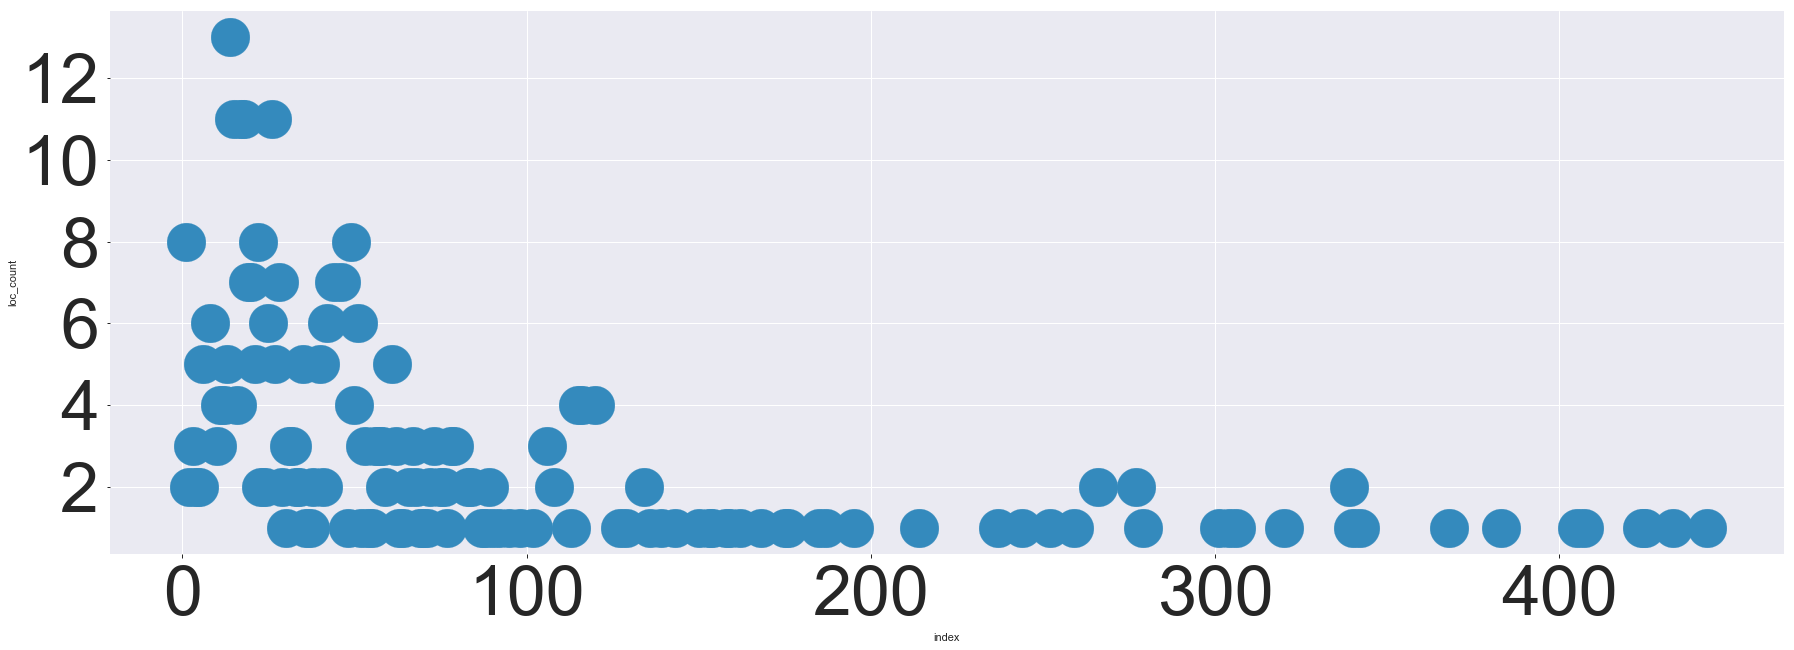

---- bloc_count ---


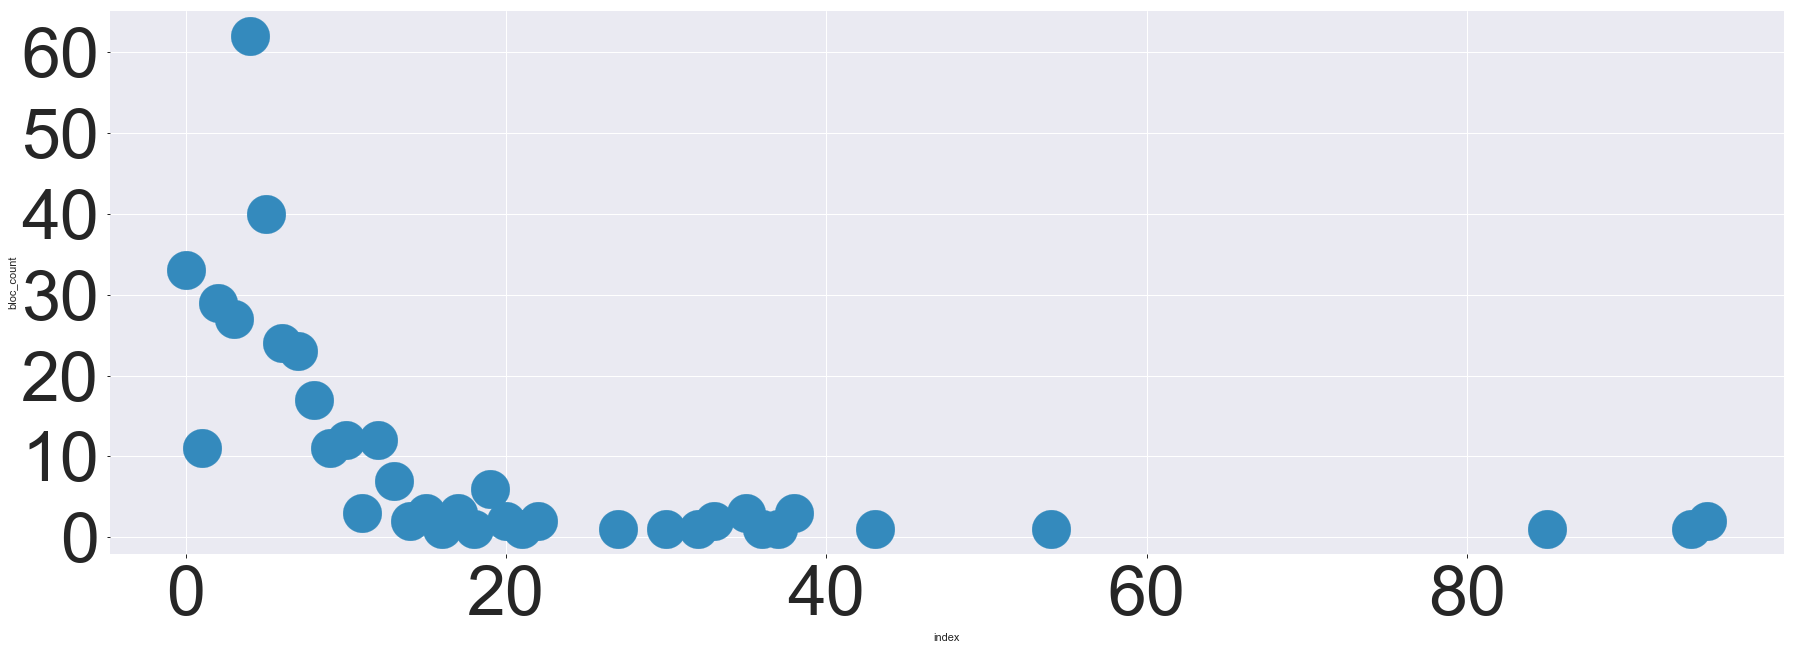

---- cloc_count ---


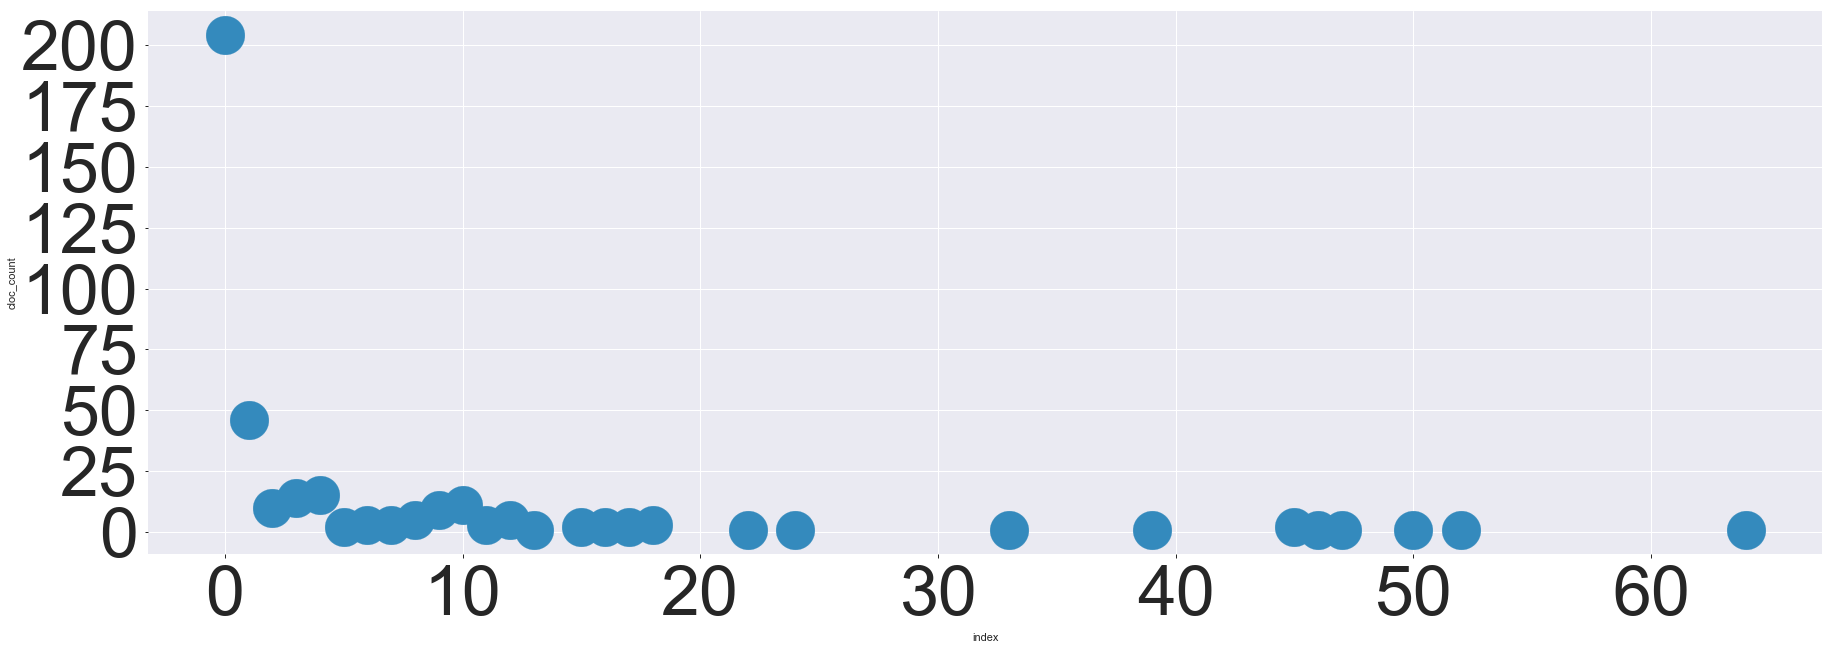

---- dpt_count ---


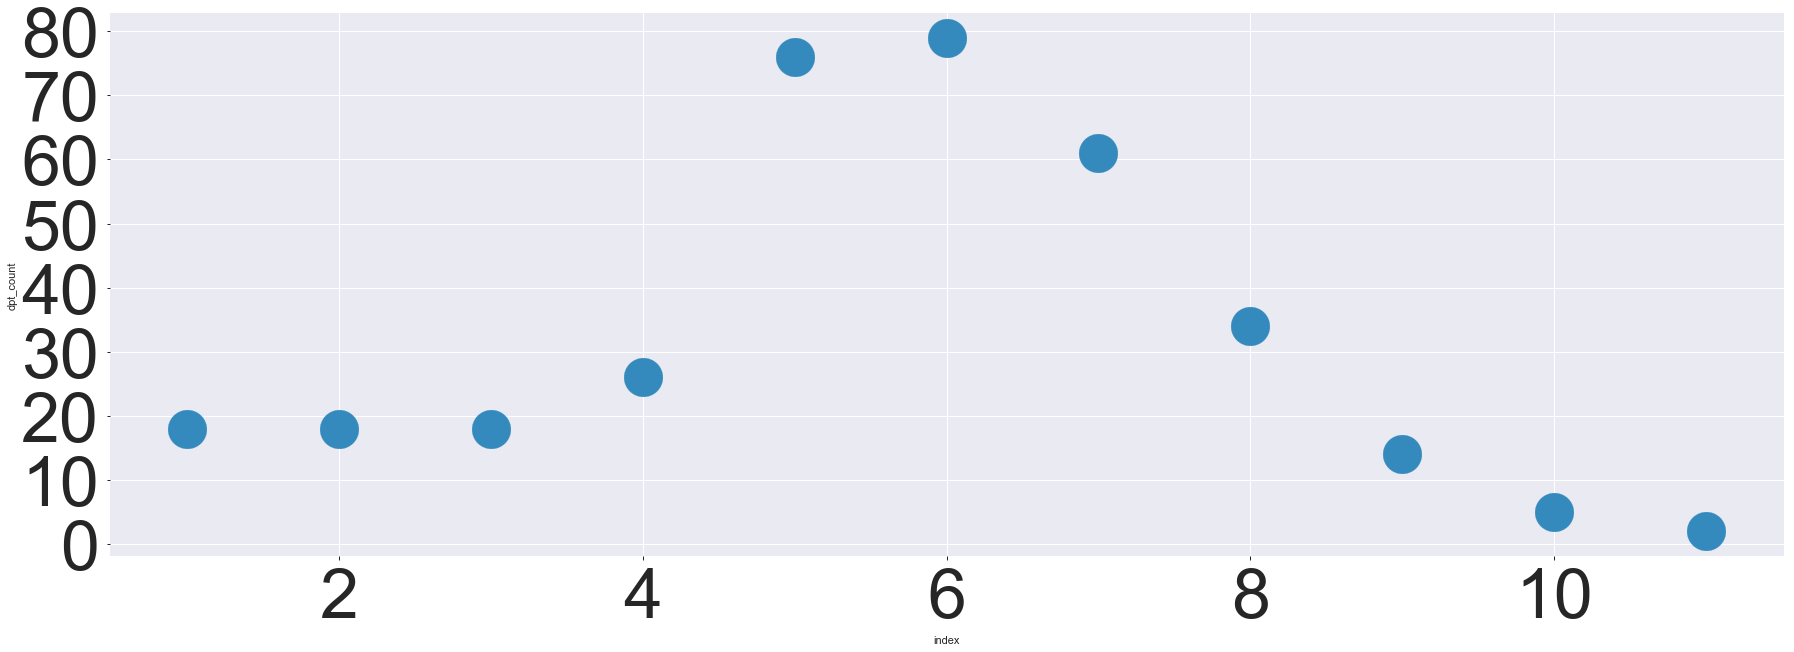

---- etp_count ---


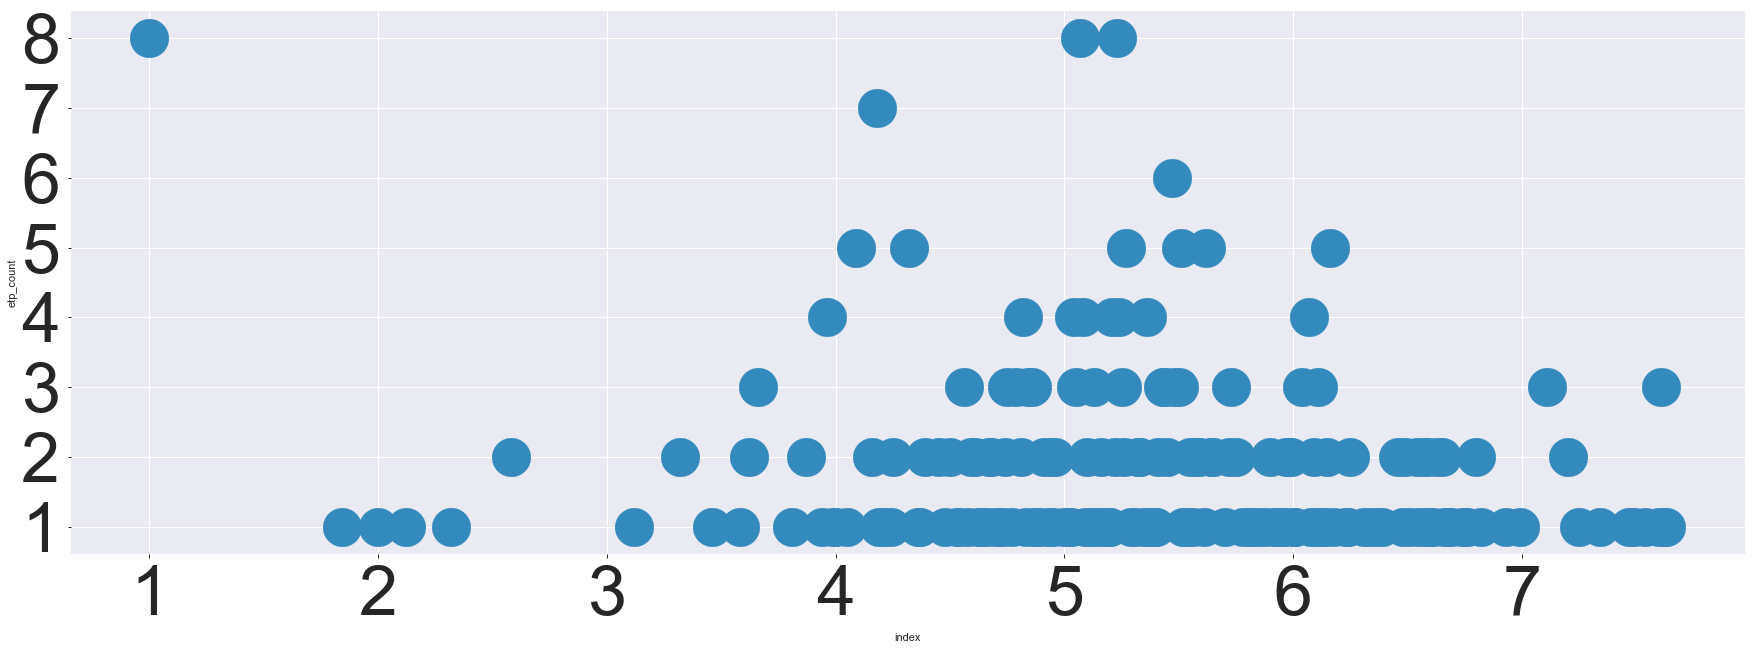

---- nco_count ---


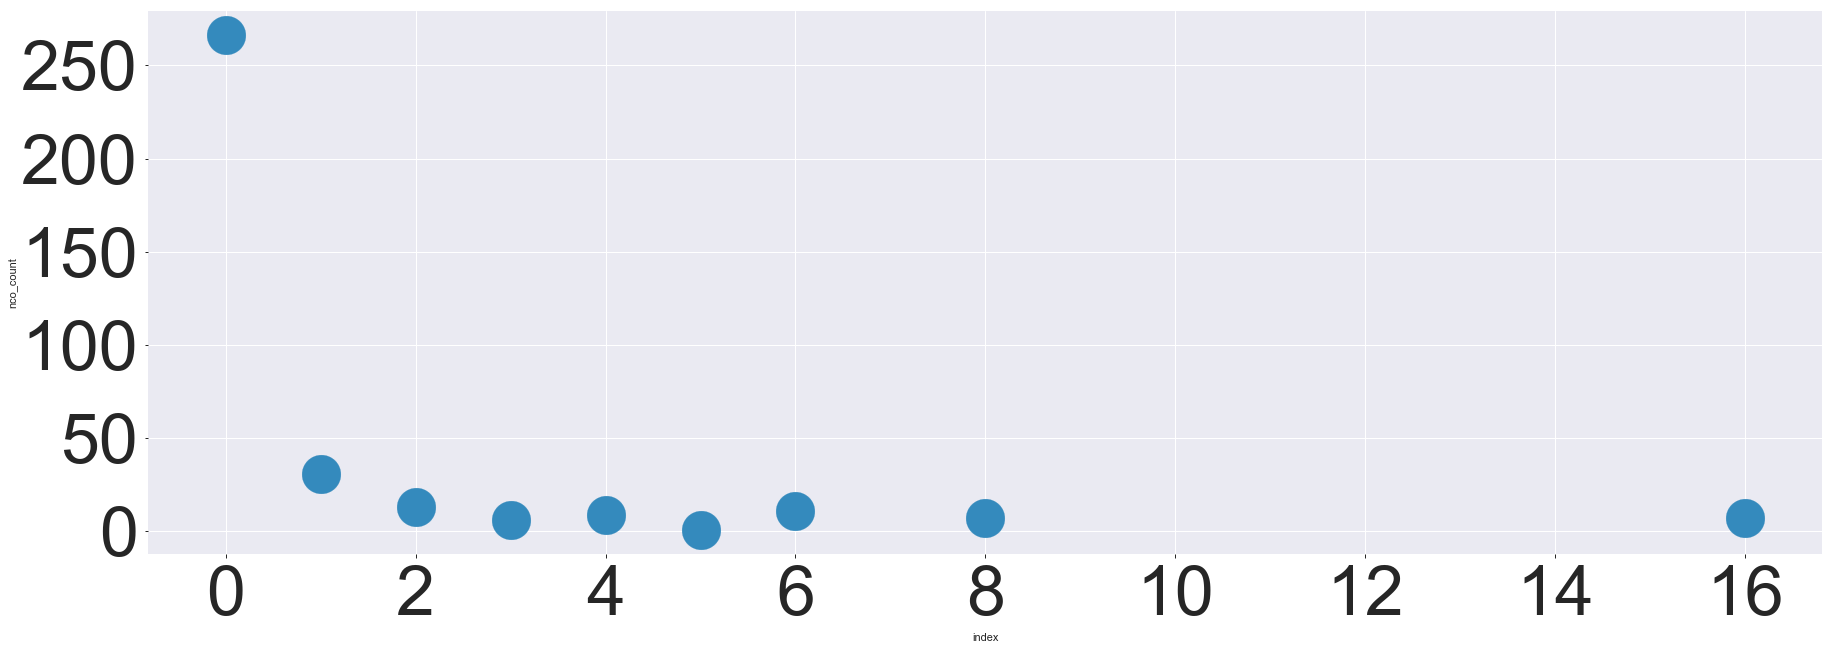

---- nkeys_count ---


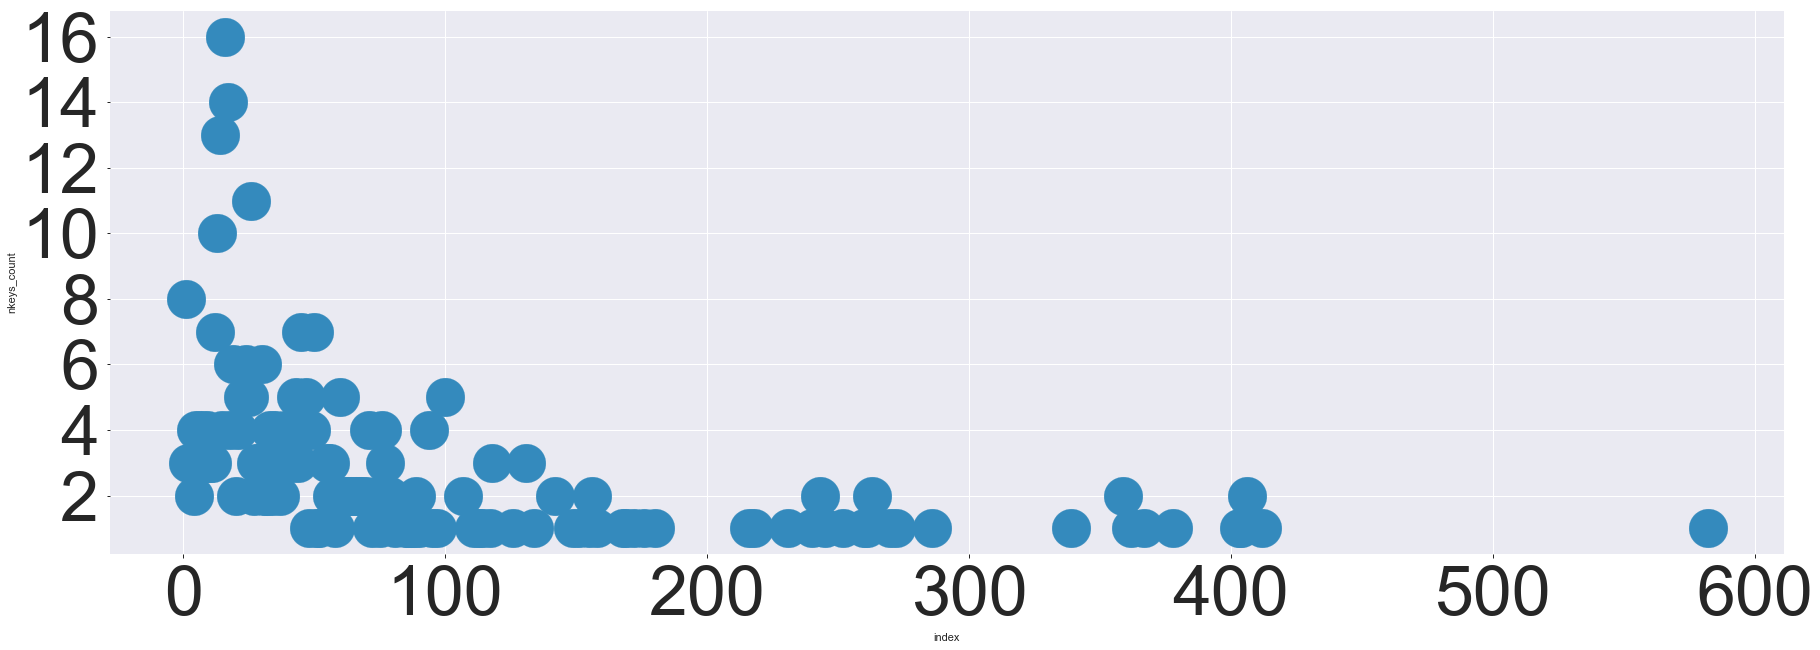

---- ntkn_count ---


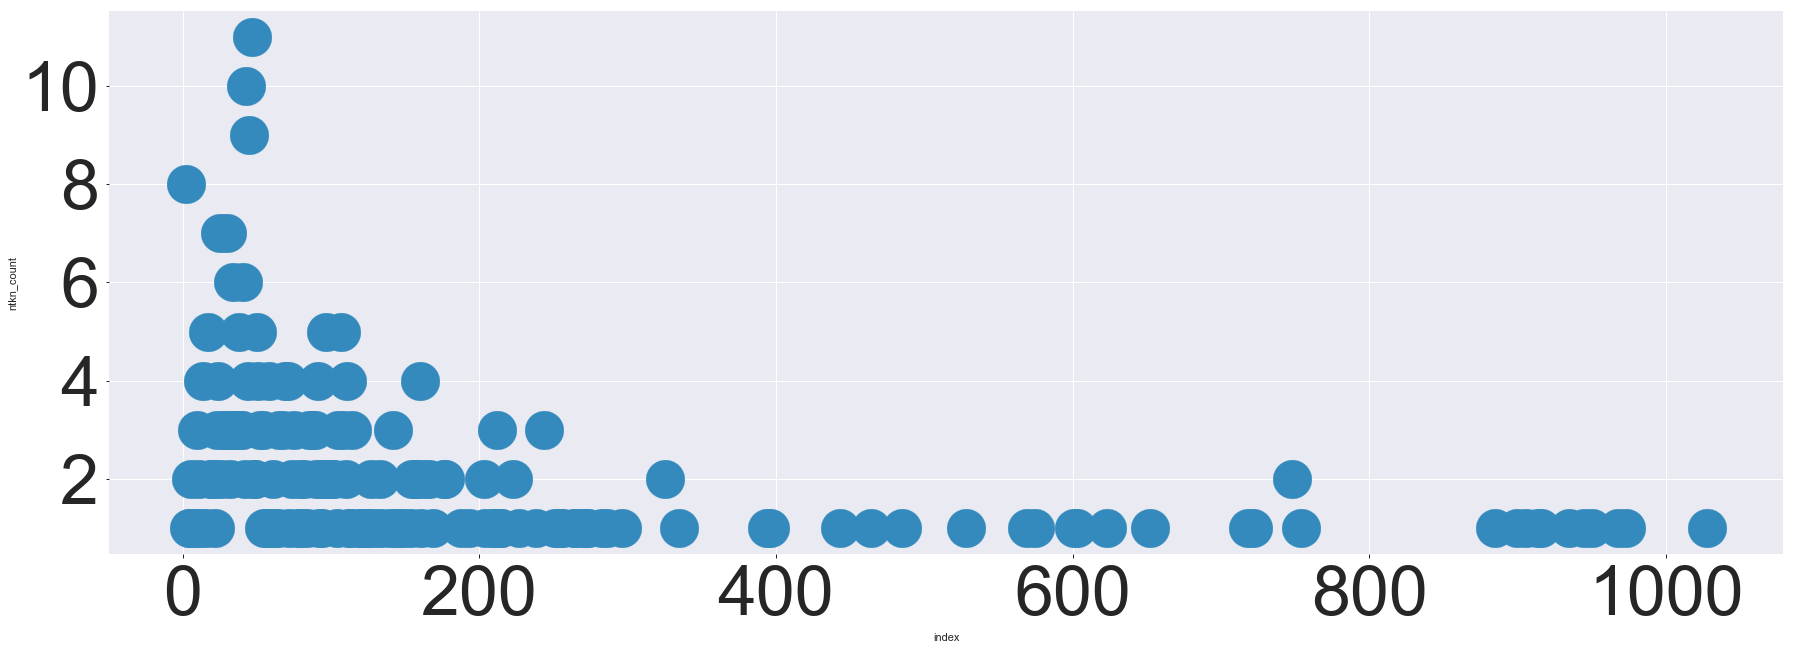

---- nscm_count ---


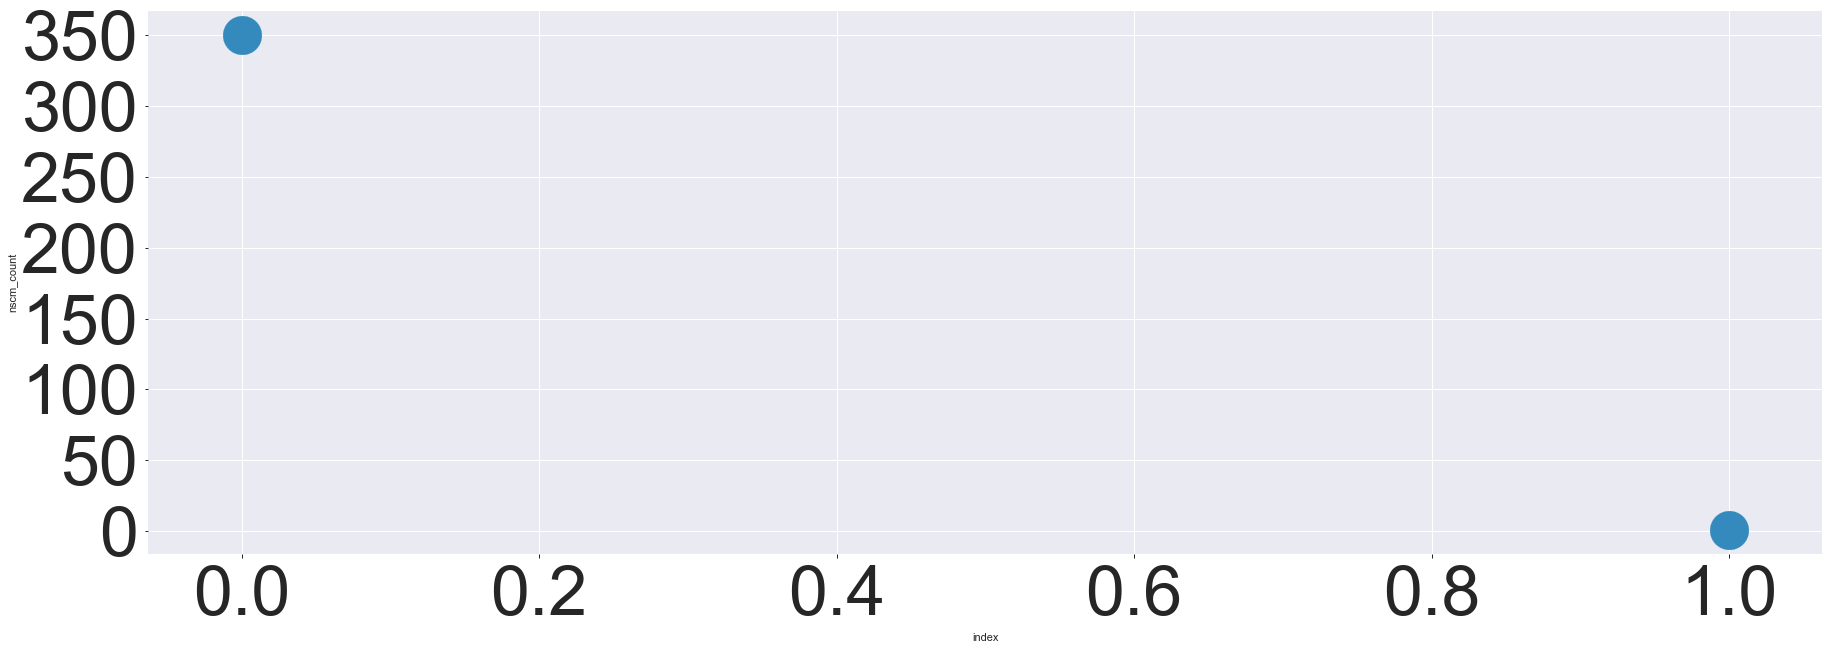

---- na_count ---


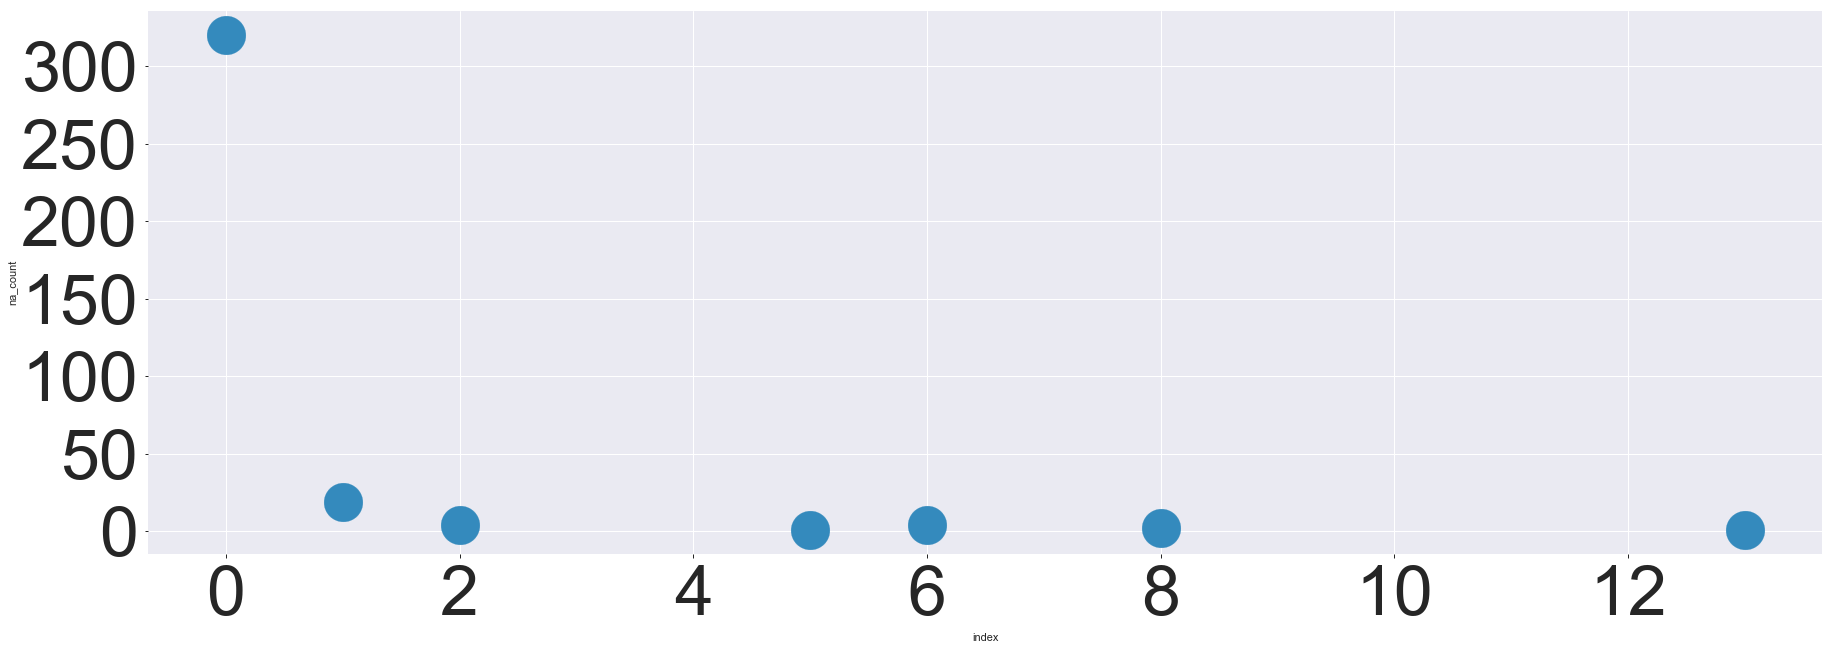

---- nc_count ---


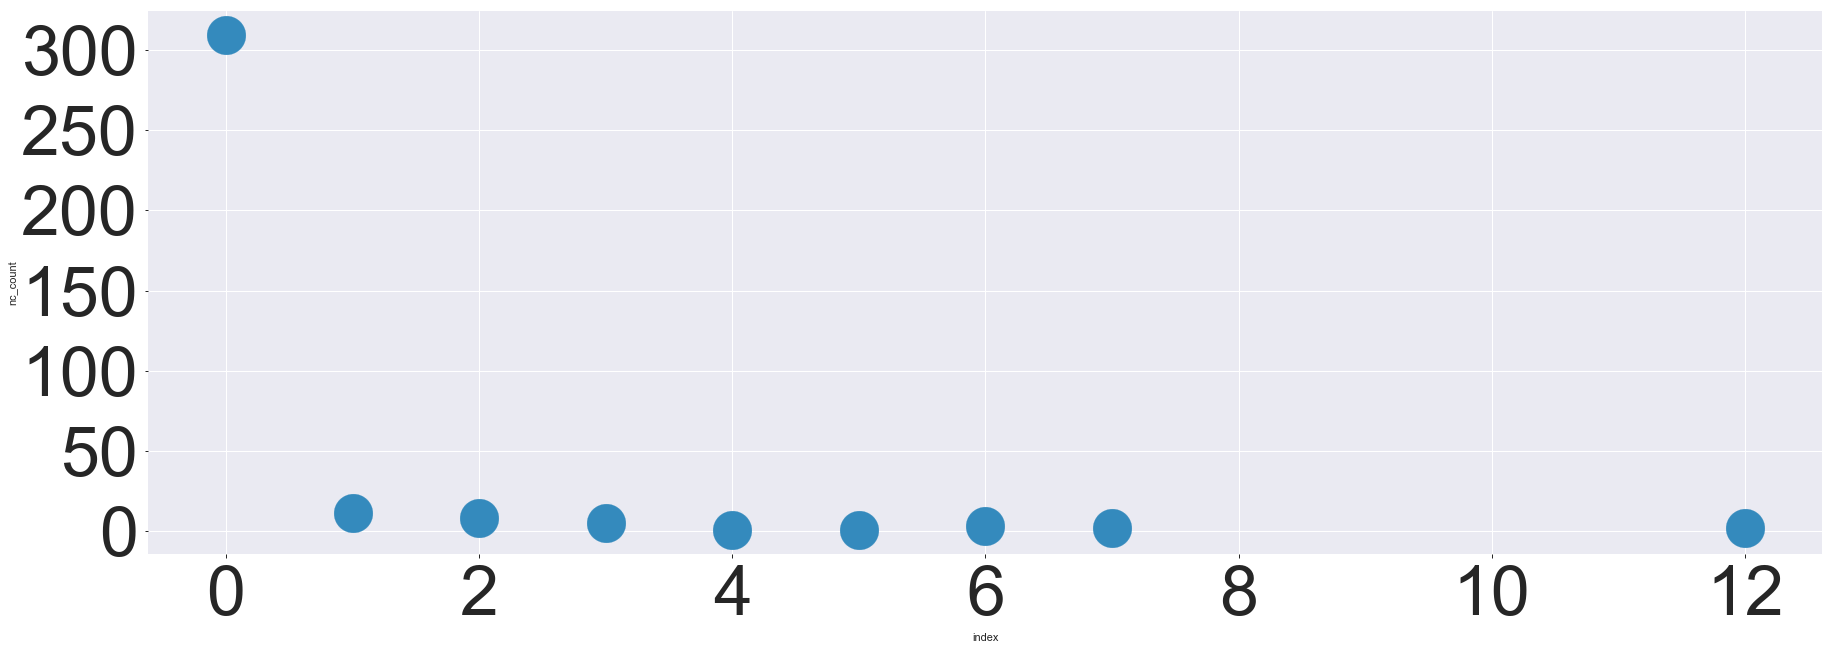

---- nc_min ---


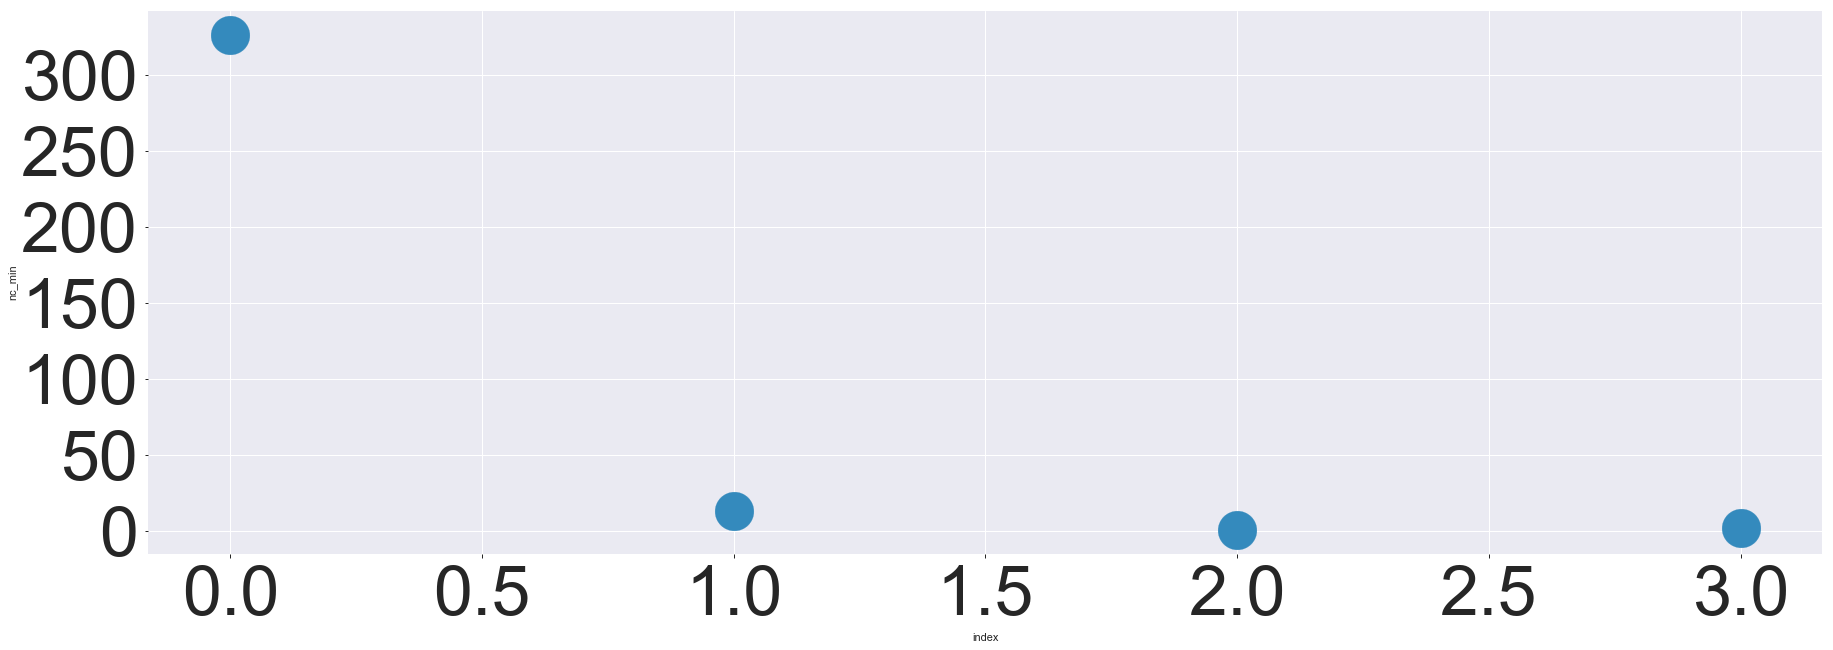

---- nc_max ---


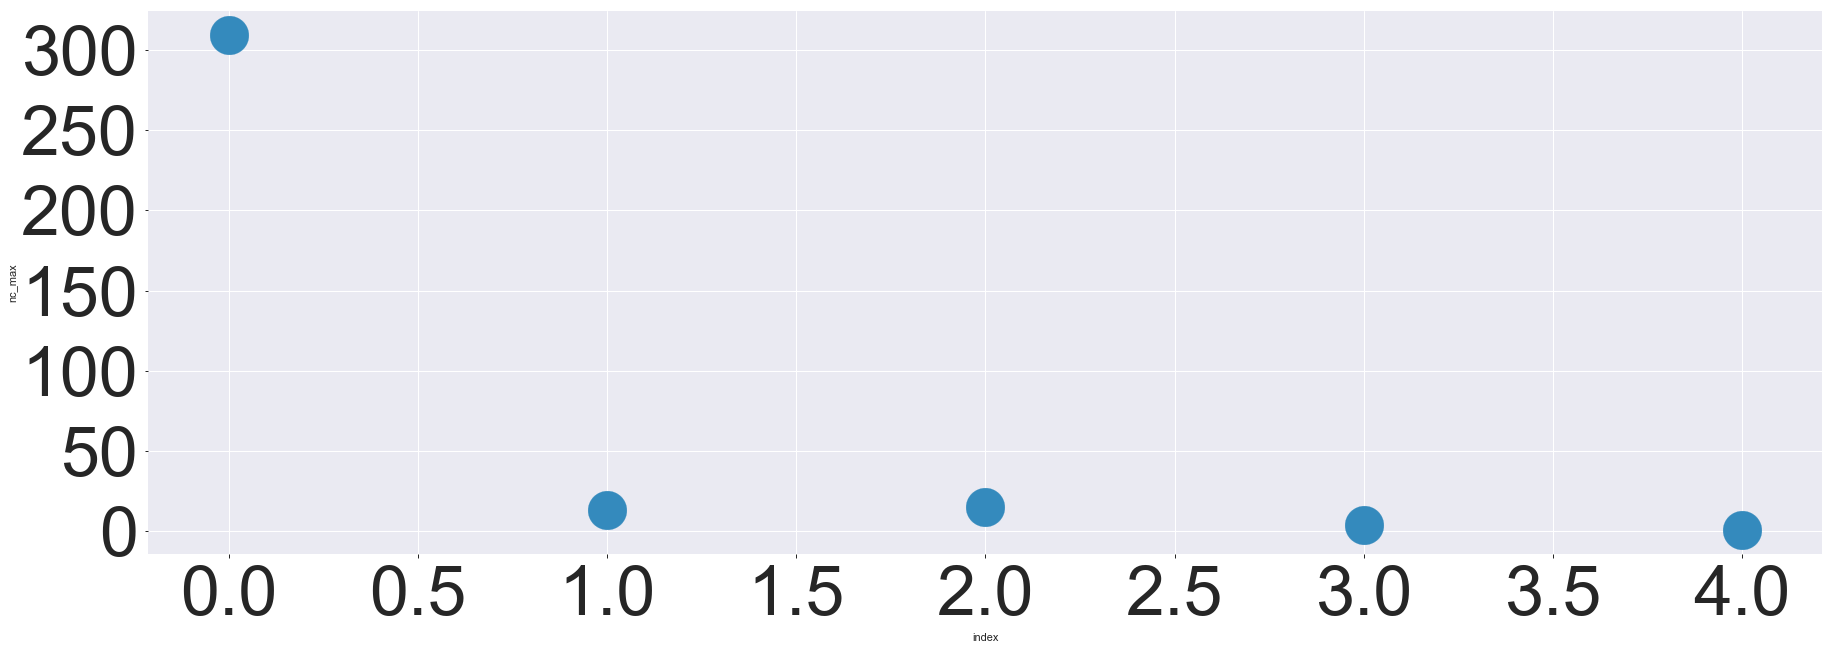

---- nc_median ---


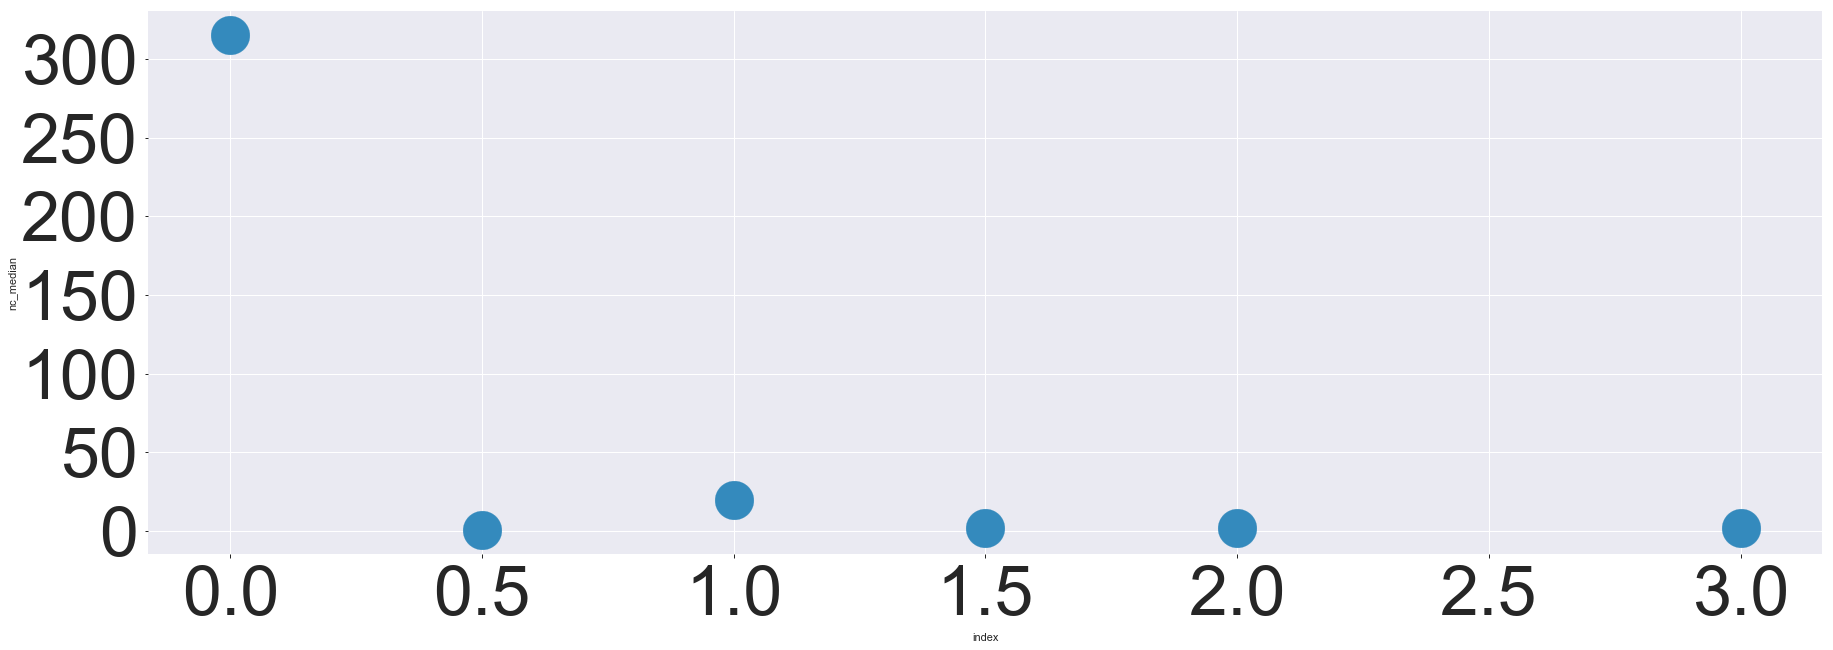

---- nc_mean ---


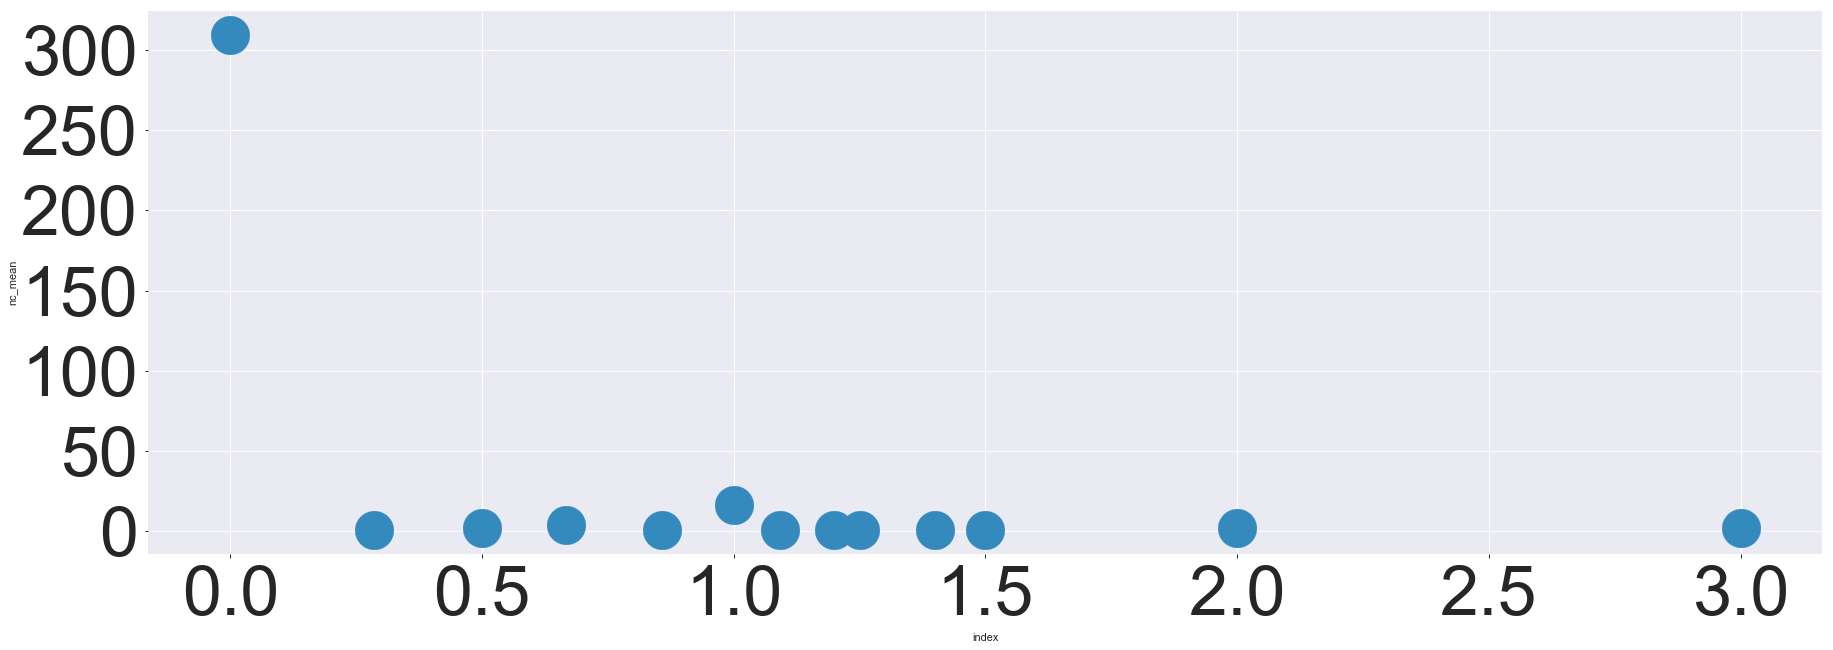

---- ni_count ---


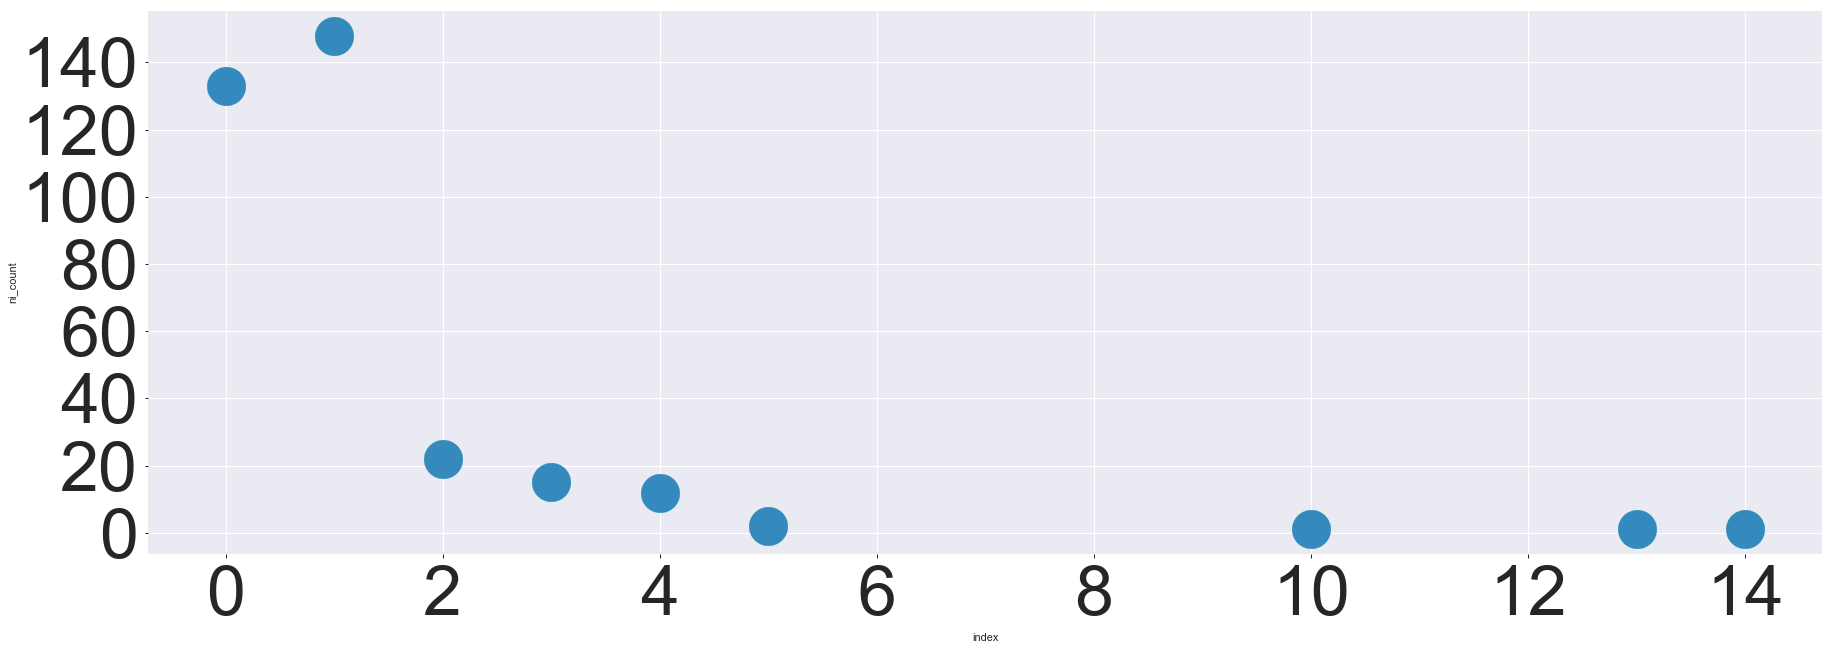

---- nif_count ---


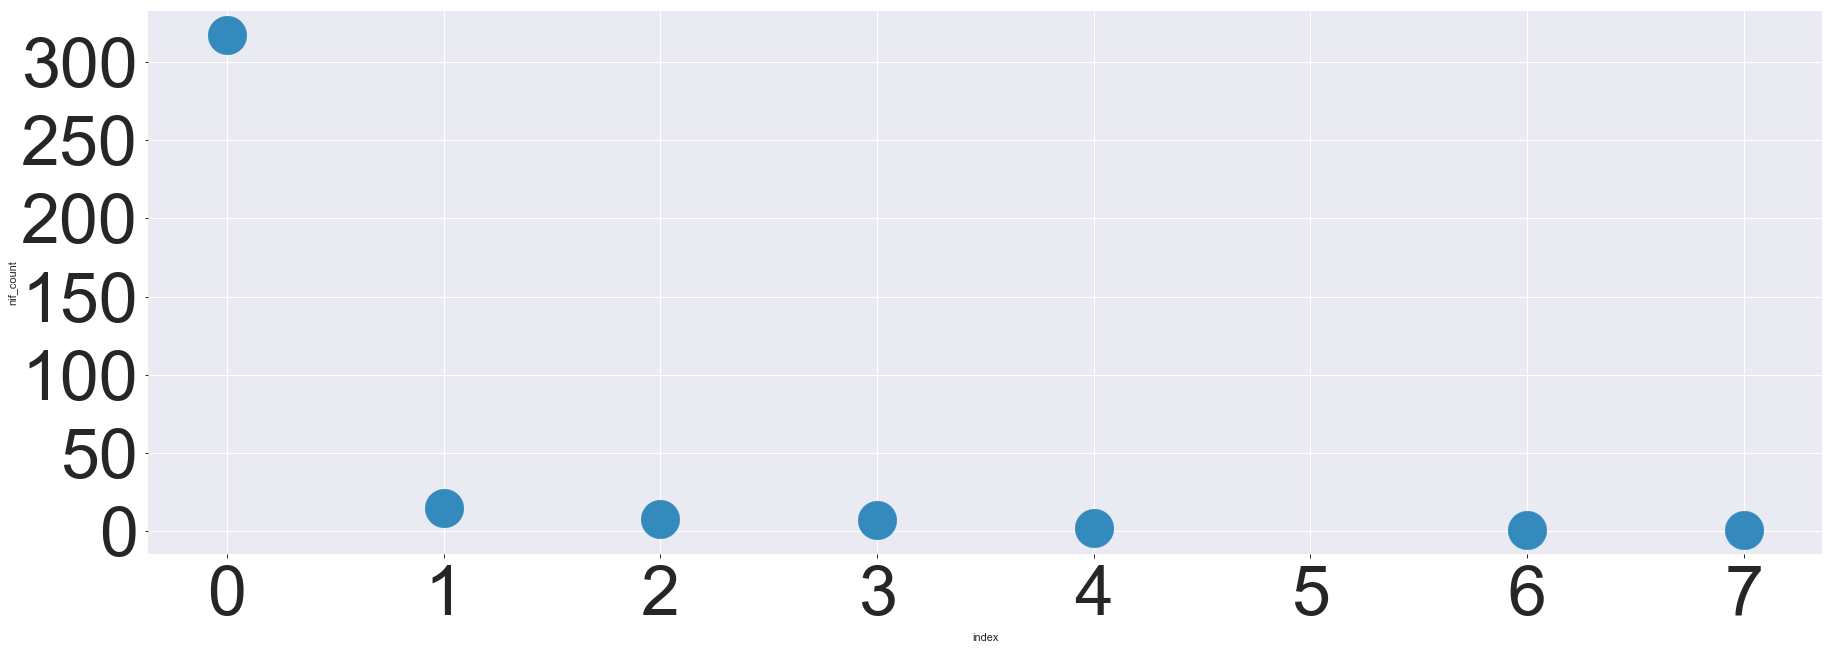

---- ninp_count ---


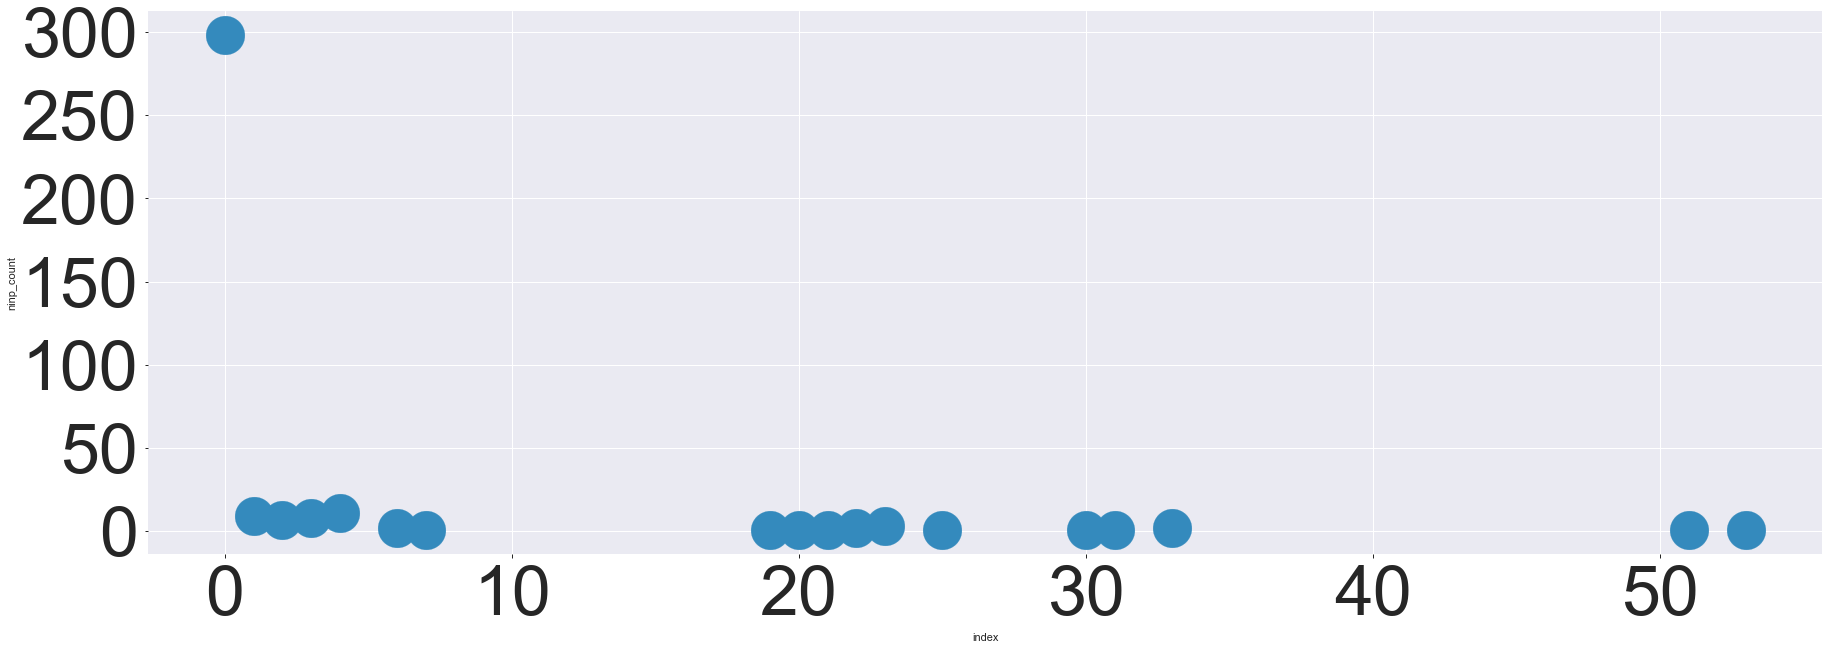

---- ninpc_count ---


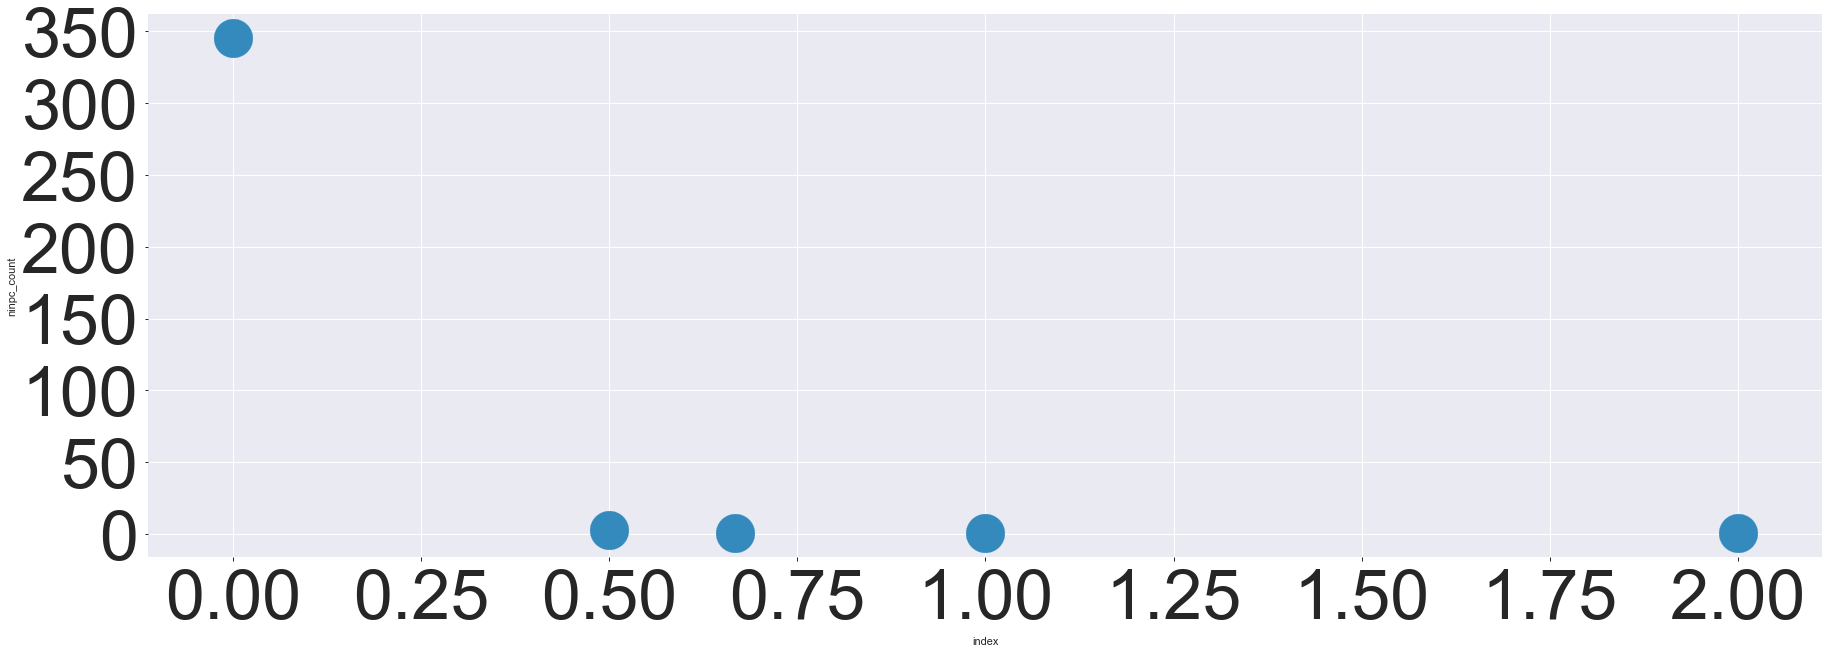

---- nn_count ---


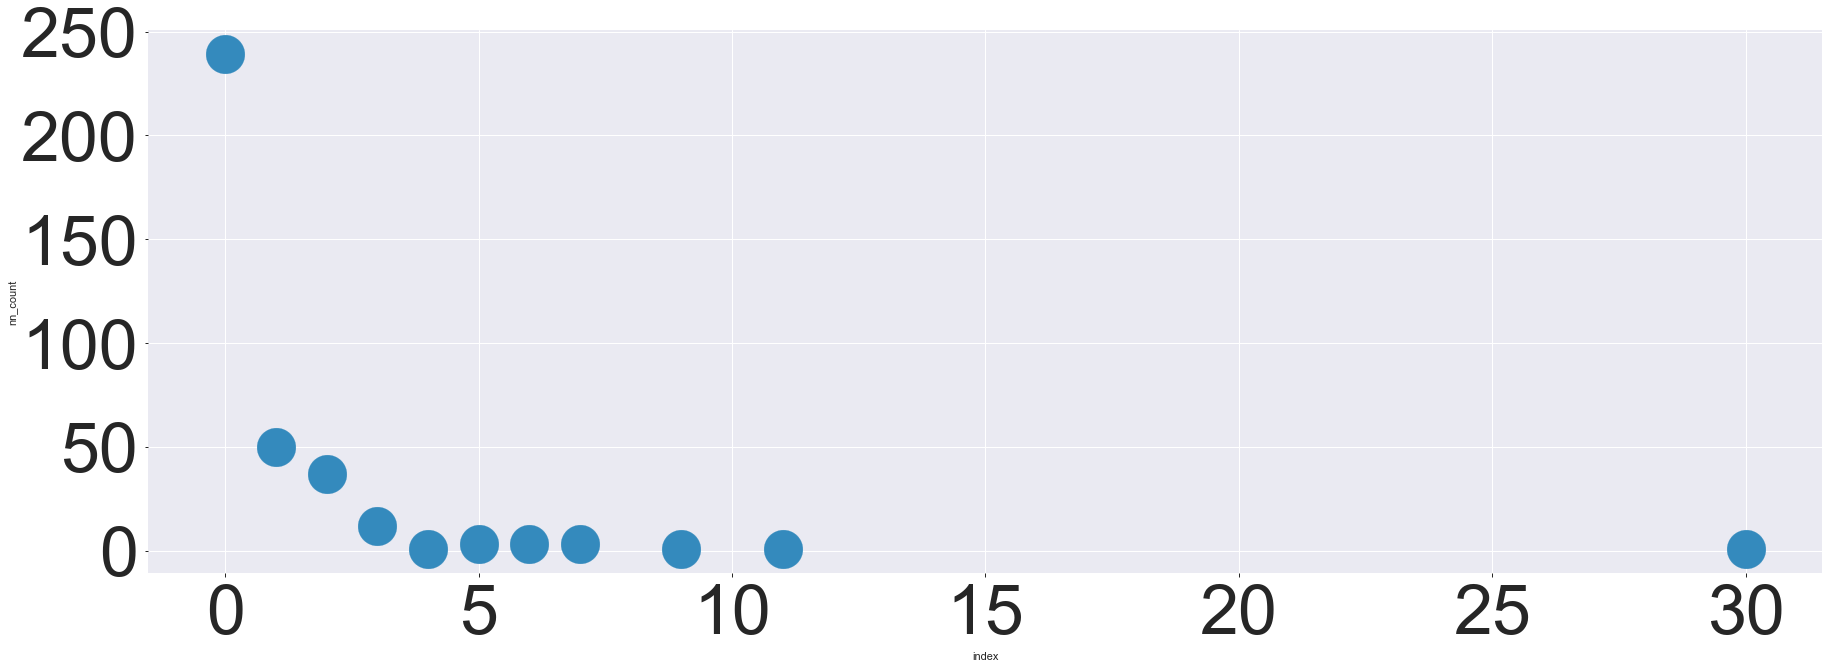

---- nnt_count ---


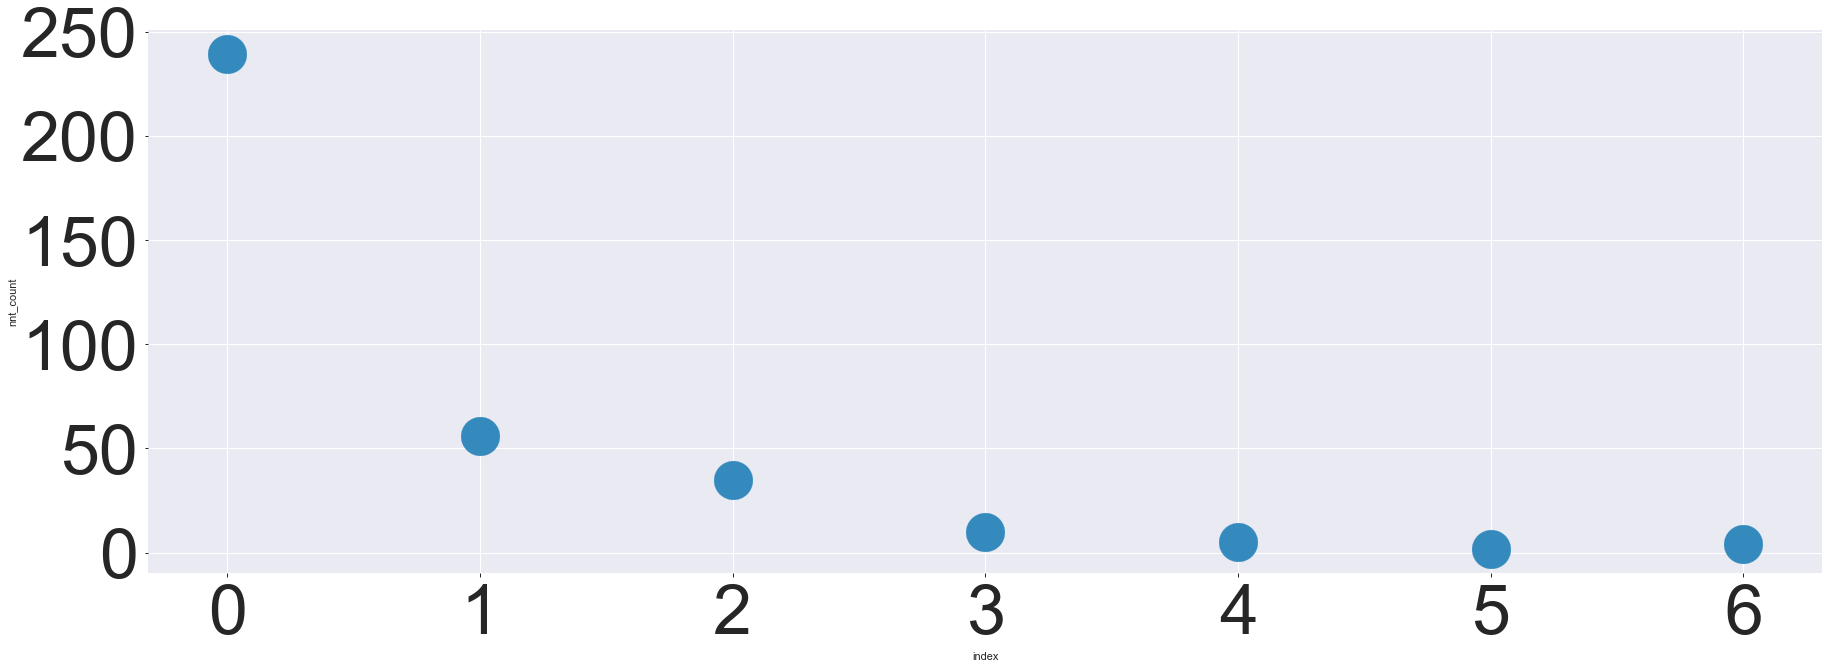

---- nout_count ---


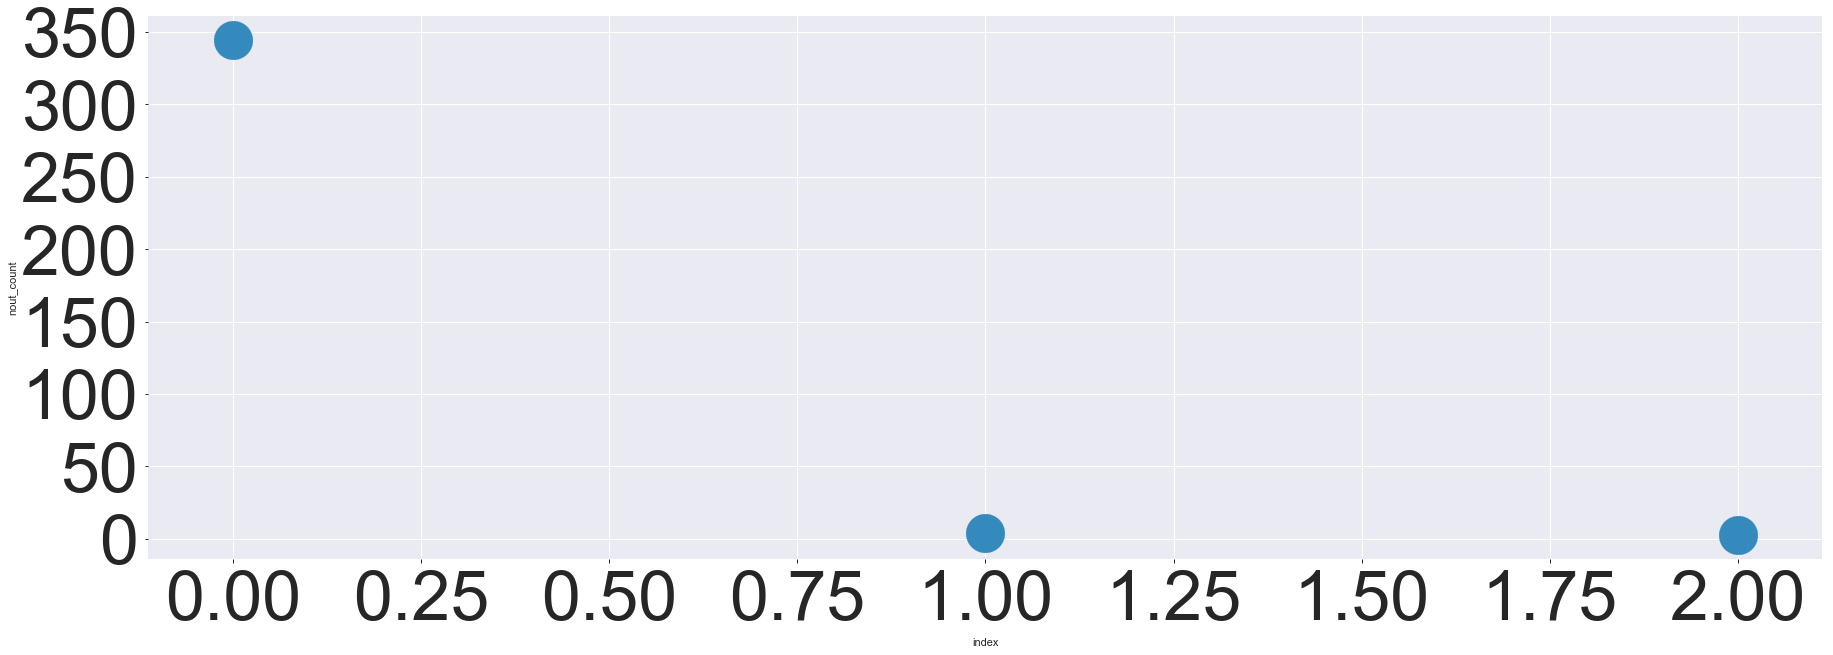

---- np_count ---


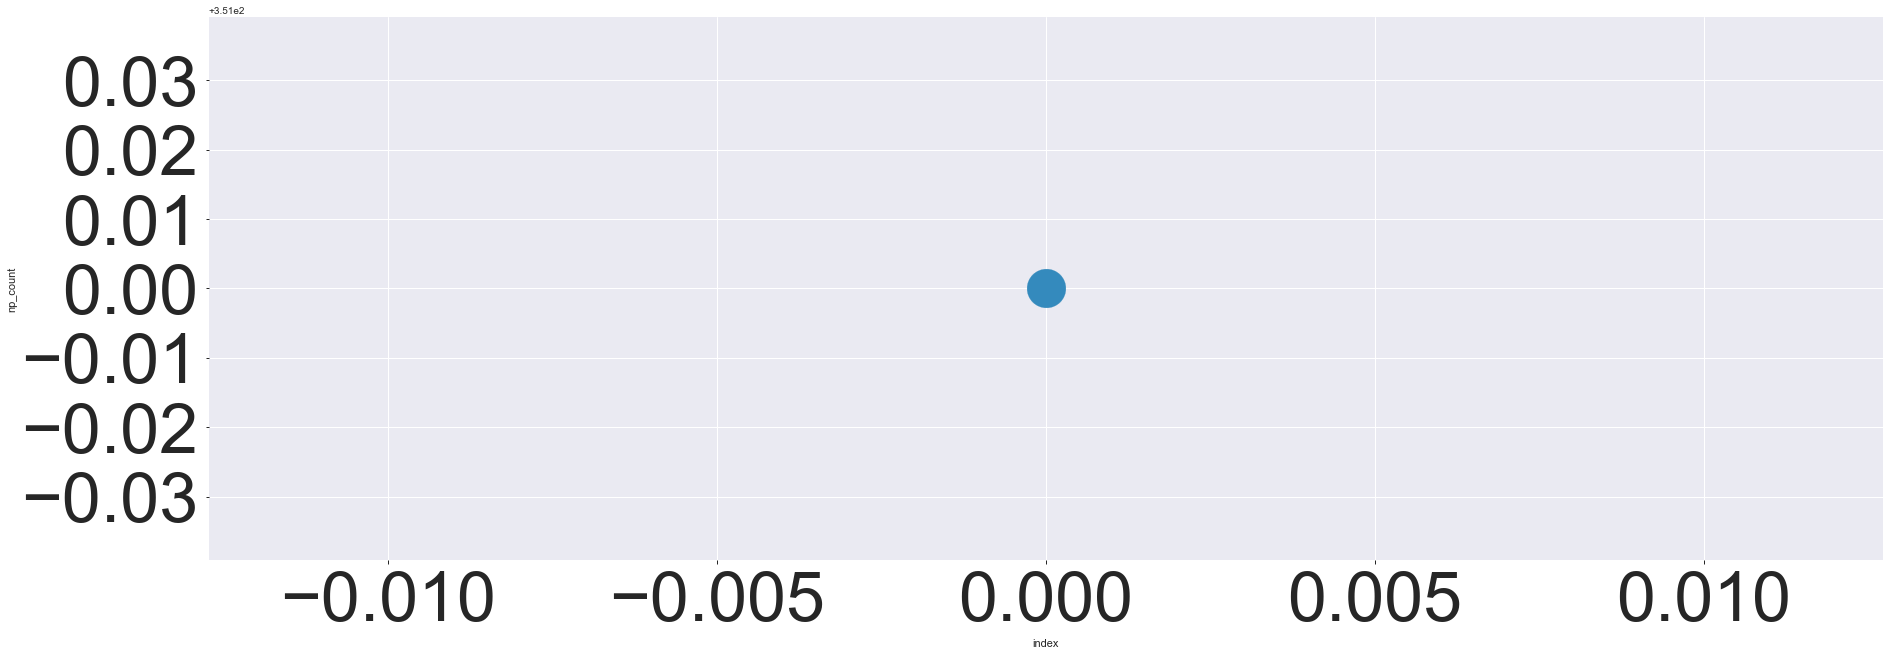

---- np_min ---


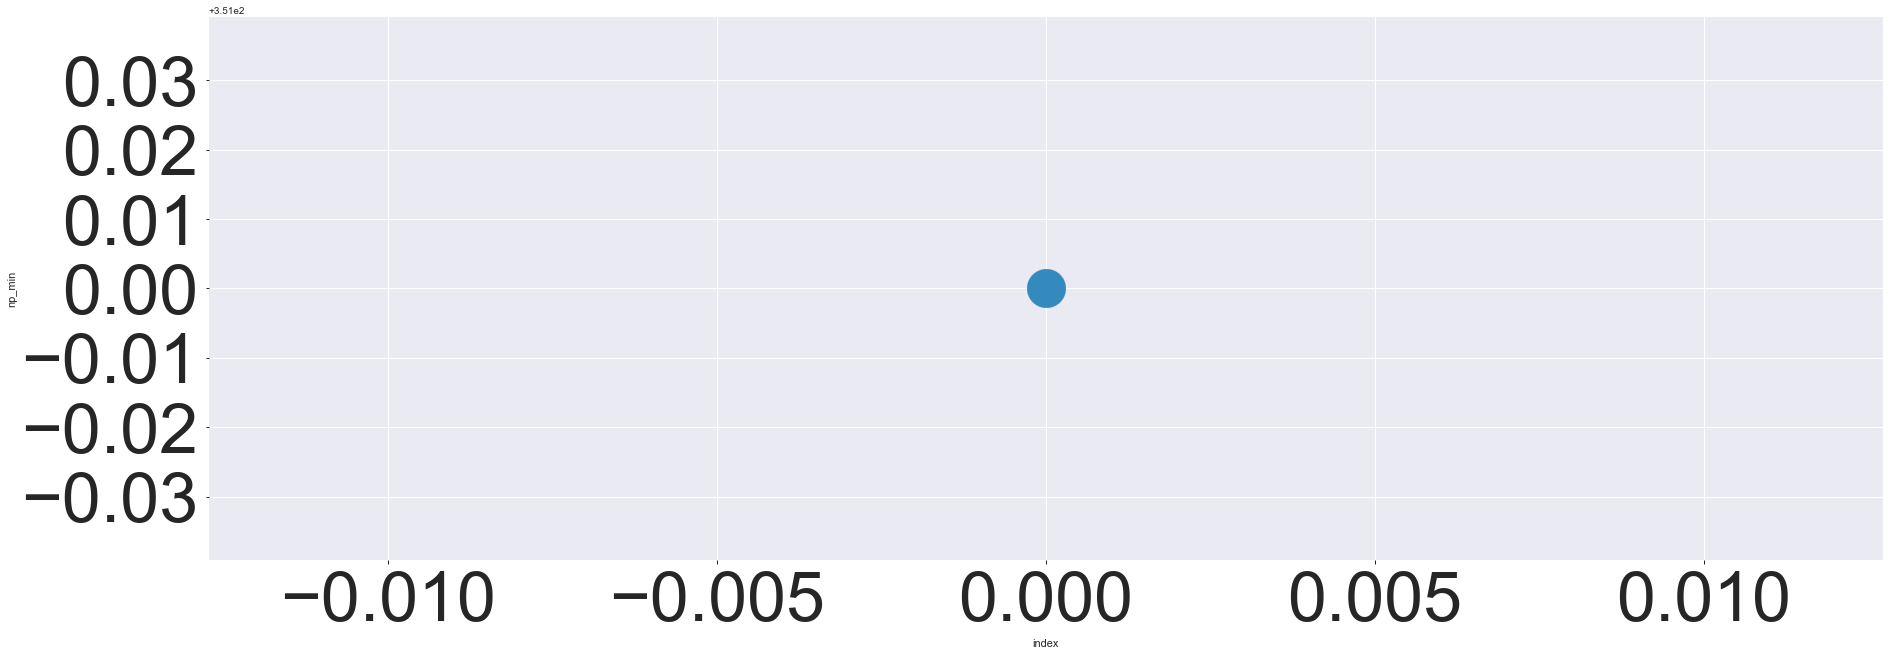

---- np_max ---


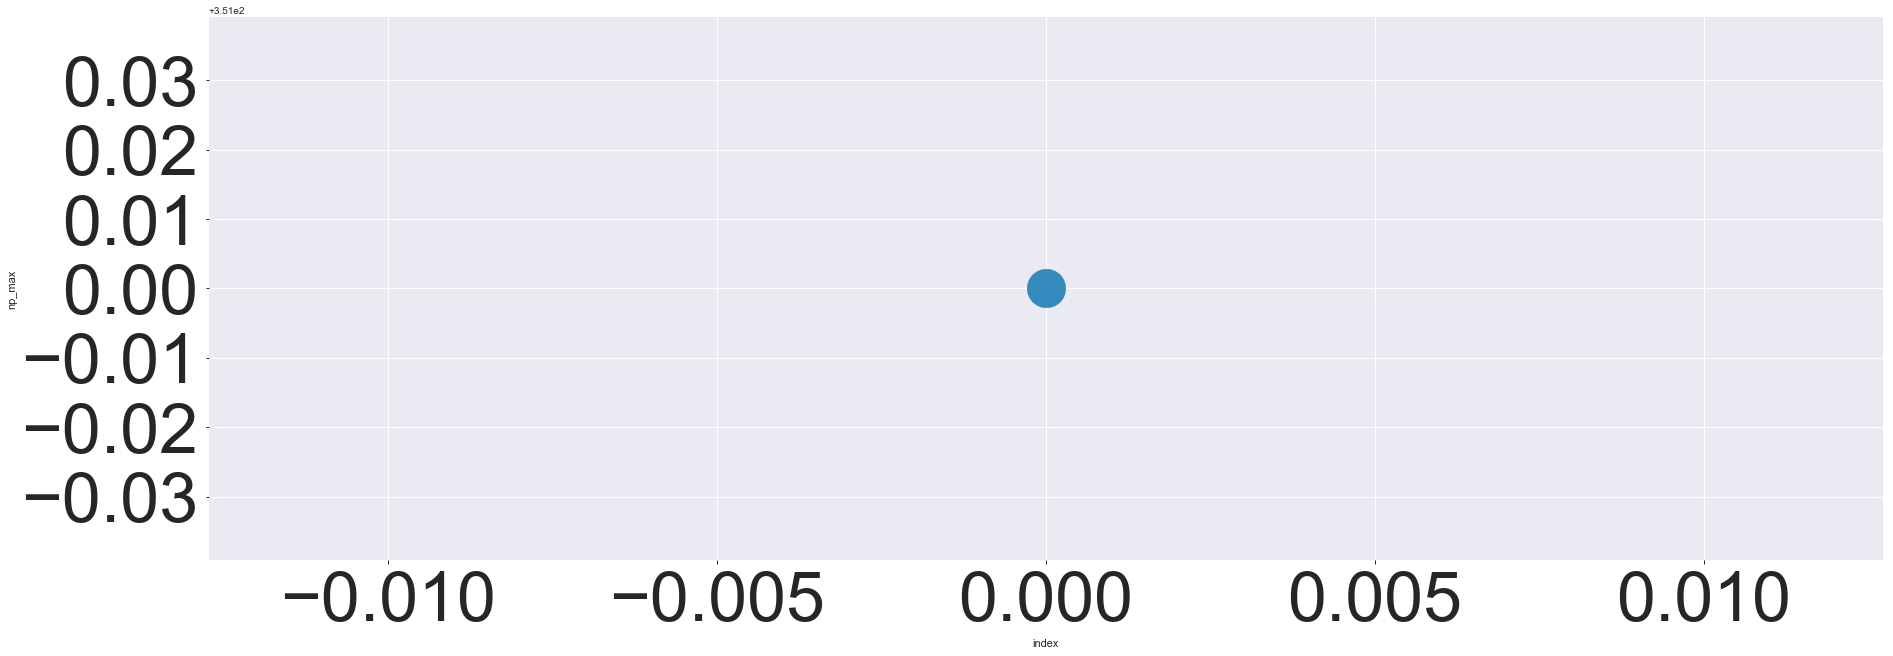

---- np_median ---


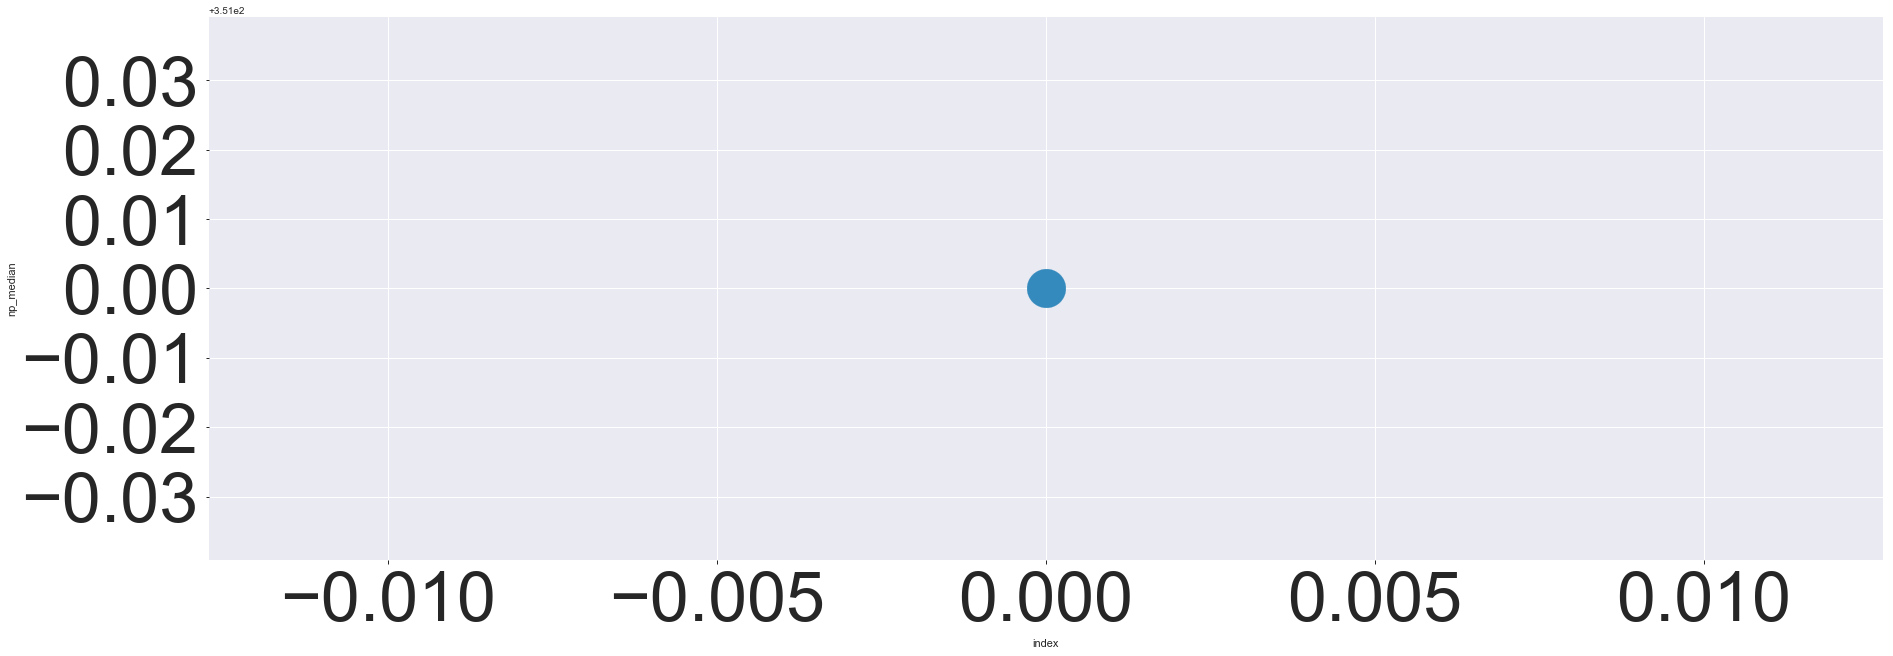

---- np_mean ---


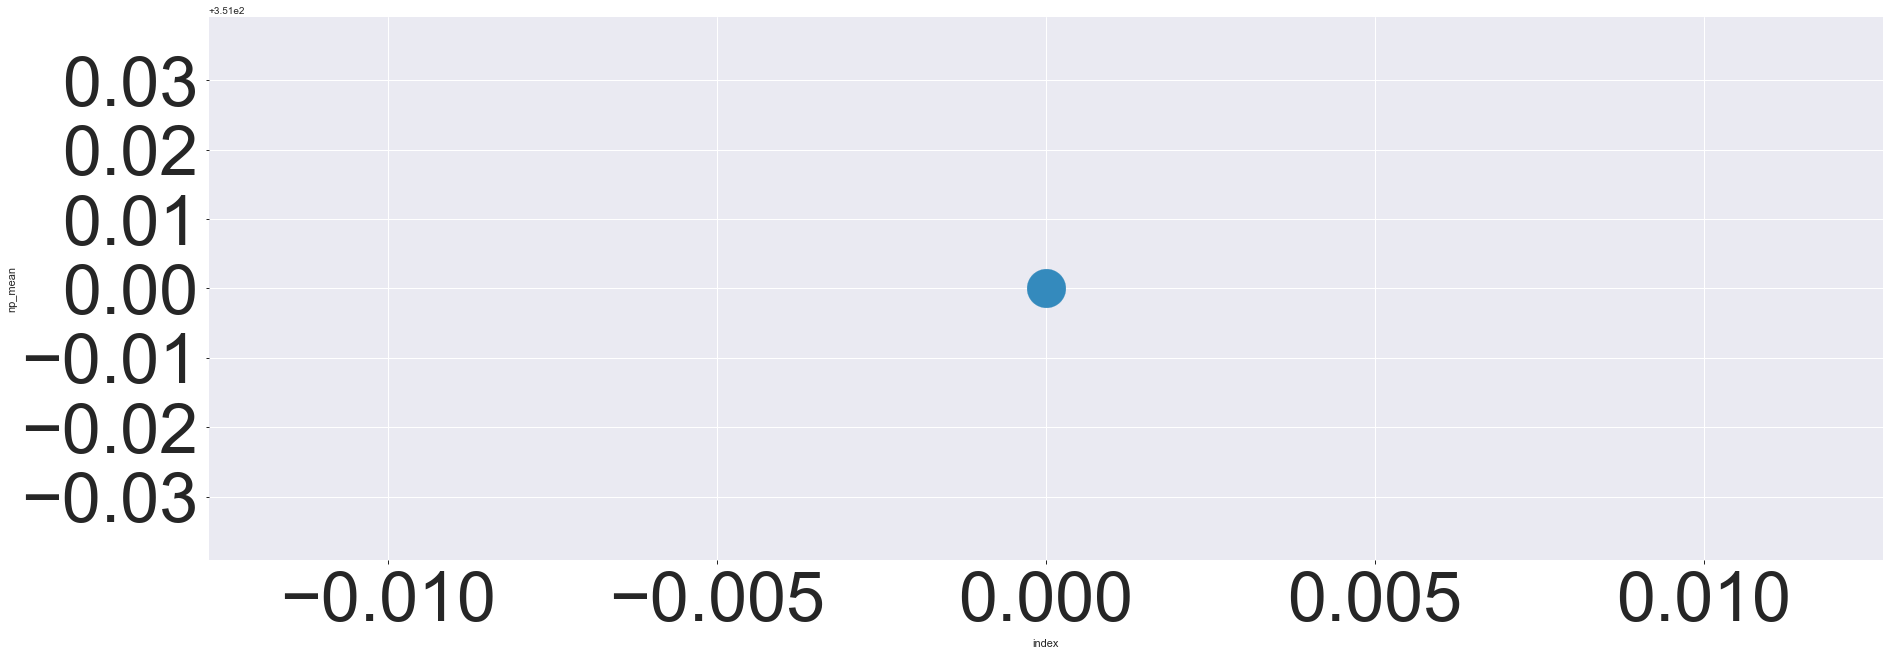

---- nr_count ---


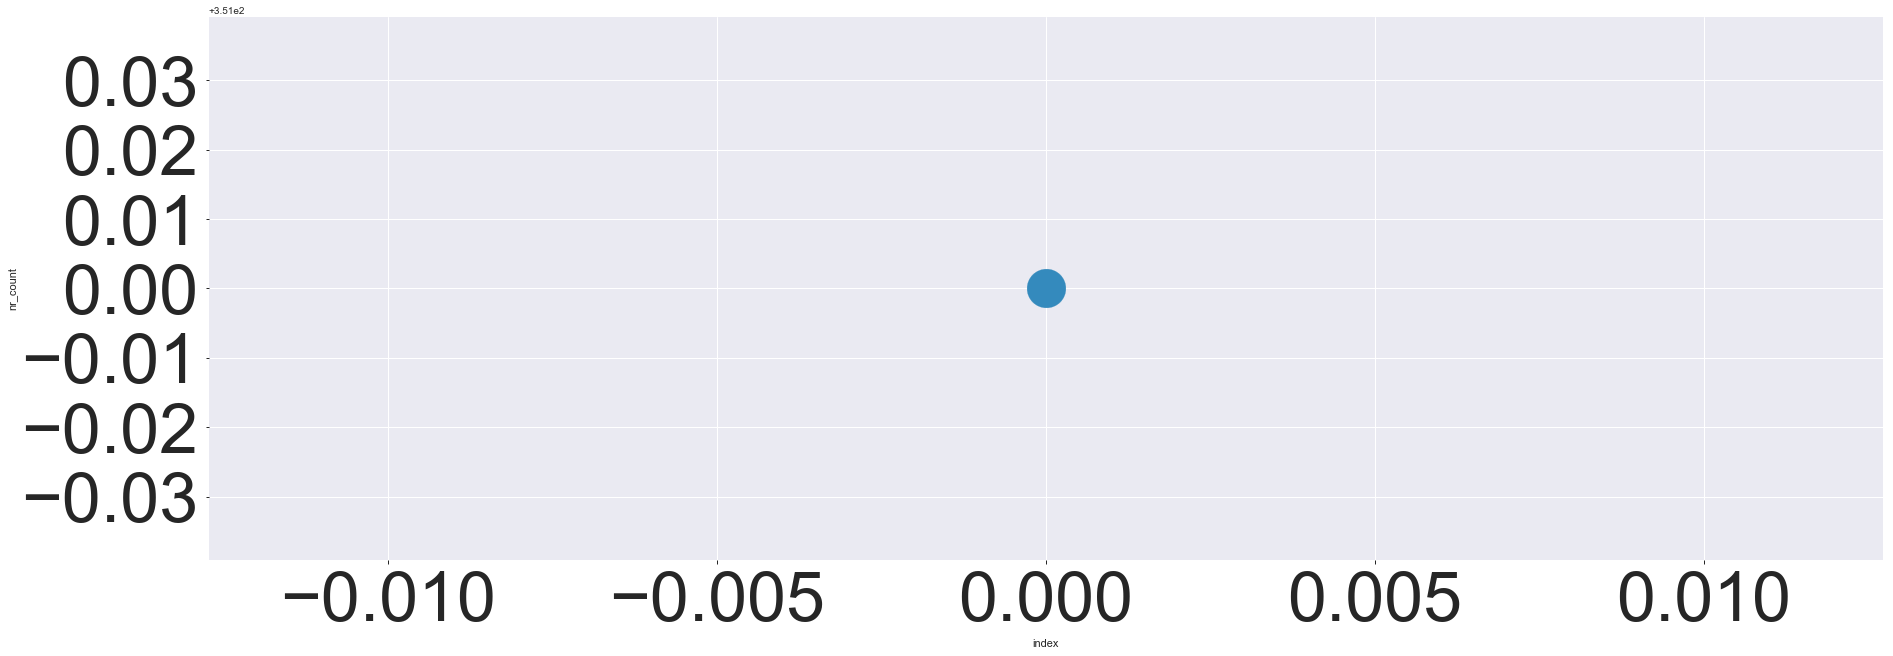

---- nrt_count ---


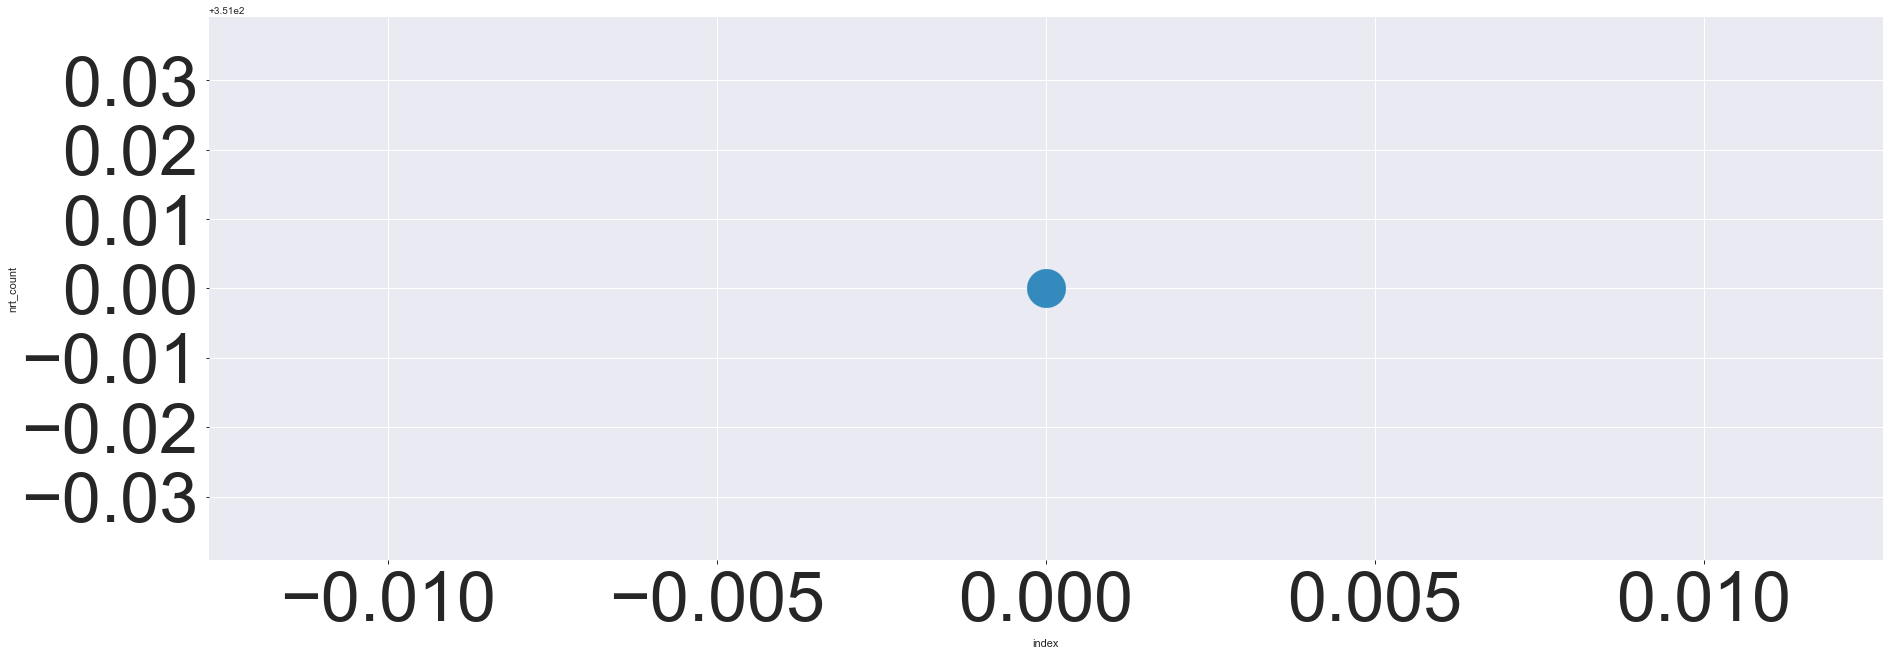

---- cdnt_count ---


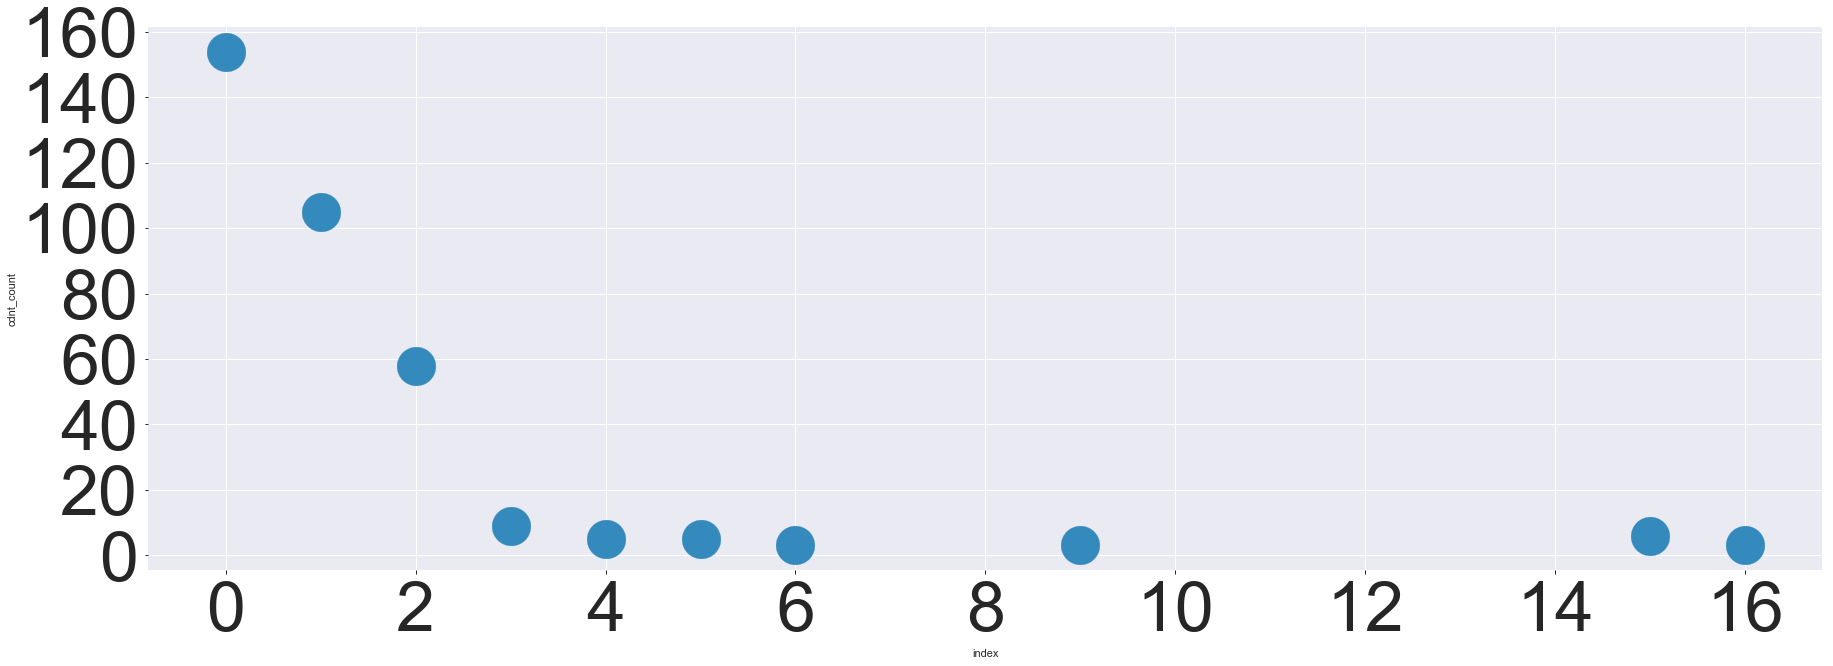

---- cdrt_count ---


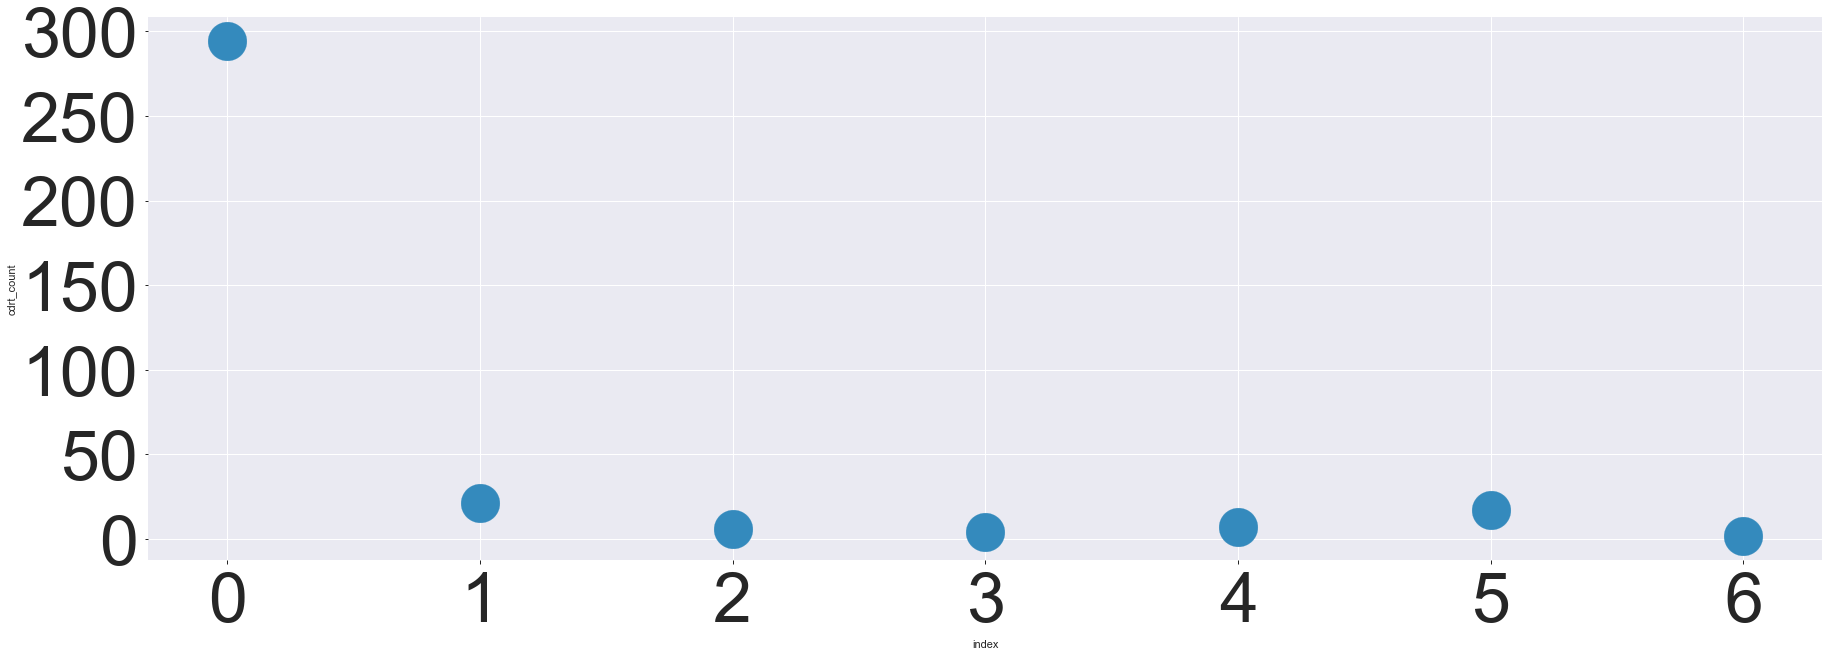

---- cdat_count ---


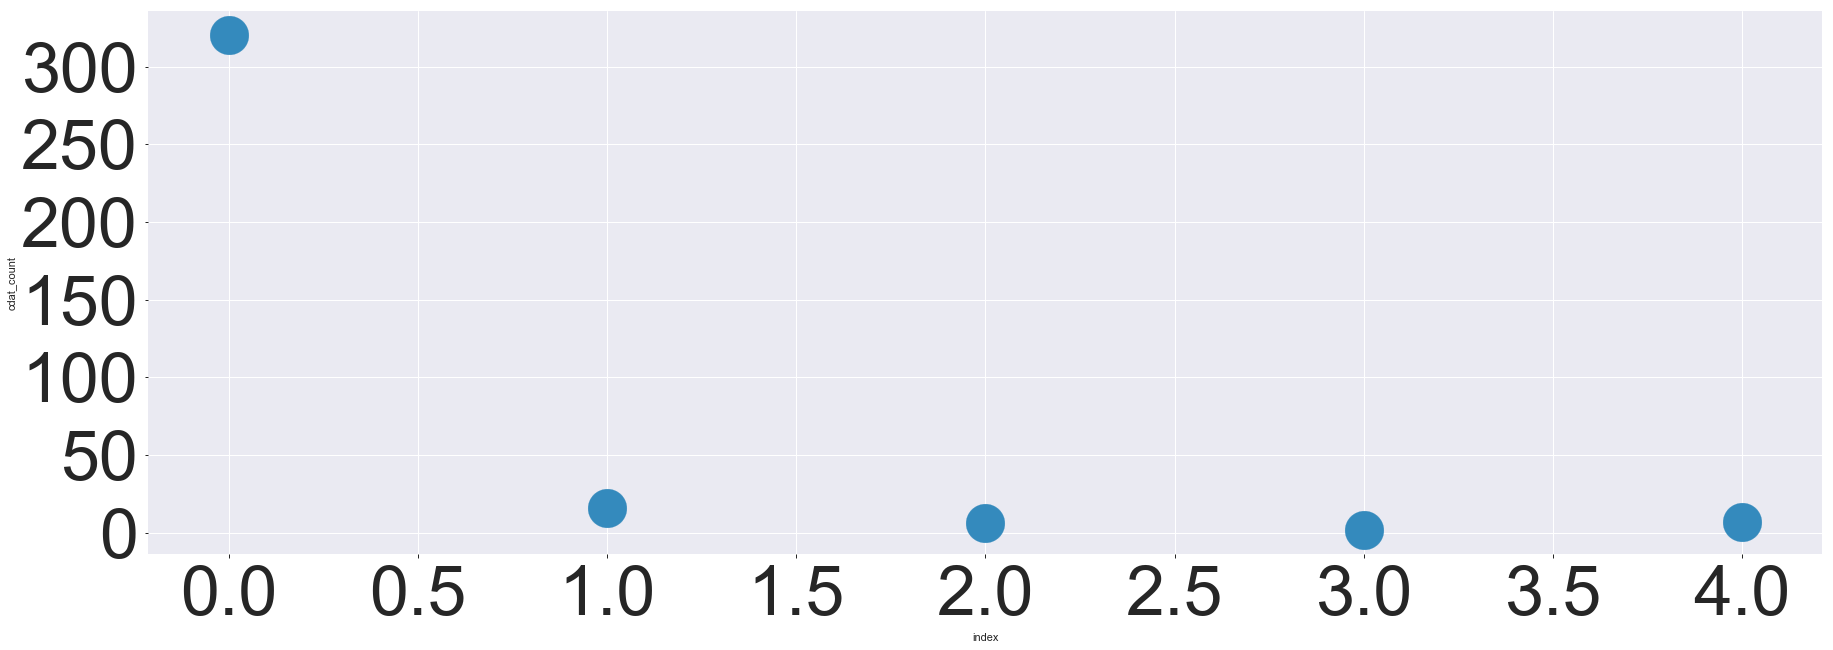

---- cdct_count ---


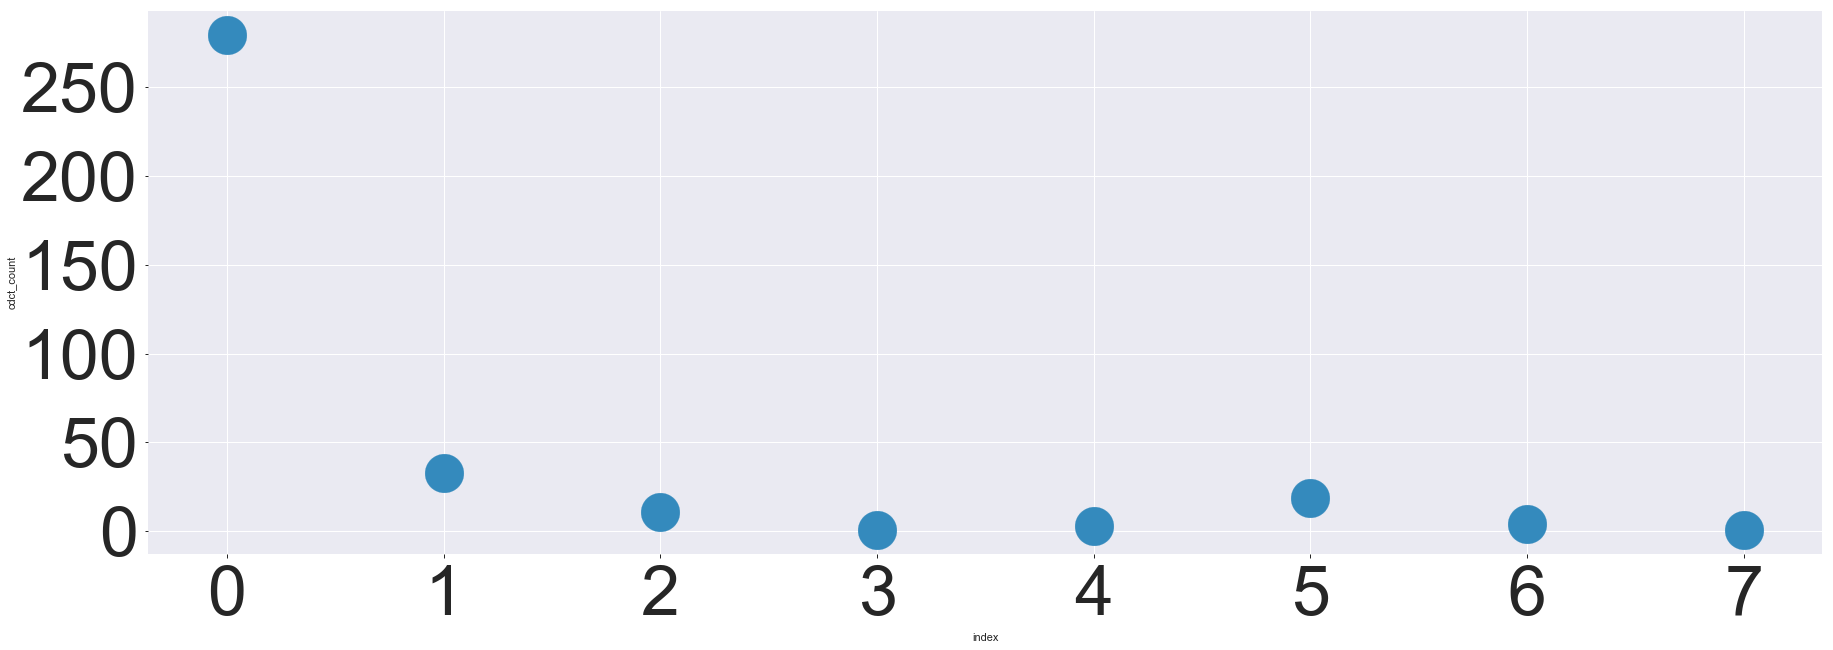

---- cddt_count ---


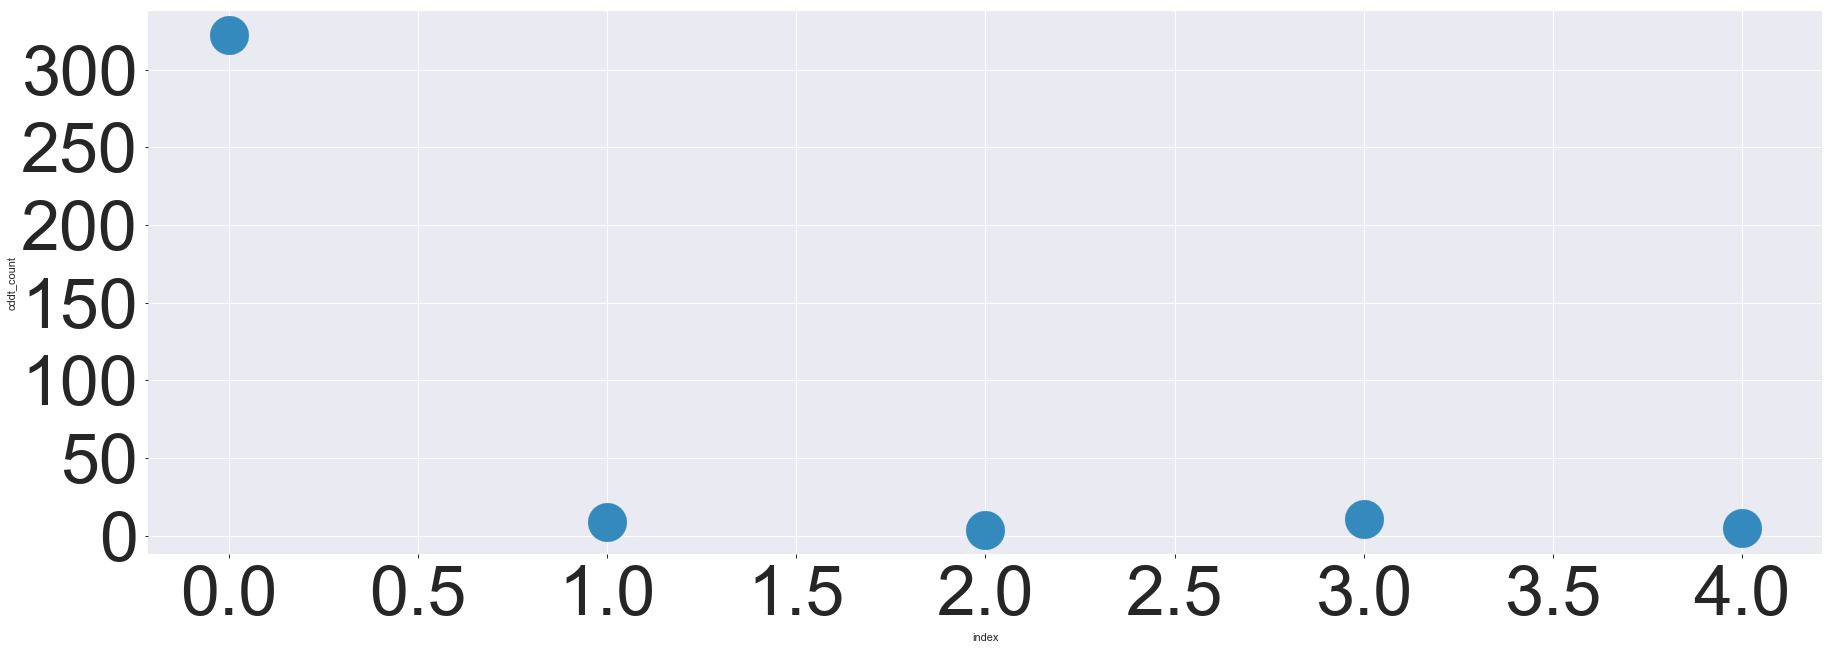

---- cdgt_count ---


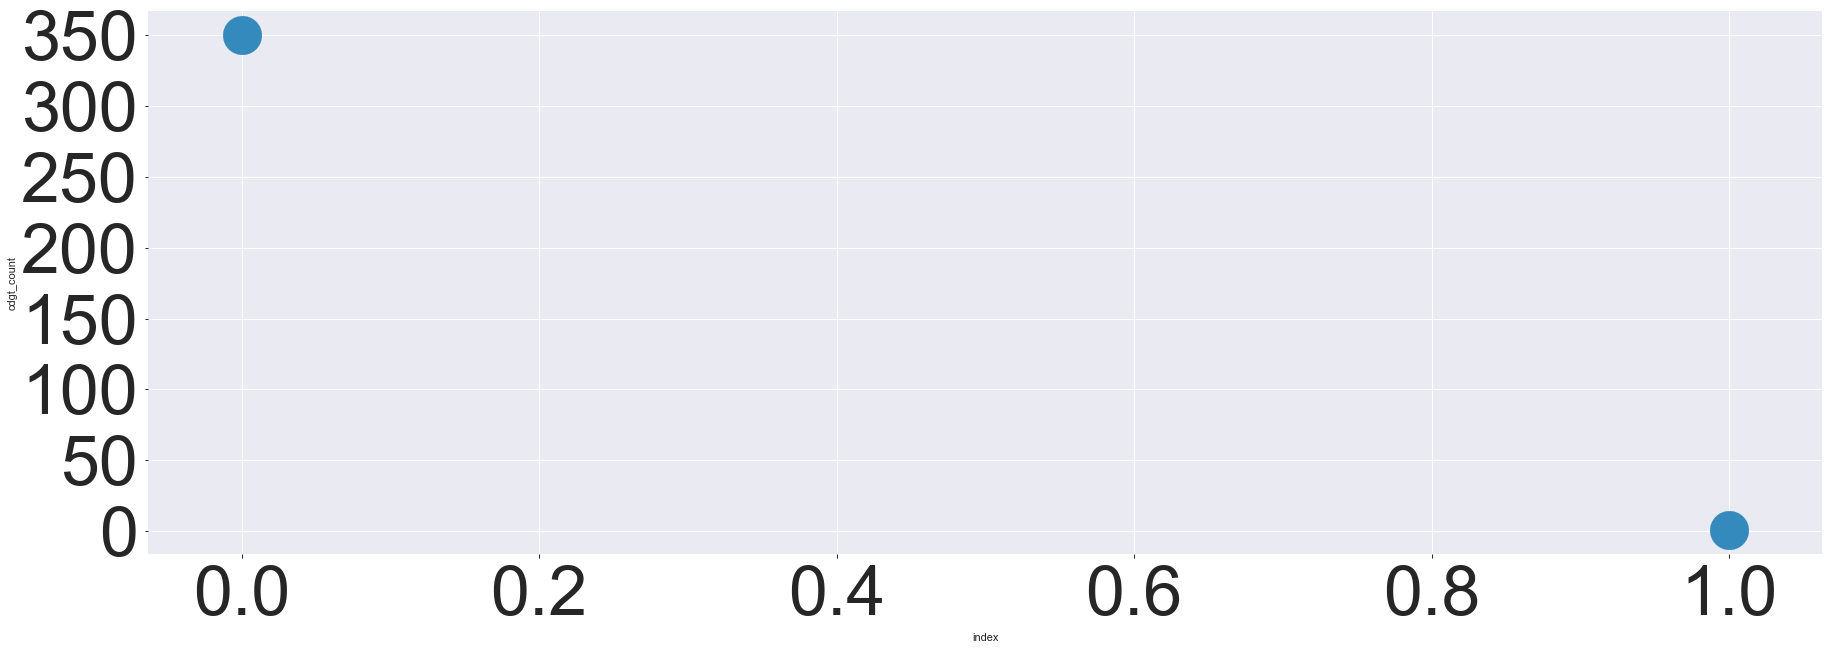

---- cdit_count ---


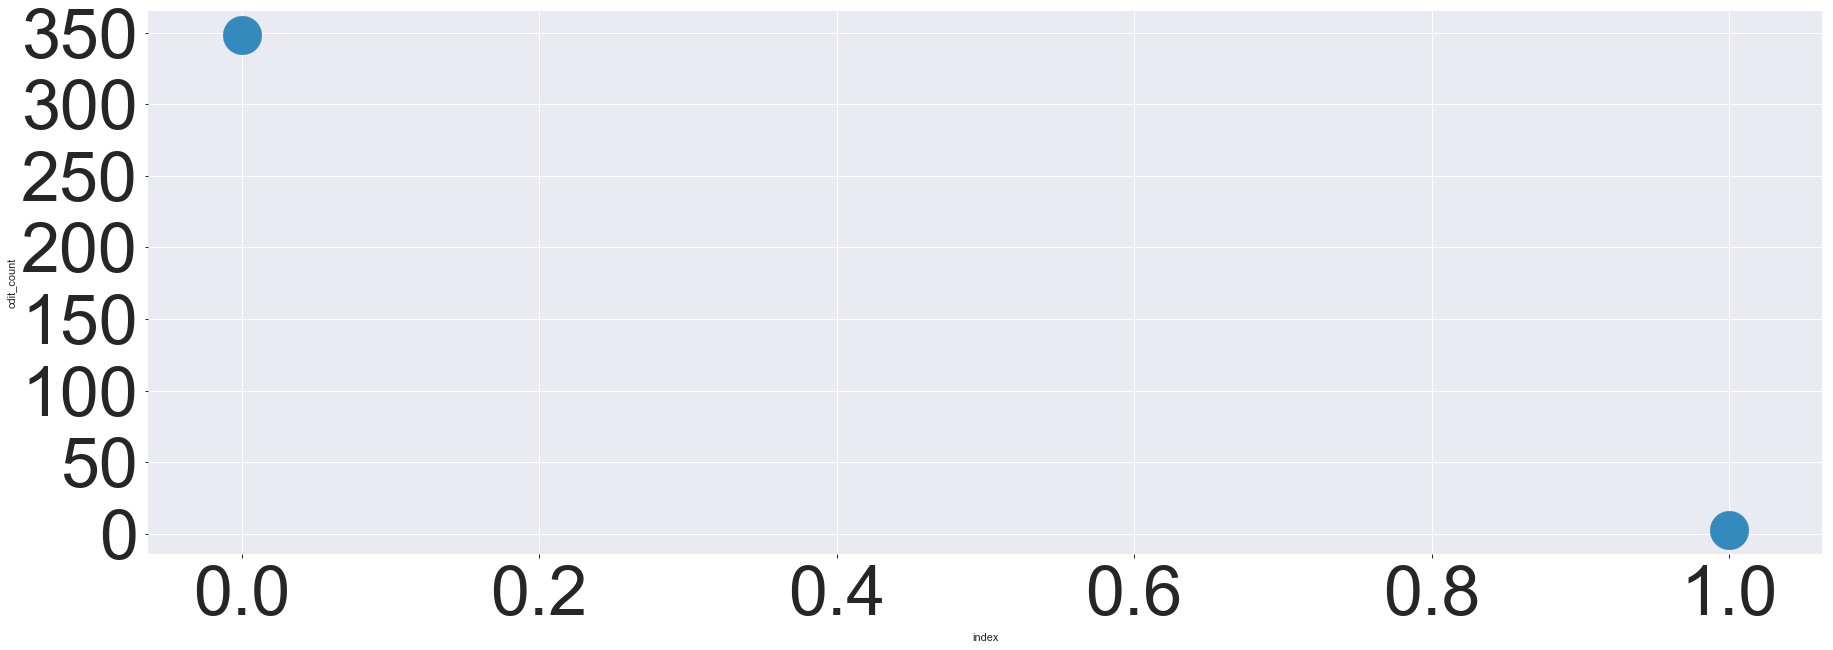

---- cdpt_count ---


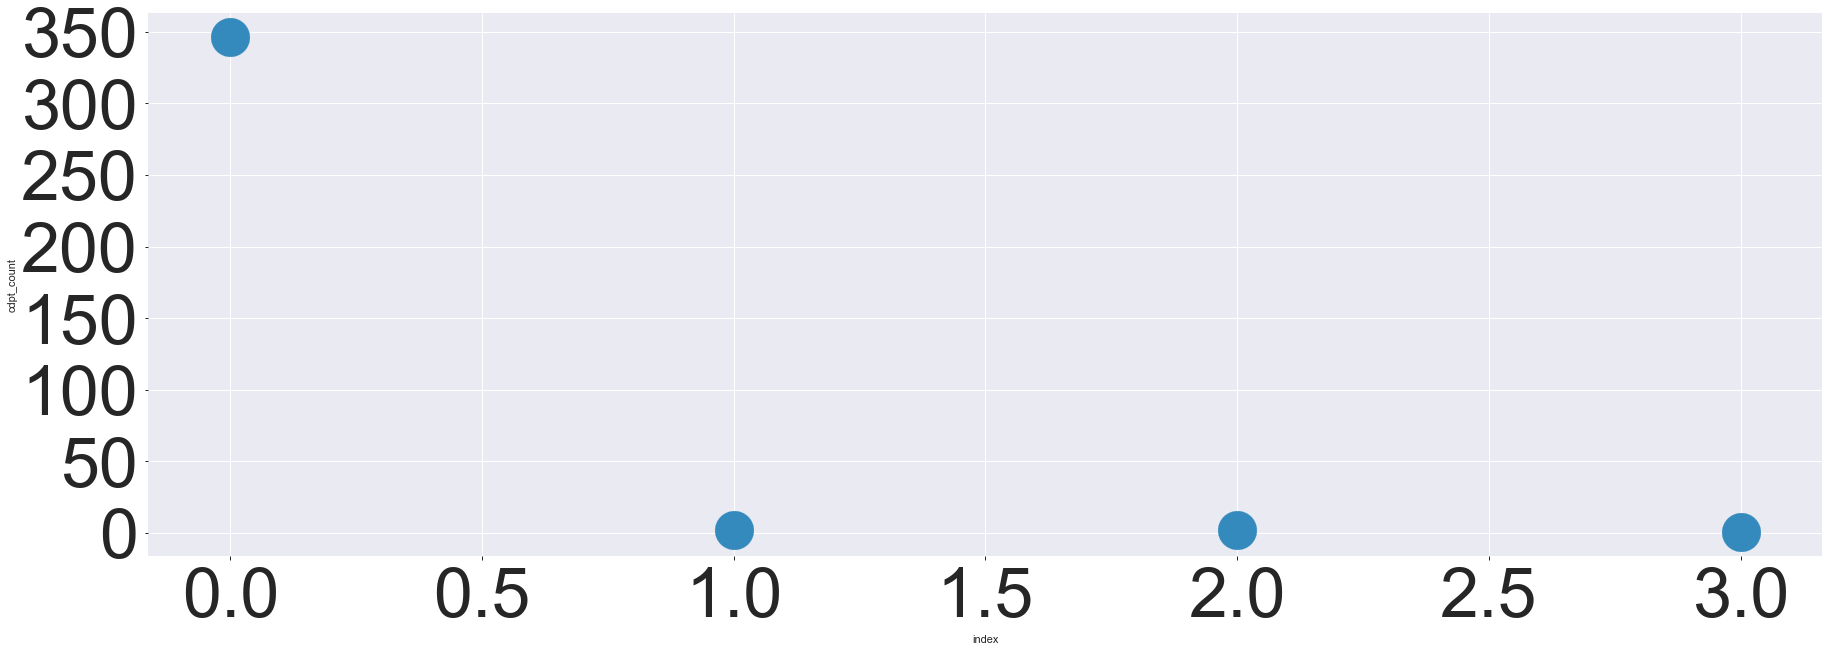

---- nw_count ---


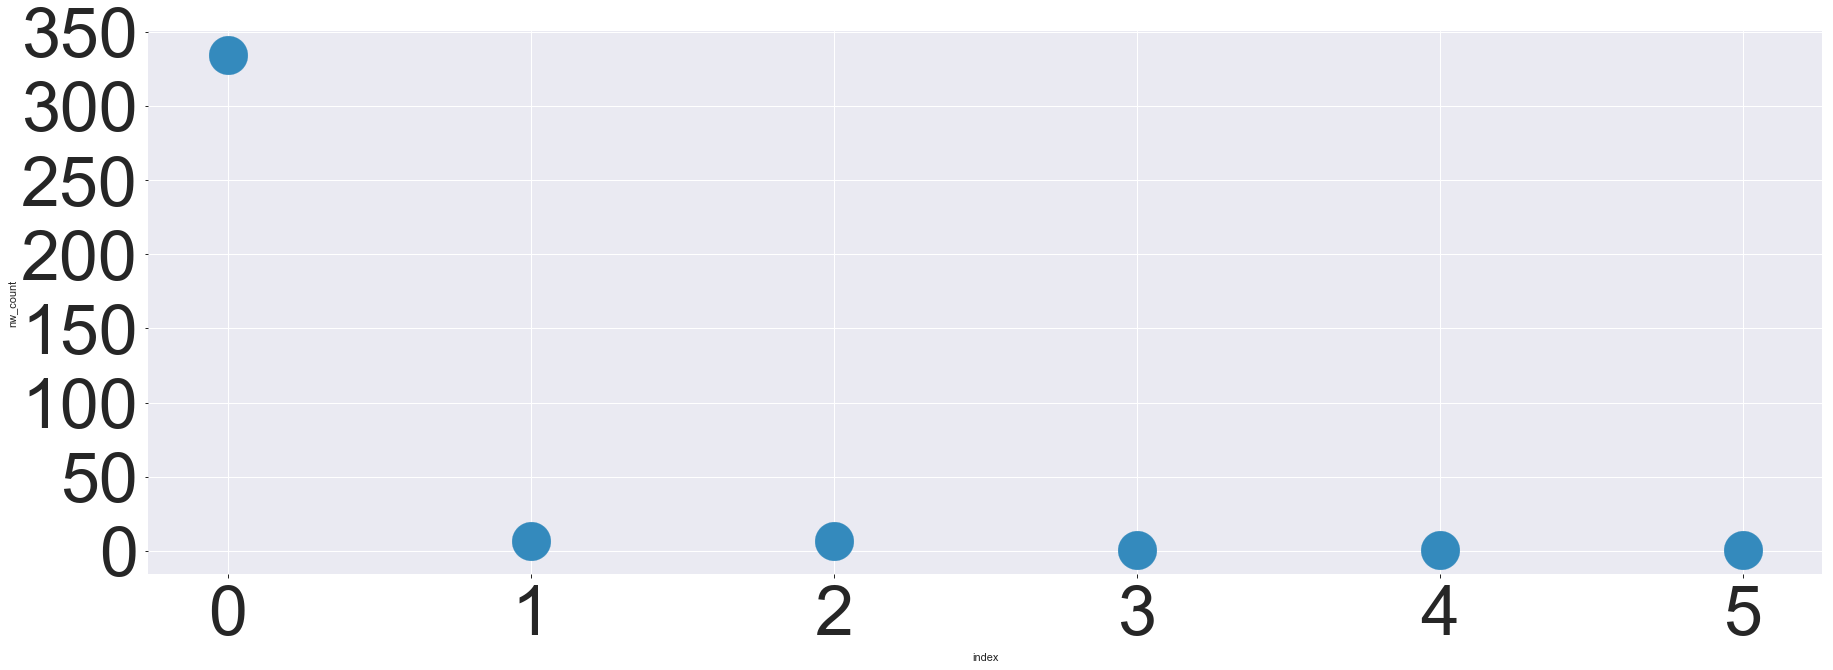

---- nrq_count ---


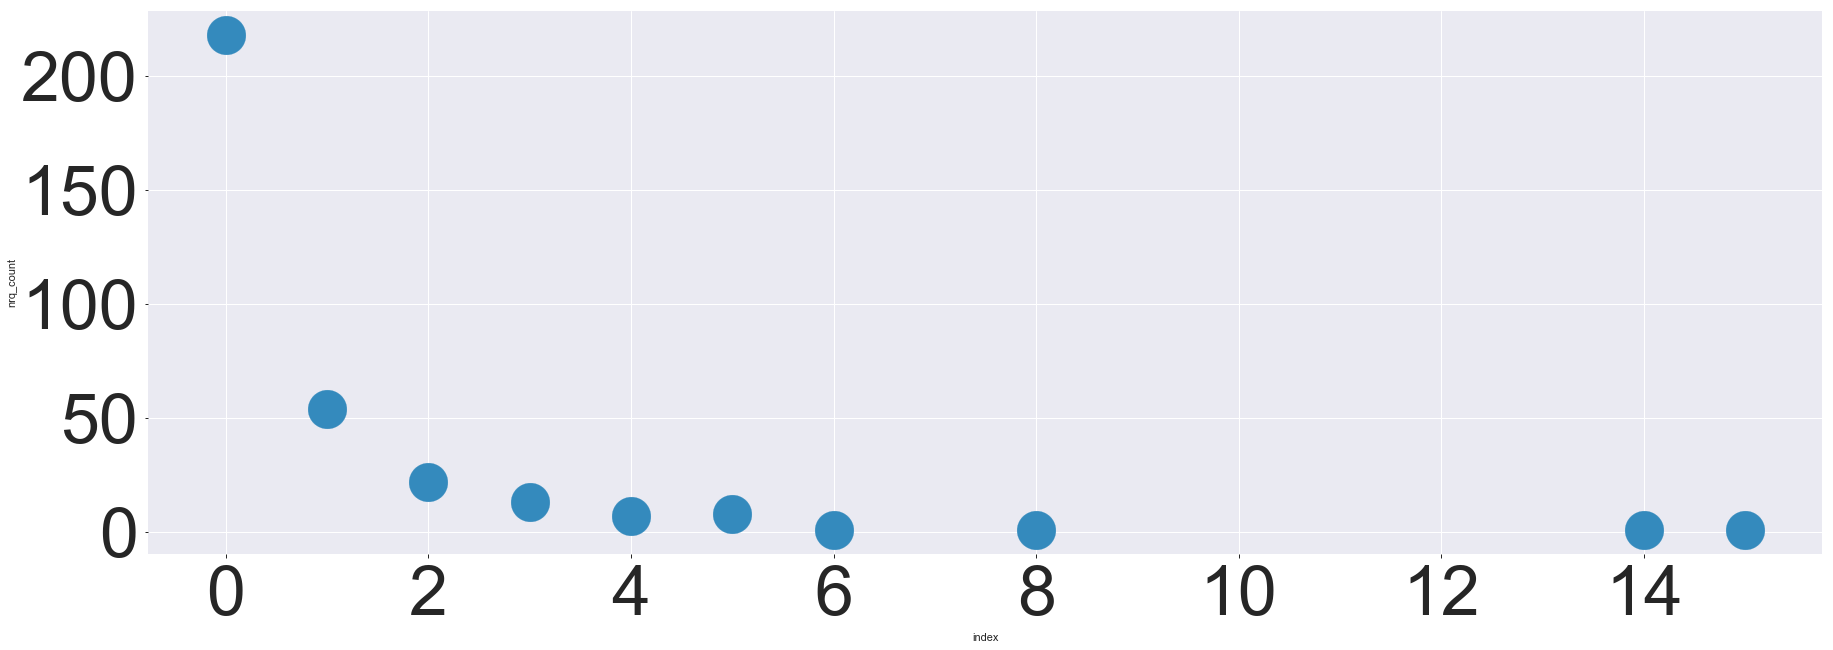

---- nsh_count ---


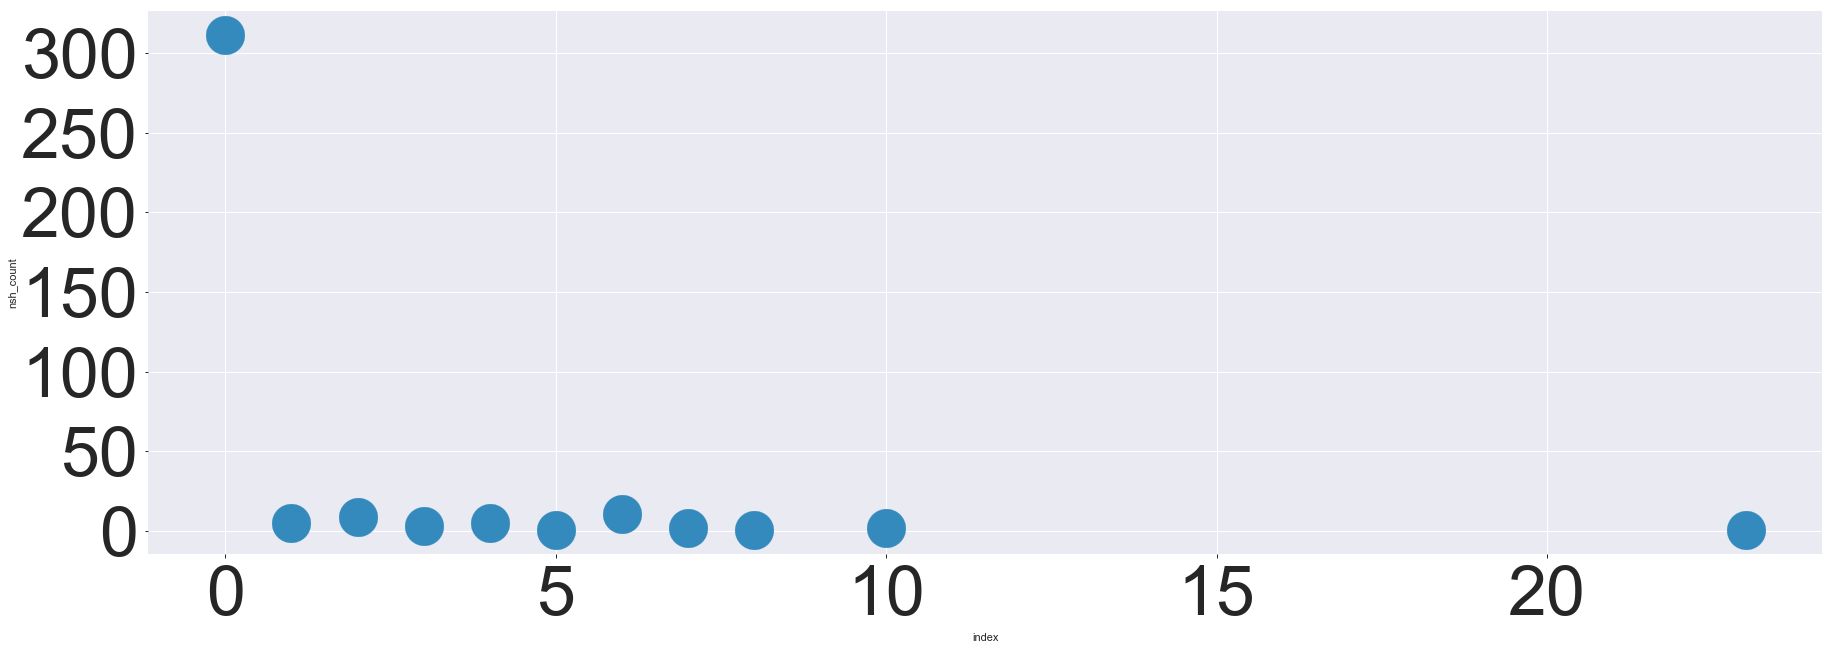

---- ncys_count ---


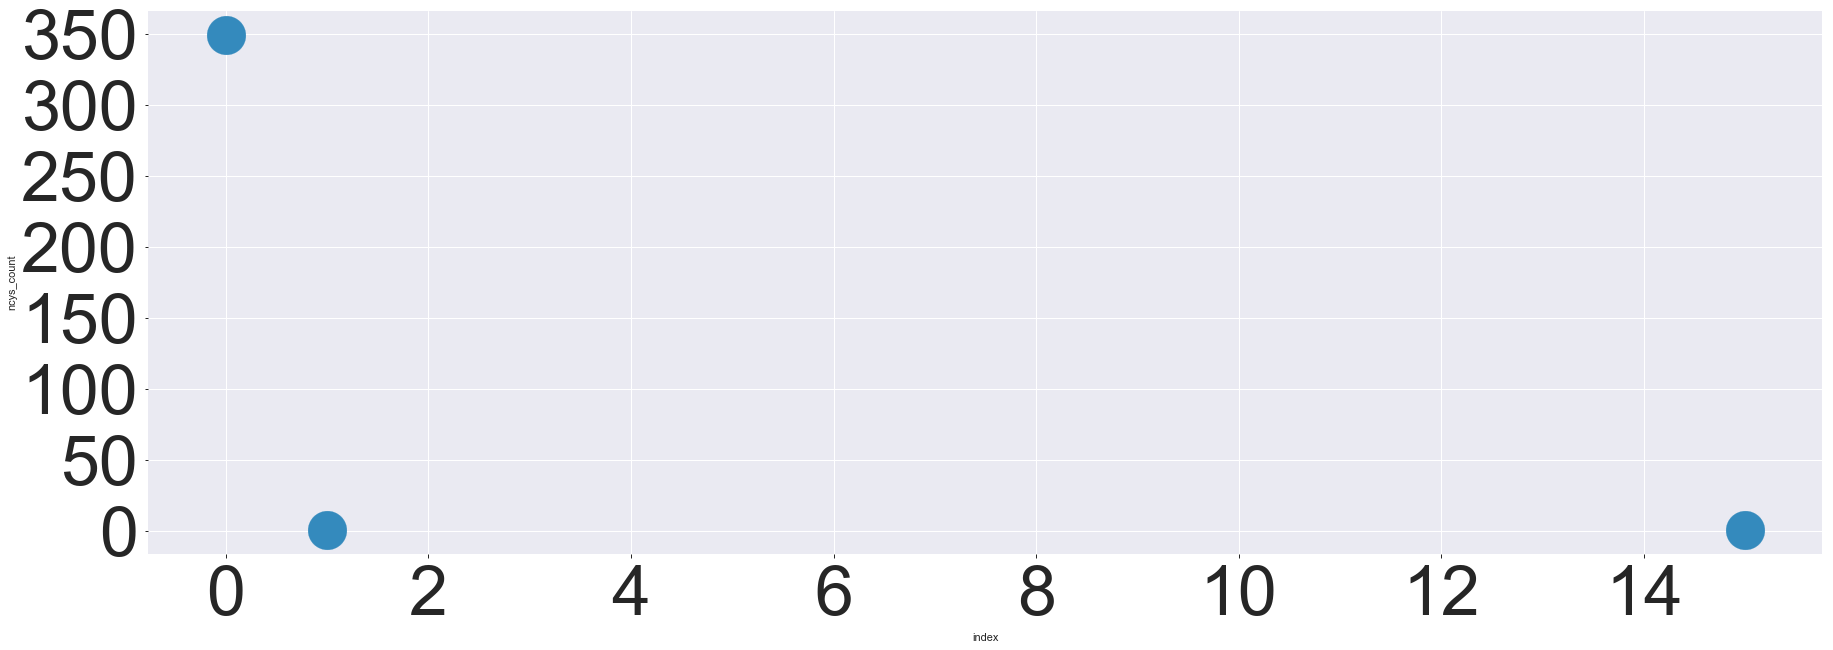

---- ngc_count ---


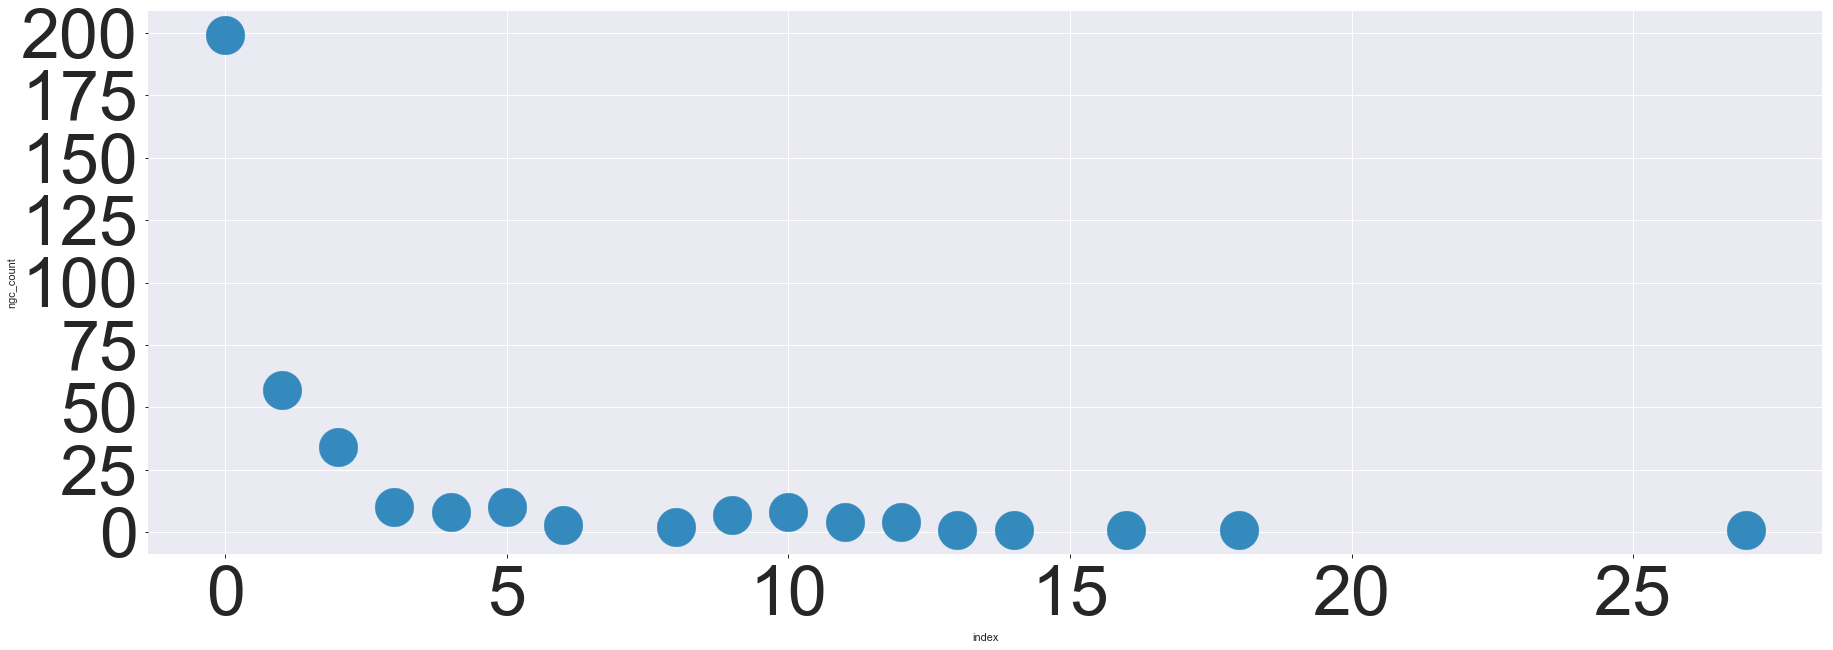

---- ngp_count ---


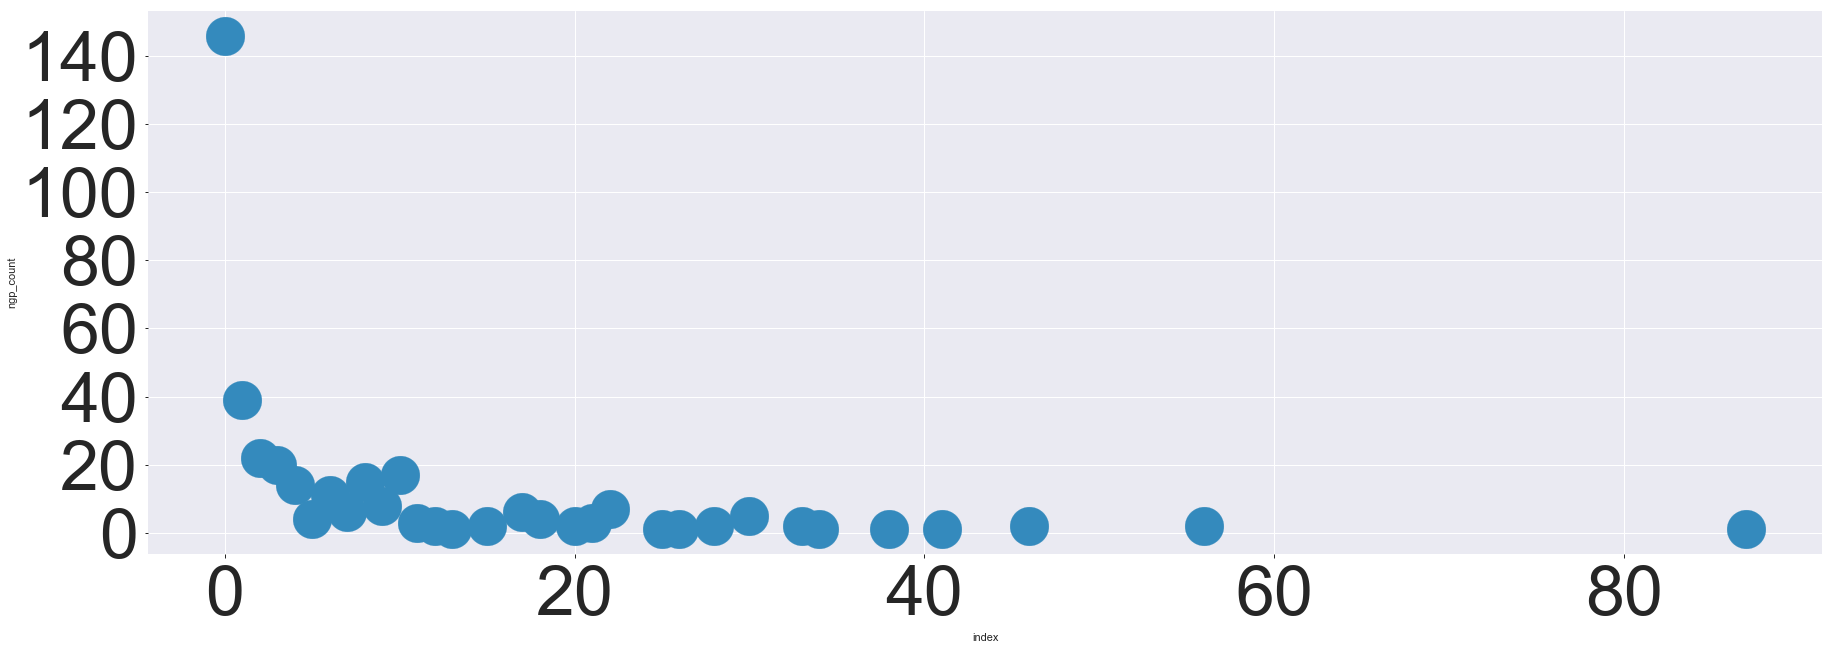

---- ngro_count ---


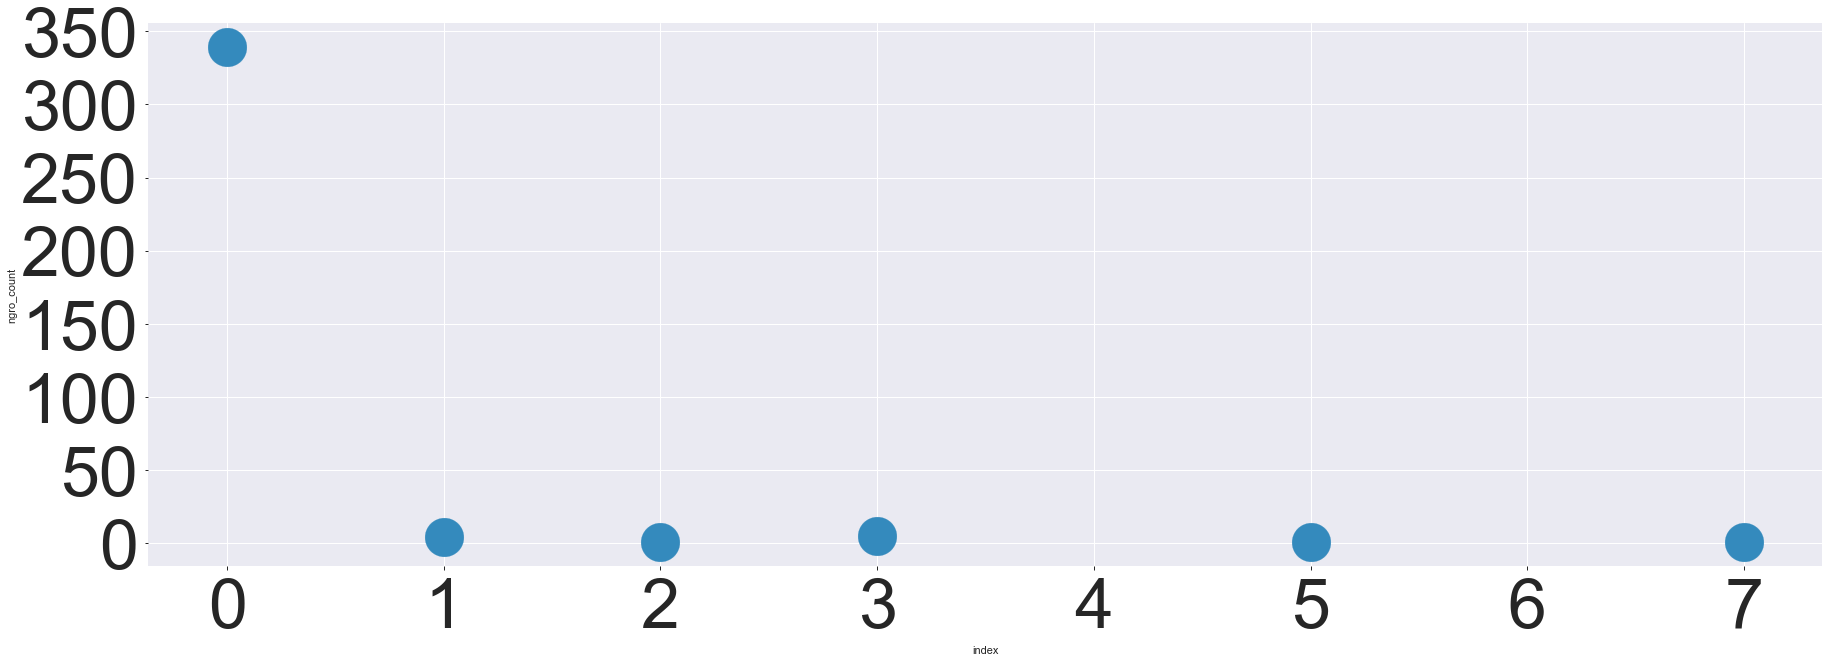

---- npol_count ---


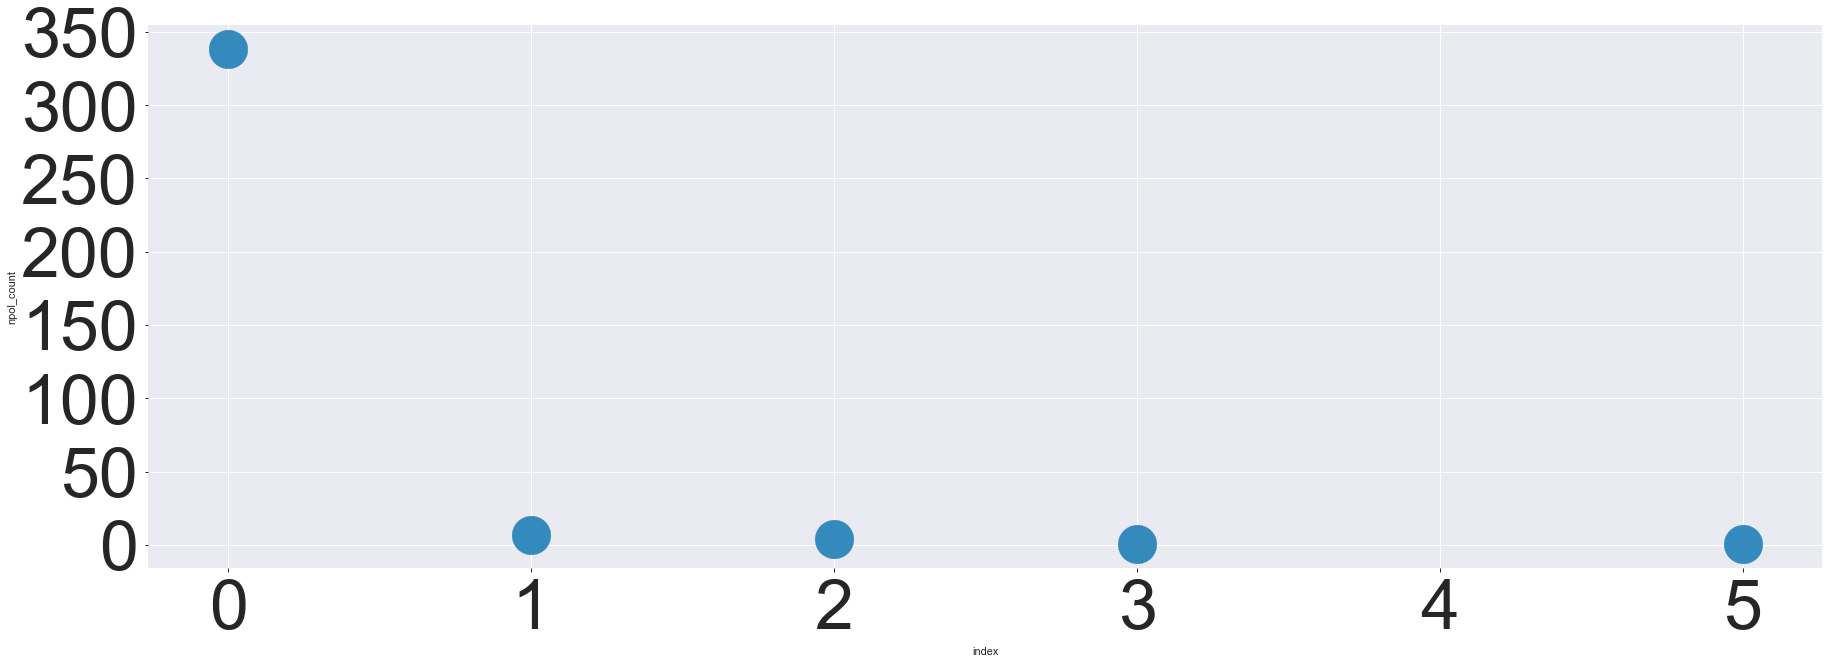

---- nf_count ---


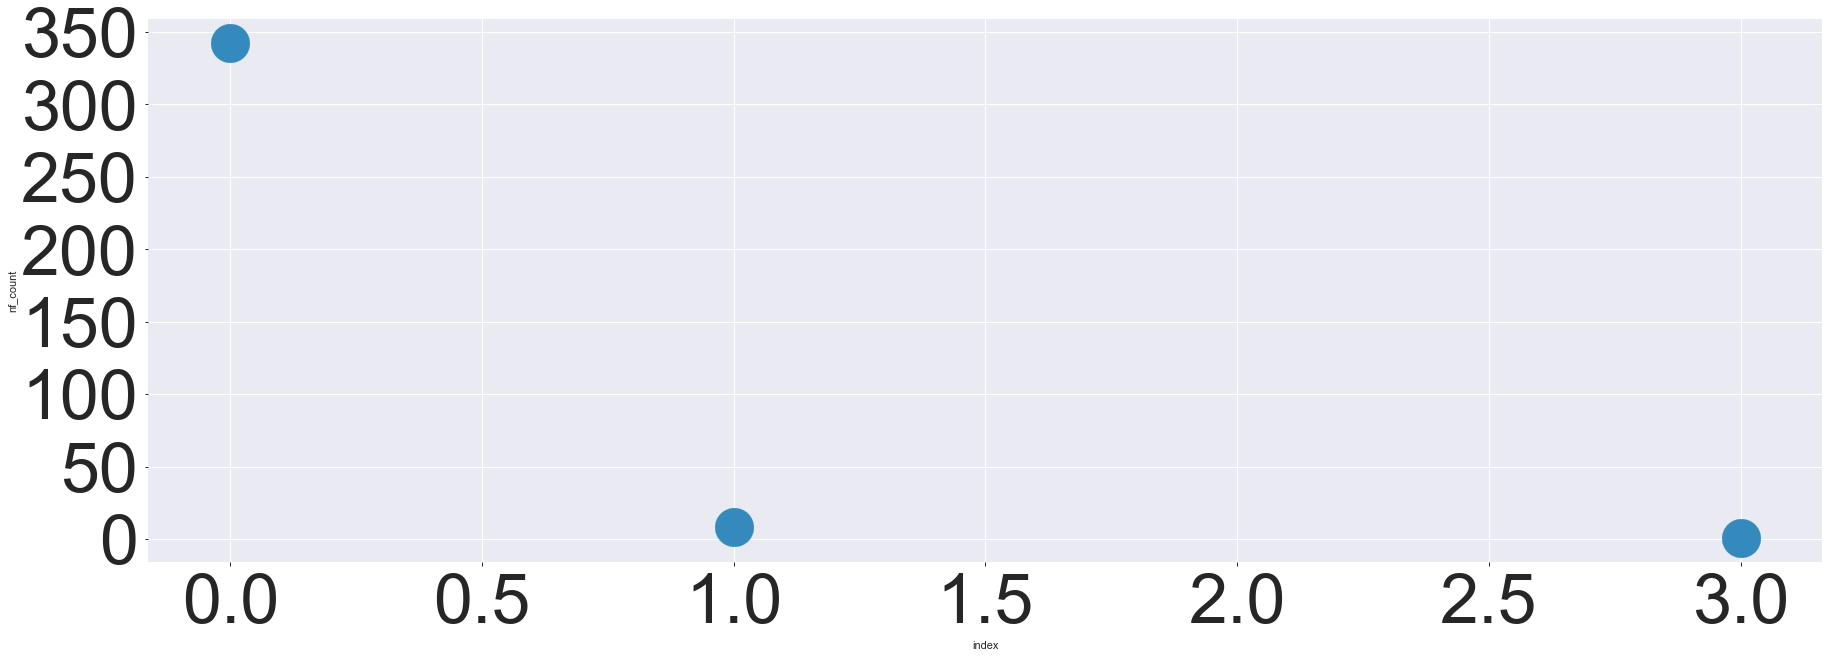

In [6]:
#Index staat raar hier bij een aantal?
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print("---- {} ---".format(column))
    df_count = df[column].value_counts().sort_index()
    df_count = df_count.to_frame()
    df_count['index'] = df_count.index
    df_count.plot(x='index', y=column, kind='scatter', subplots=False, figsize=(30,10), fontsize=70, marker='o', s=1500)
    plt.show()
    

### Bar value count per metric 

---- loc_count ---


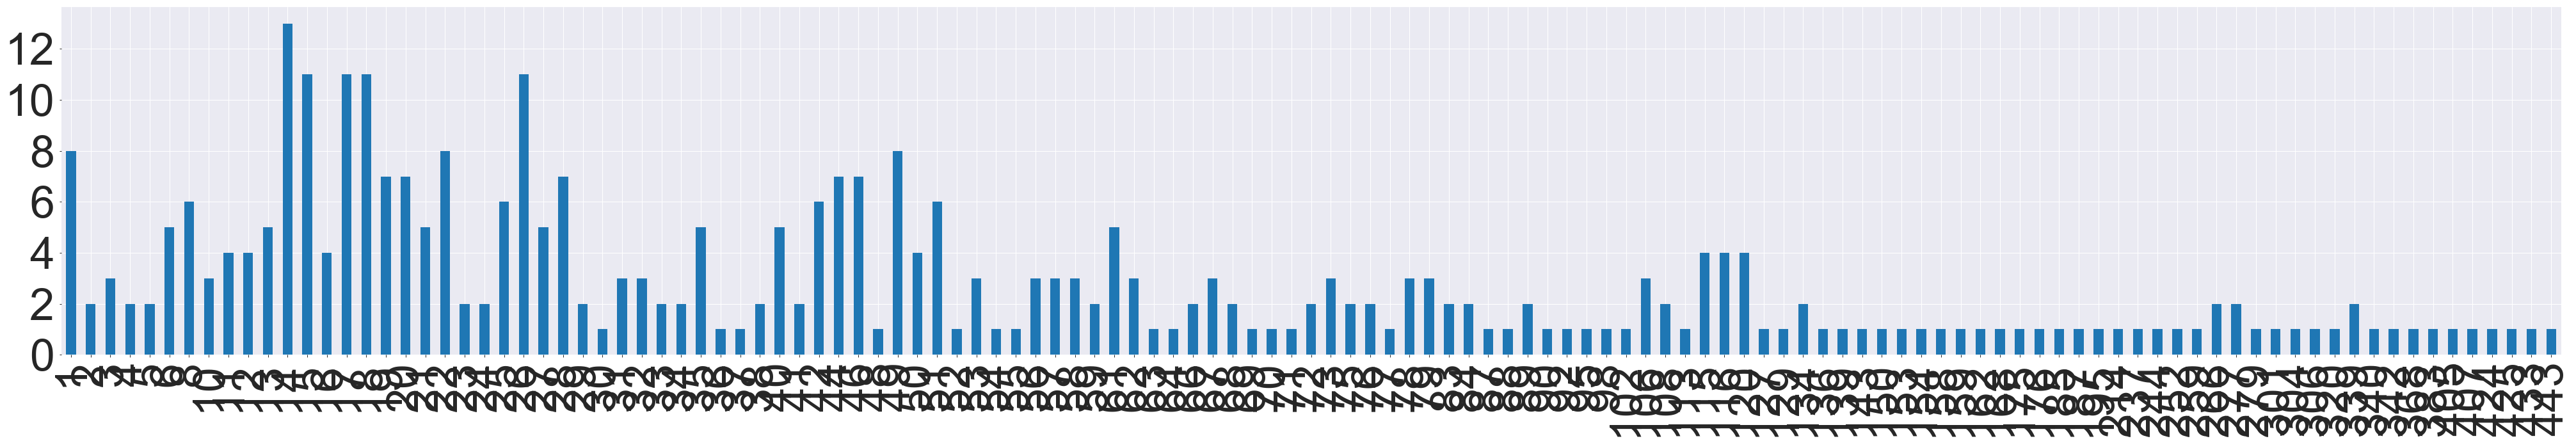

---- bloc_count ---


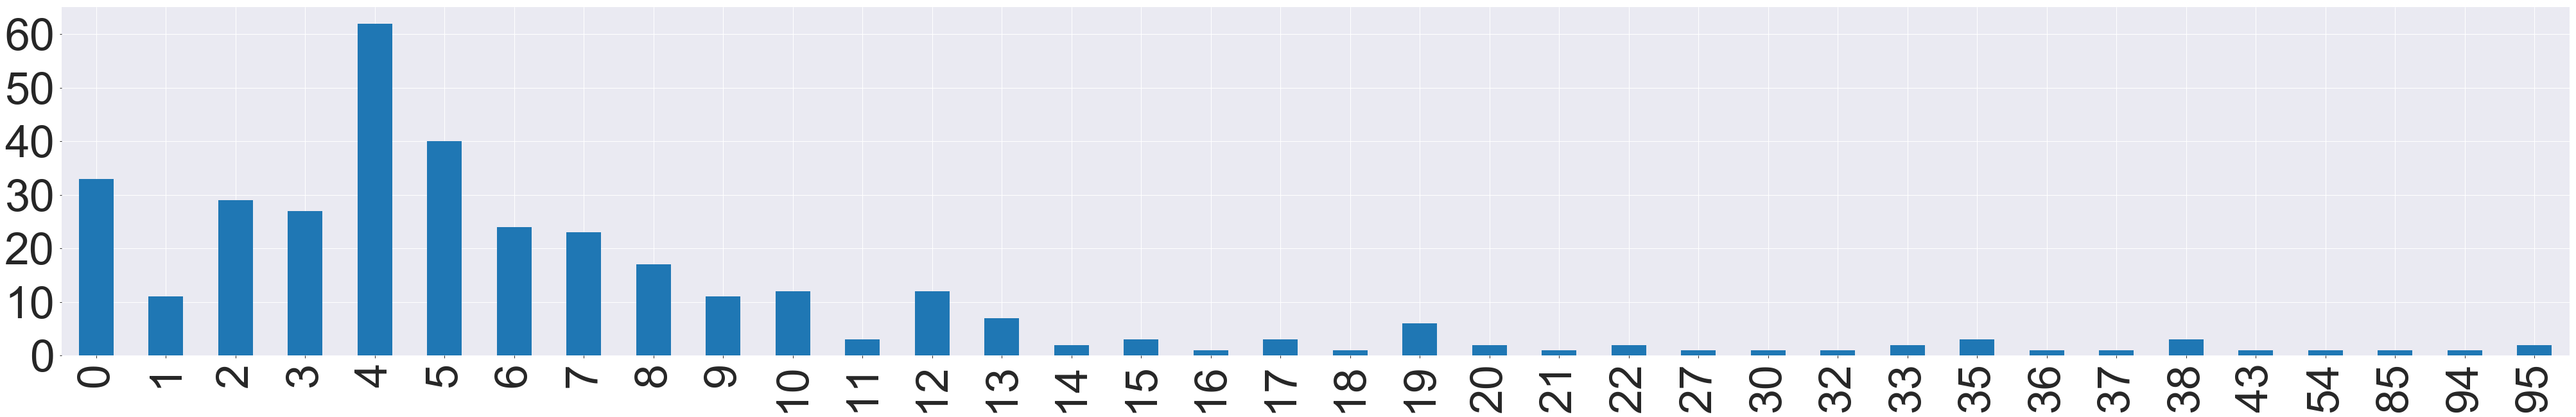

---- cloc_count ---


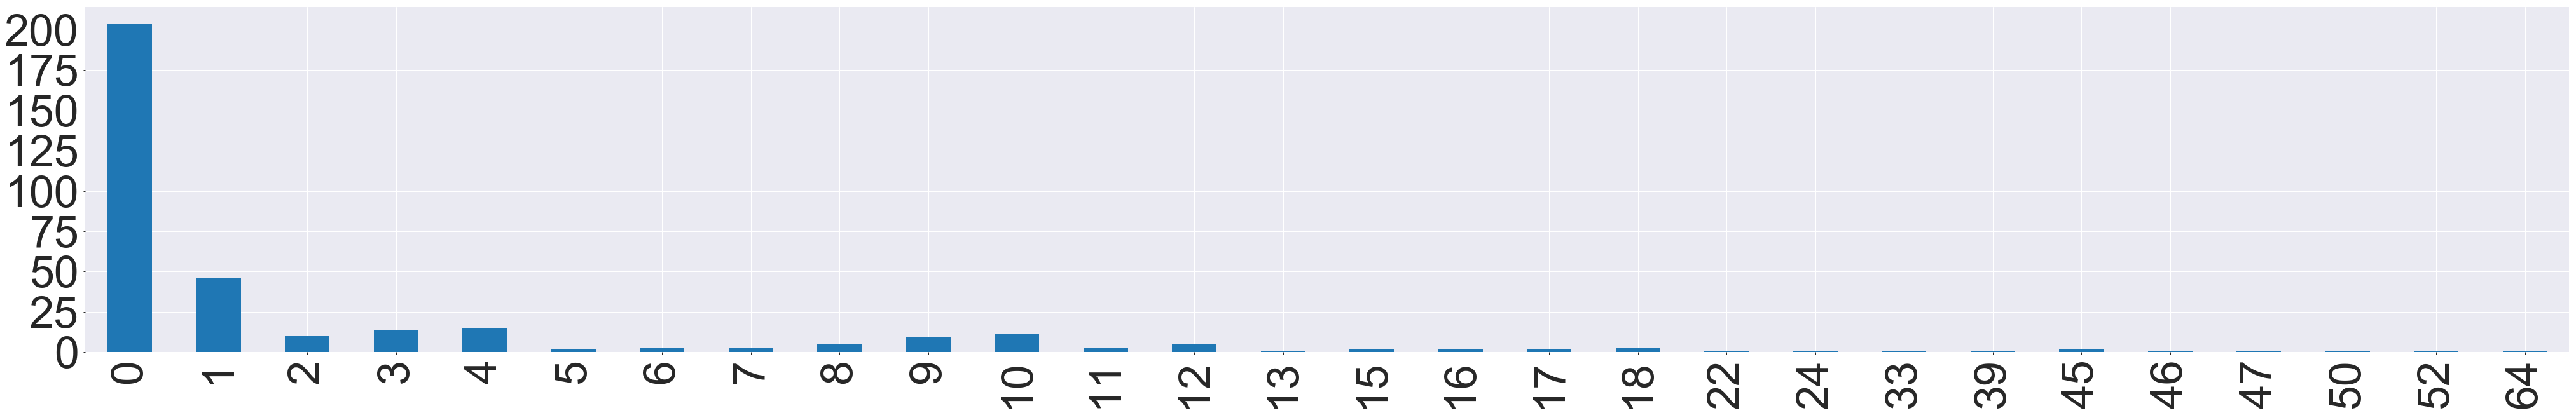

---- dpt_count ---


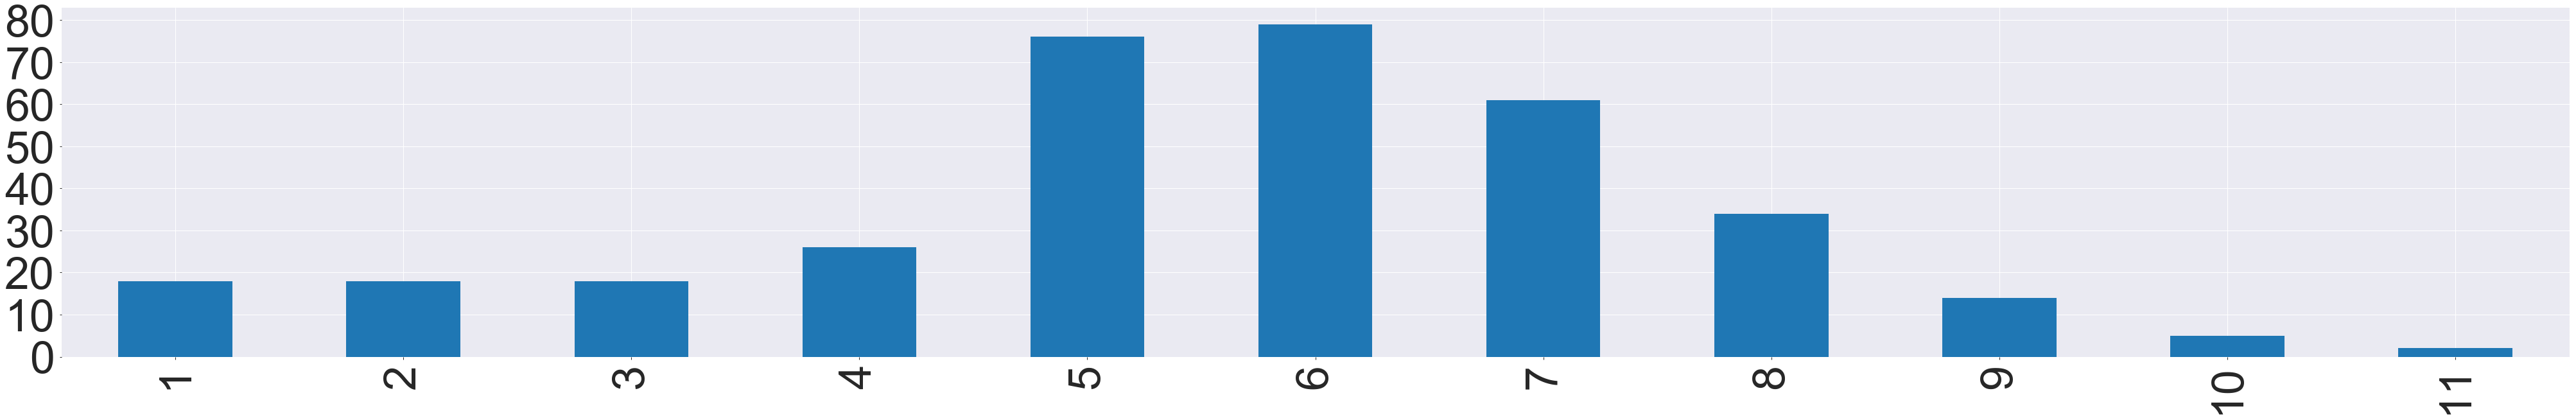

---- etp_count ---


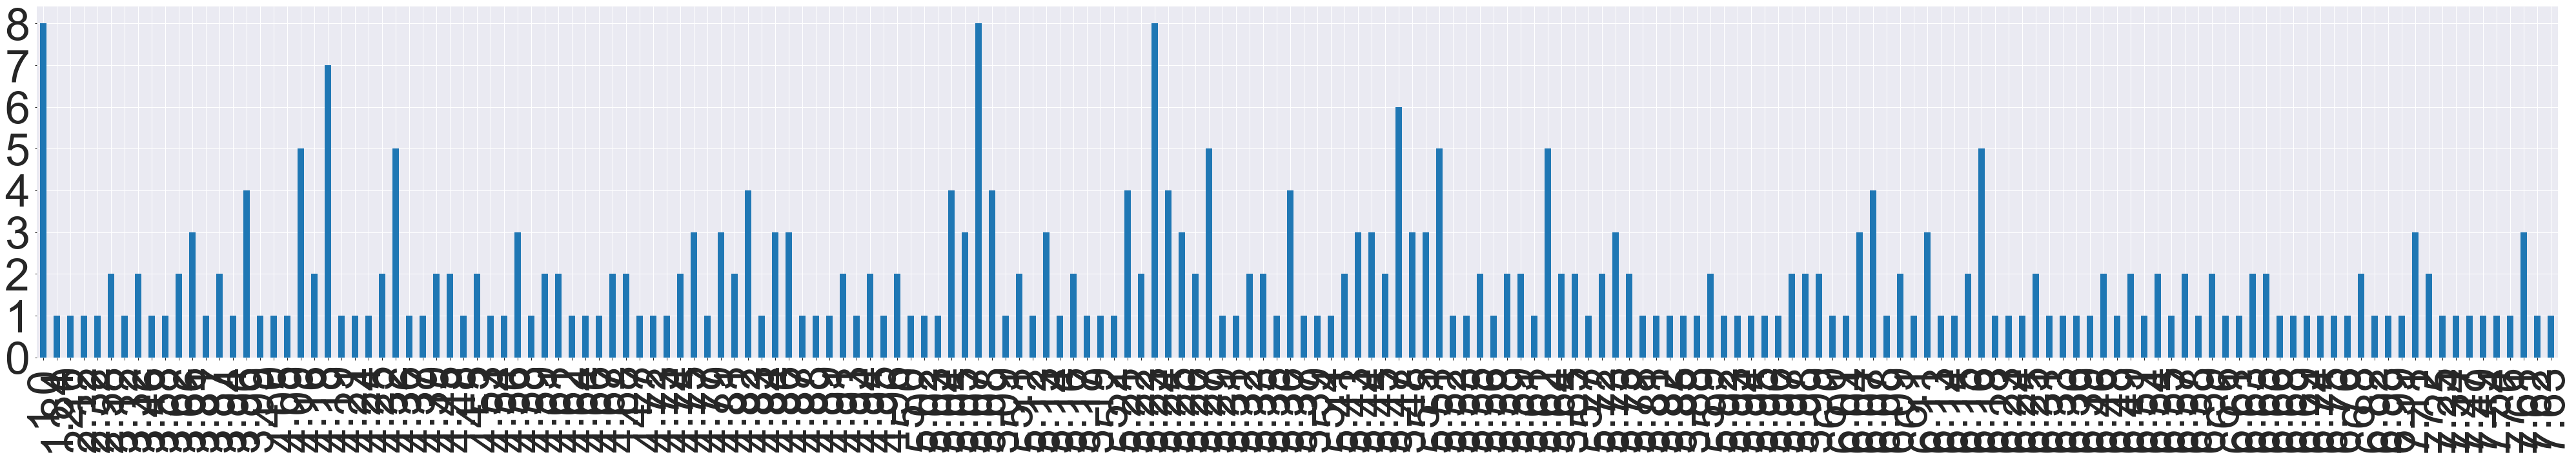

---- nco_count ---


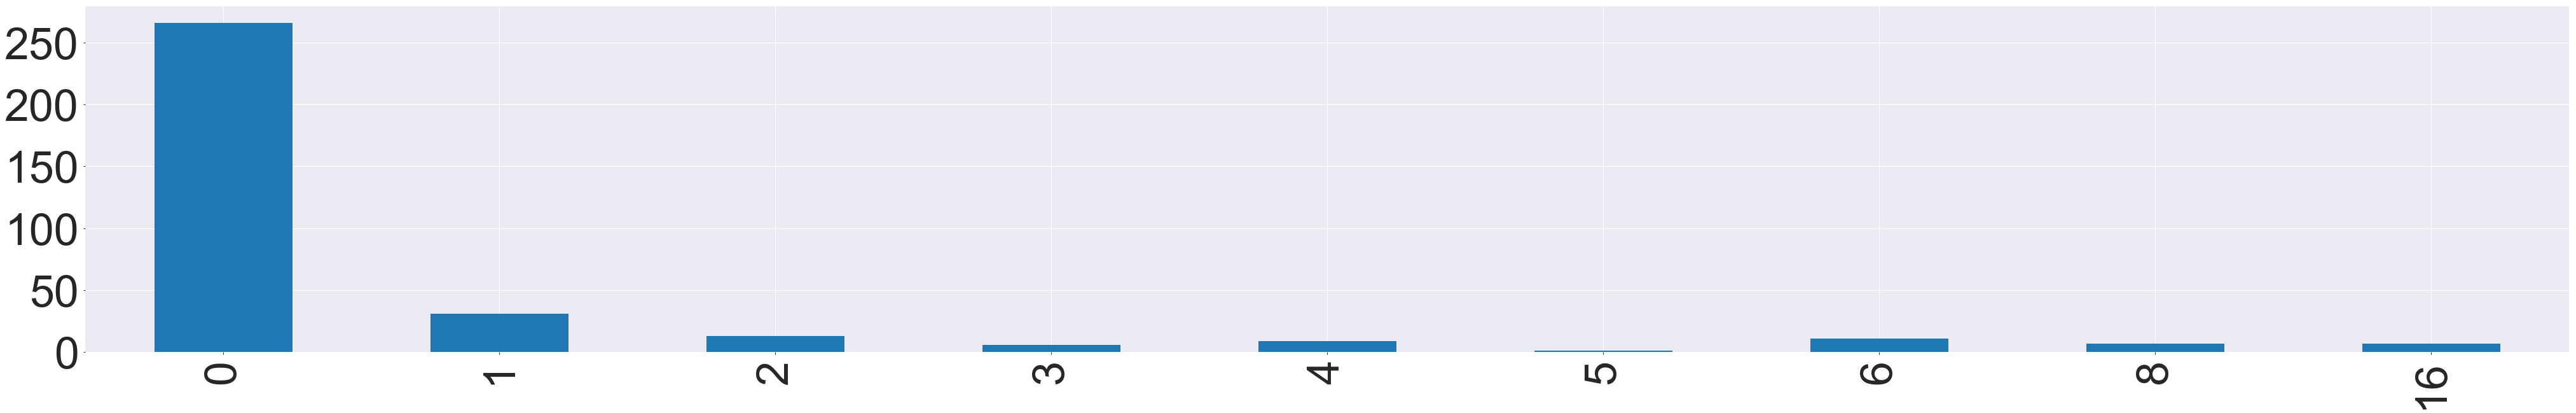

---- nkeys_count ---


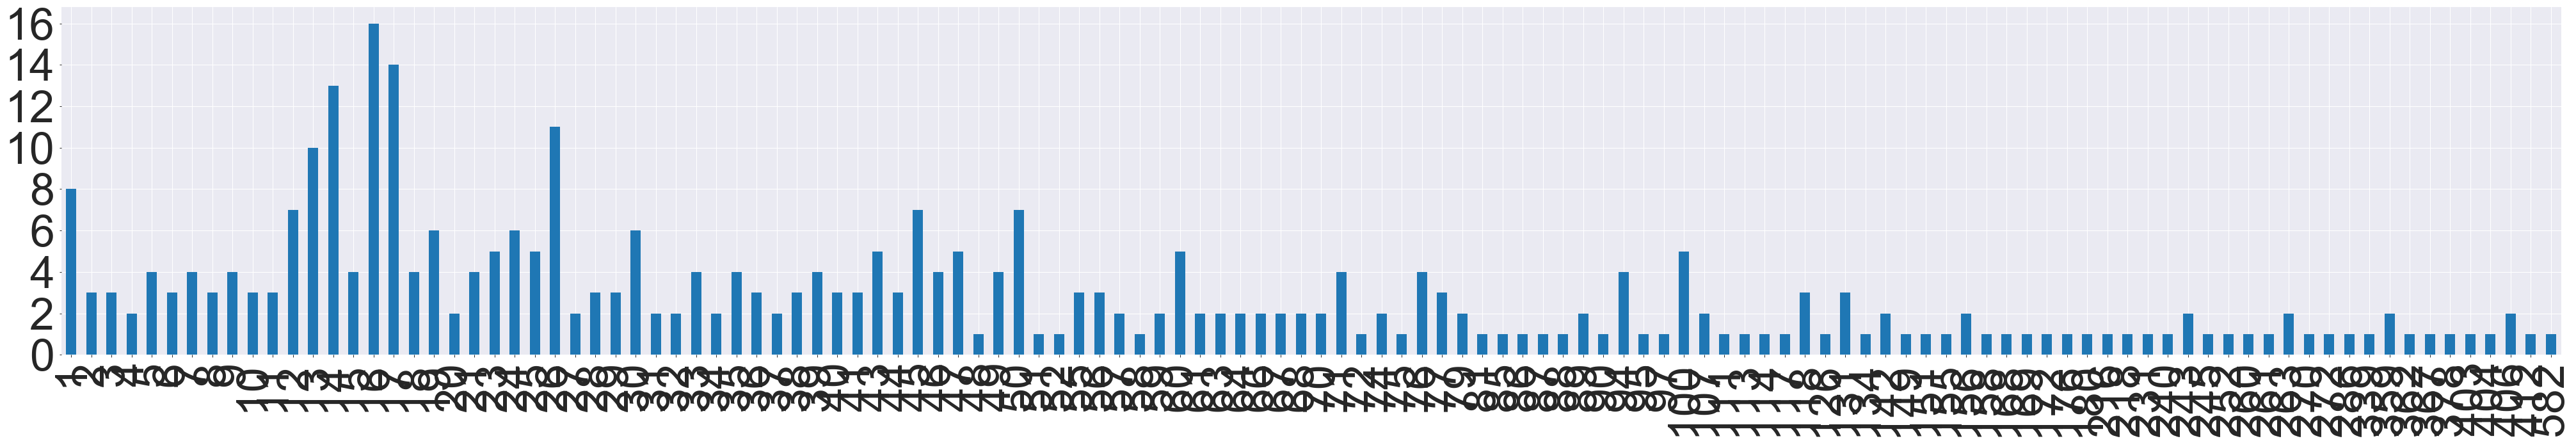

---- ntkn_count ---


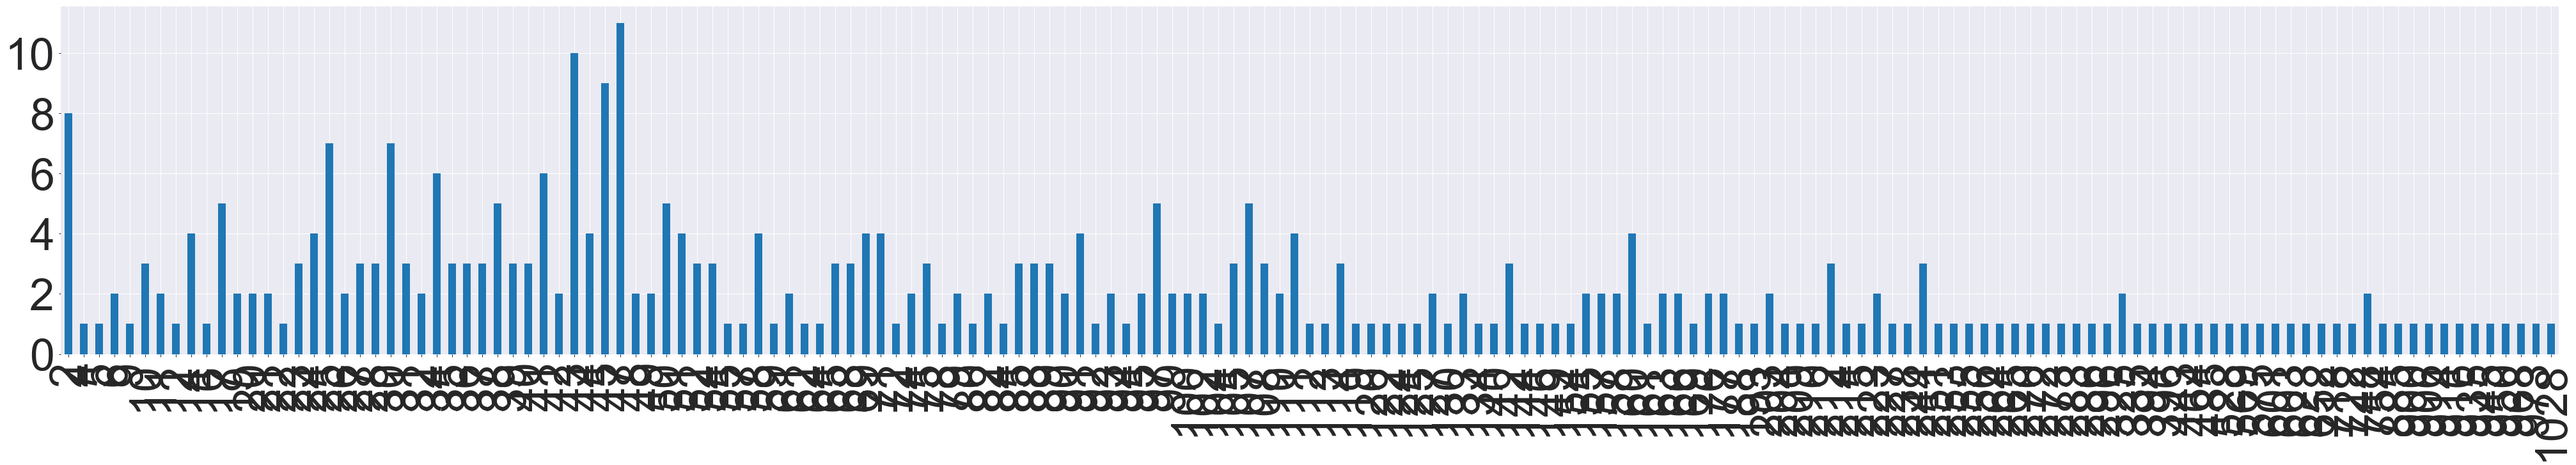

---- nscm_count ---


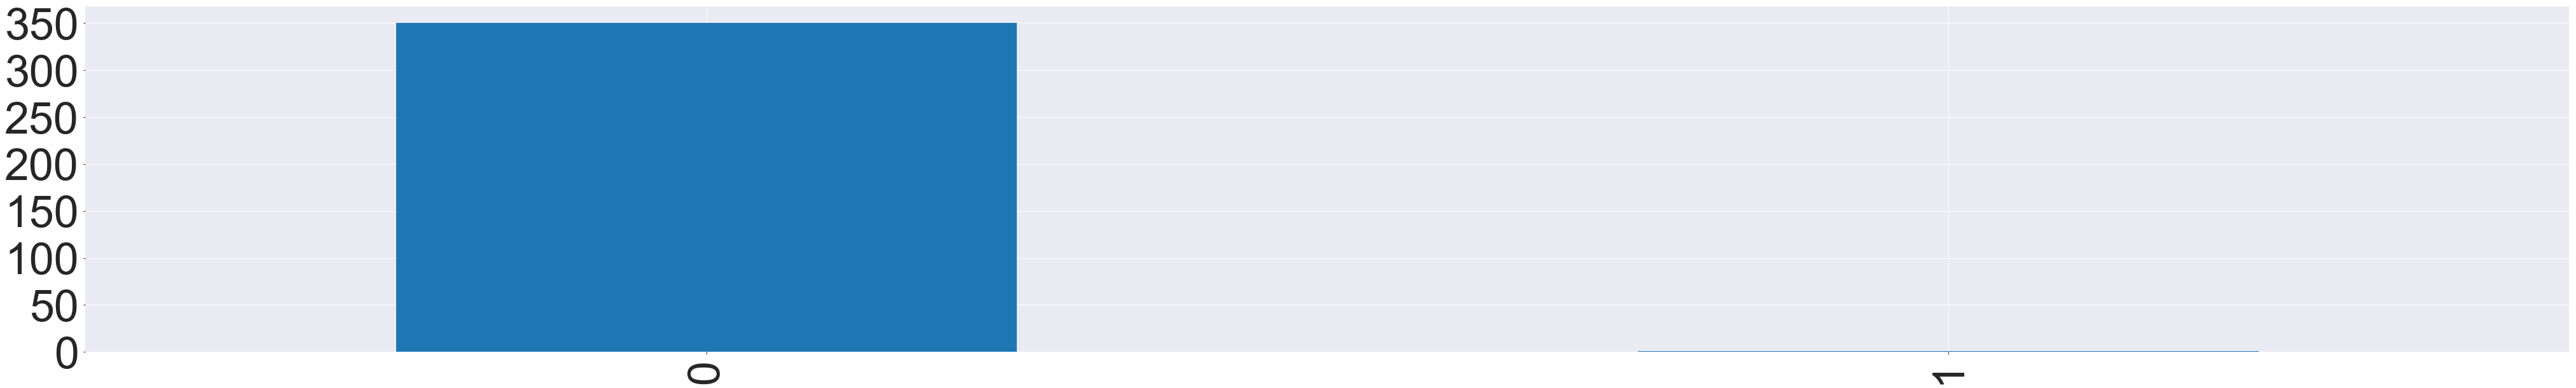

---- na_count ---


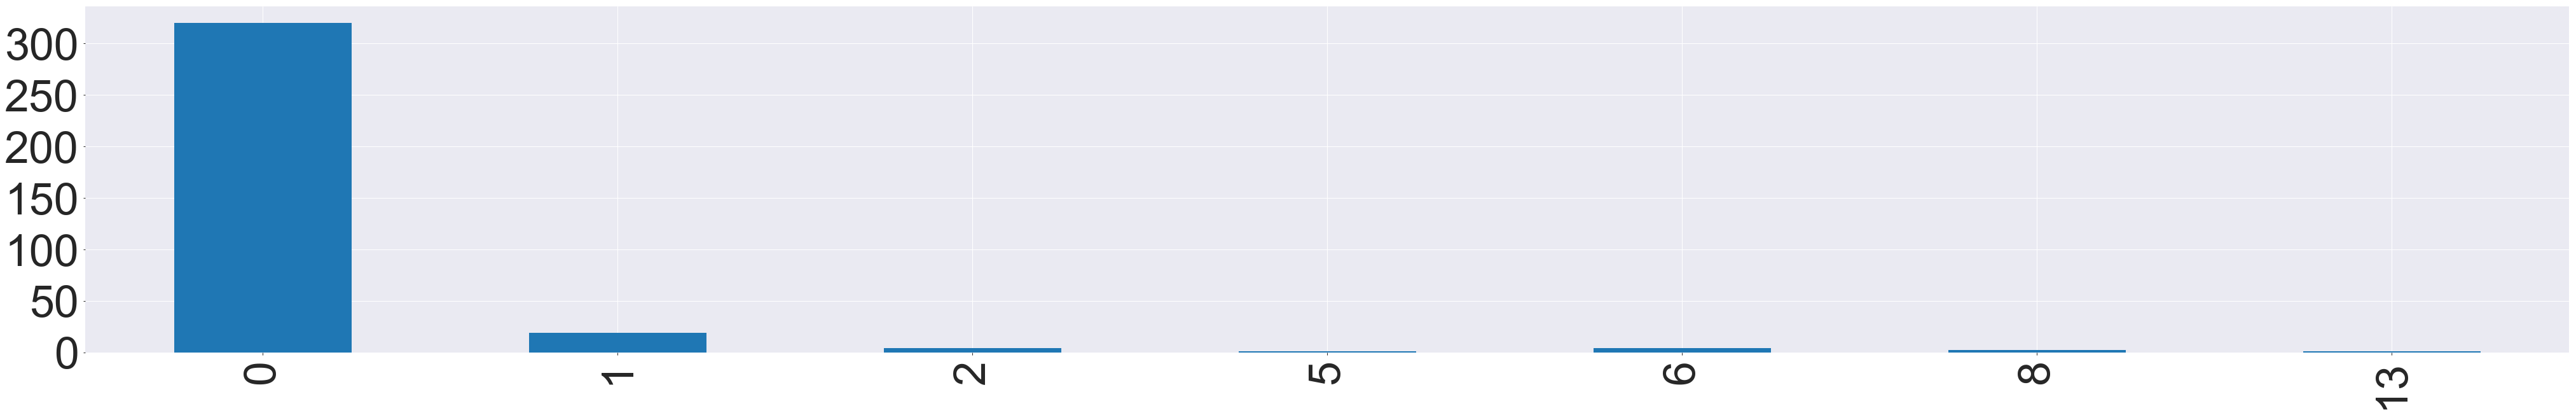

---- nc_count ---


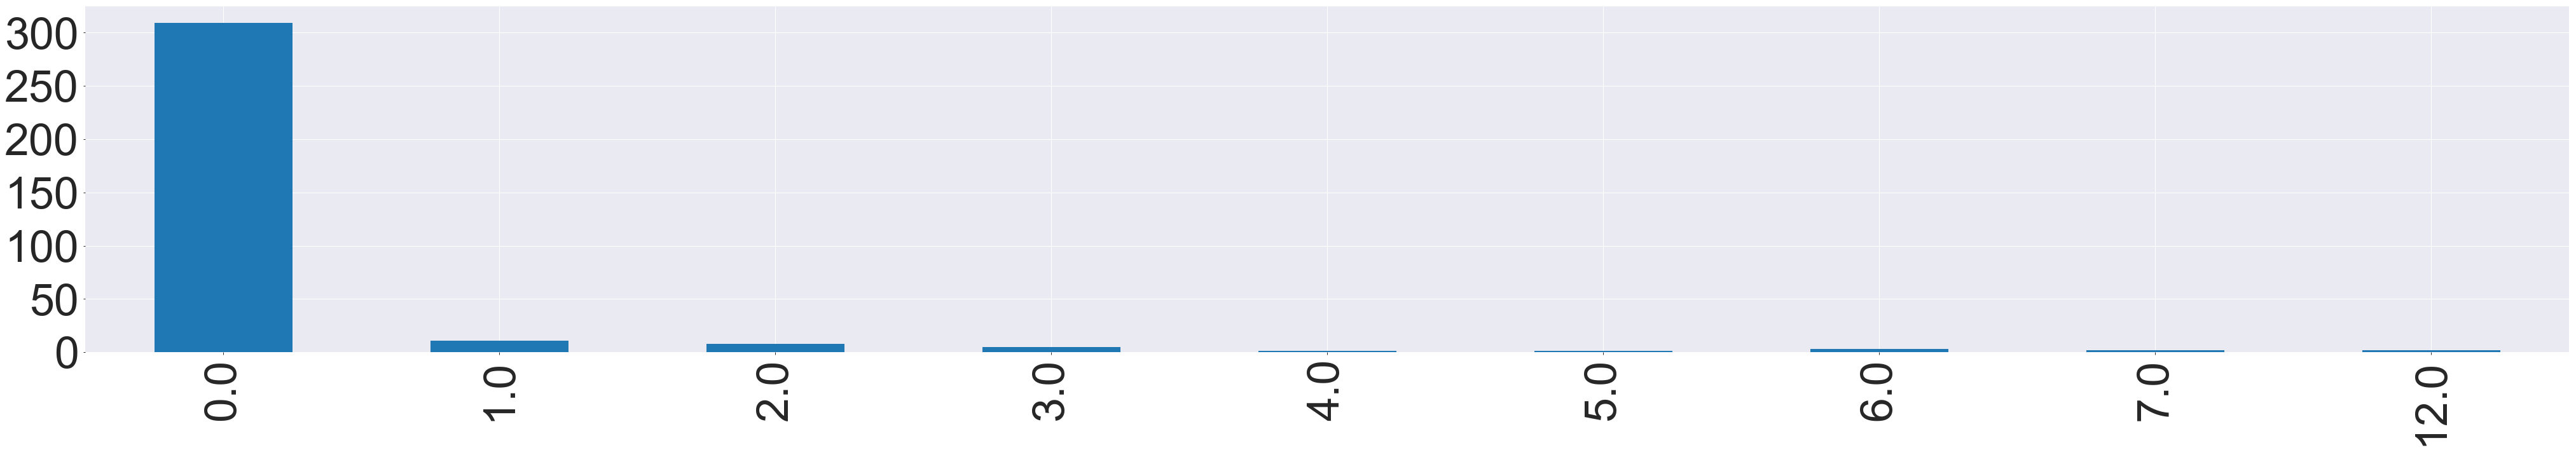

---- nc_min ---


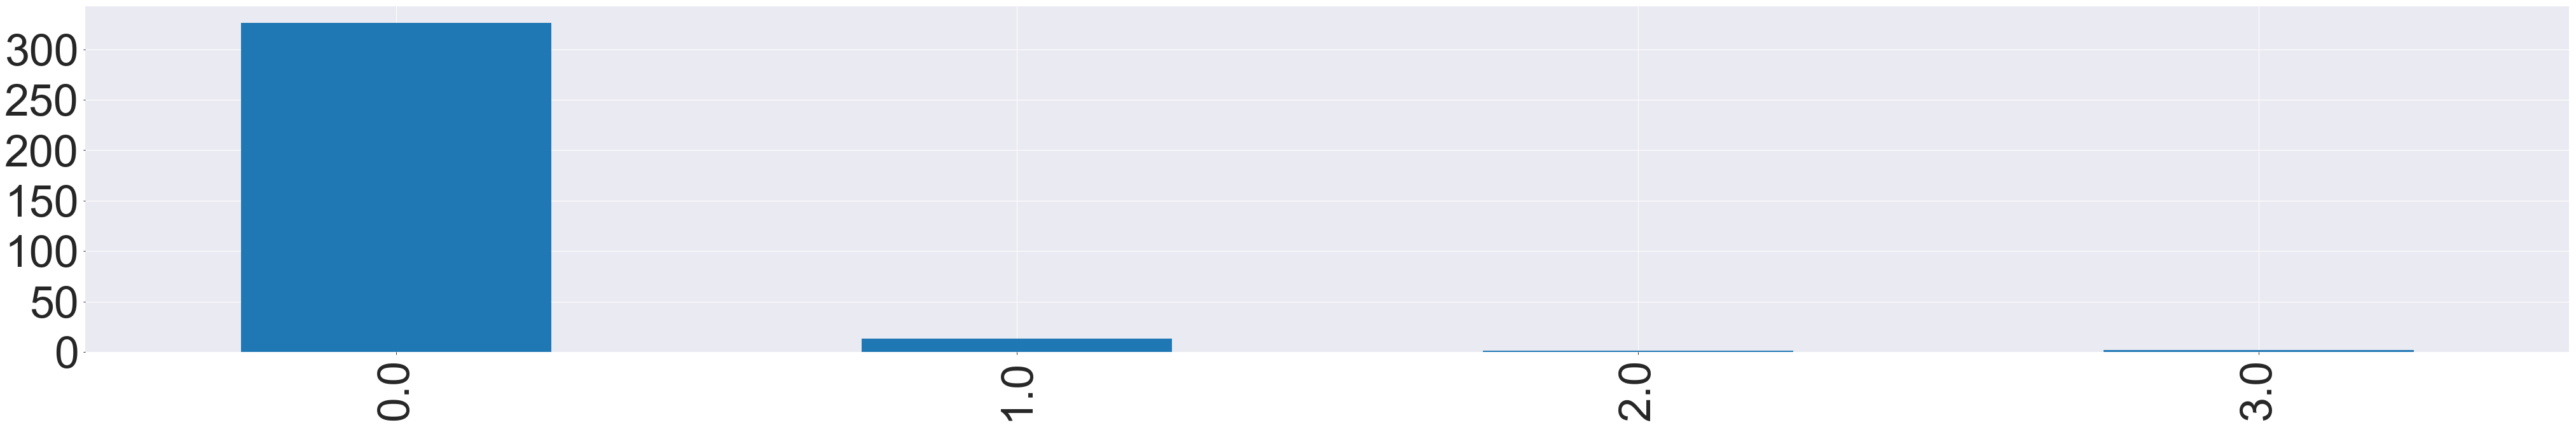

---- nc_max ---


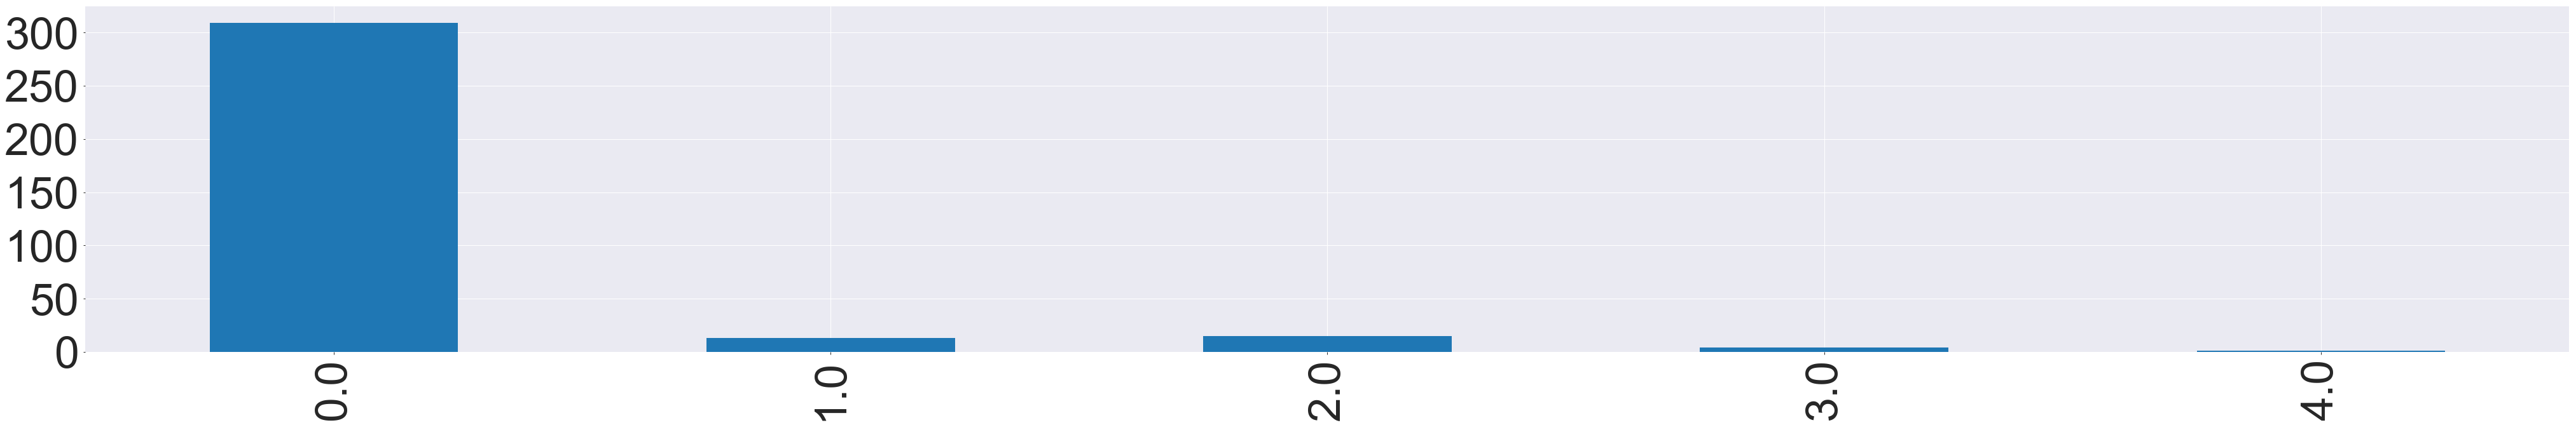

---- nc_median ---


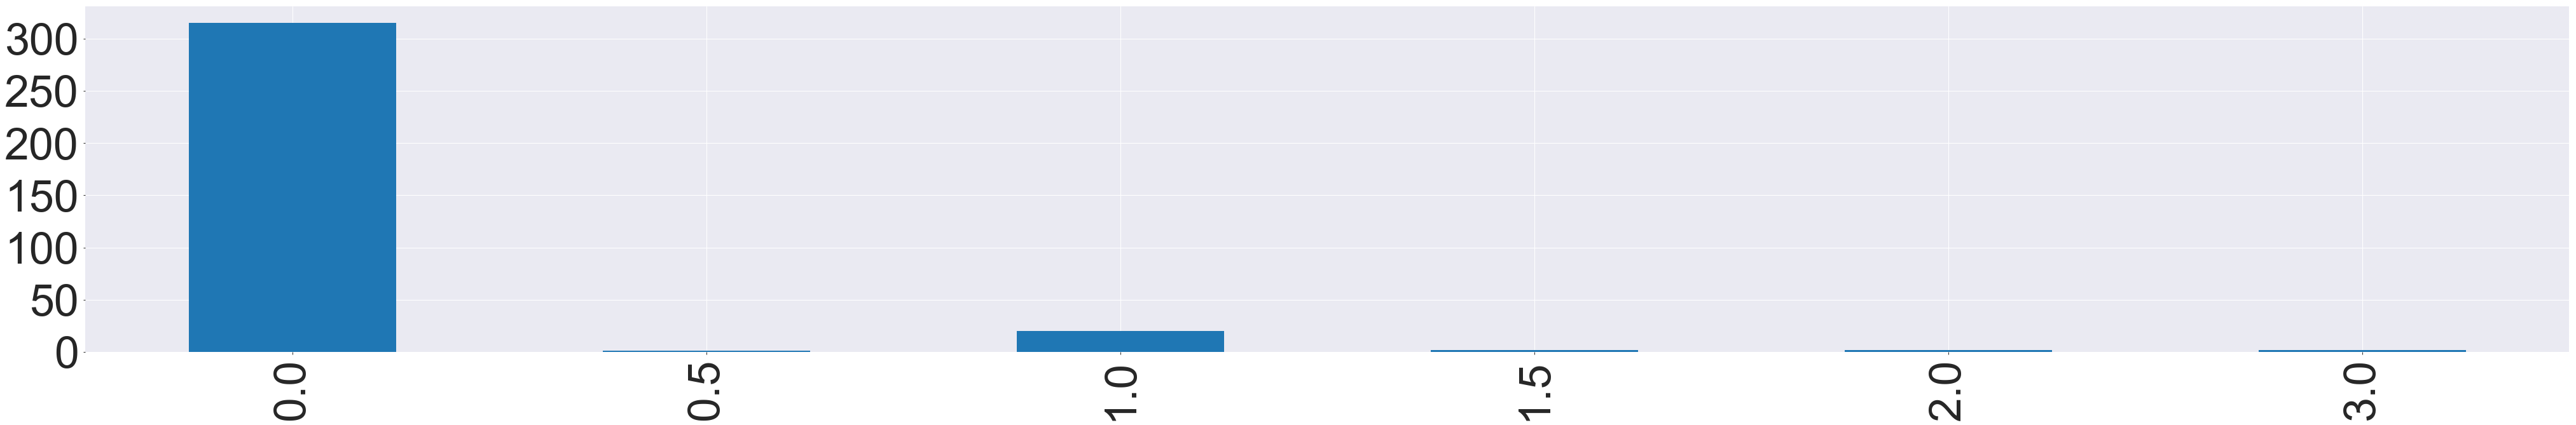

---- nc_mean ---


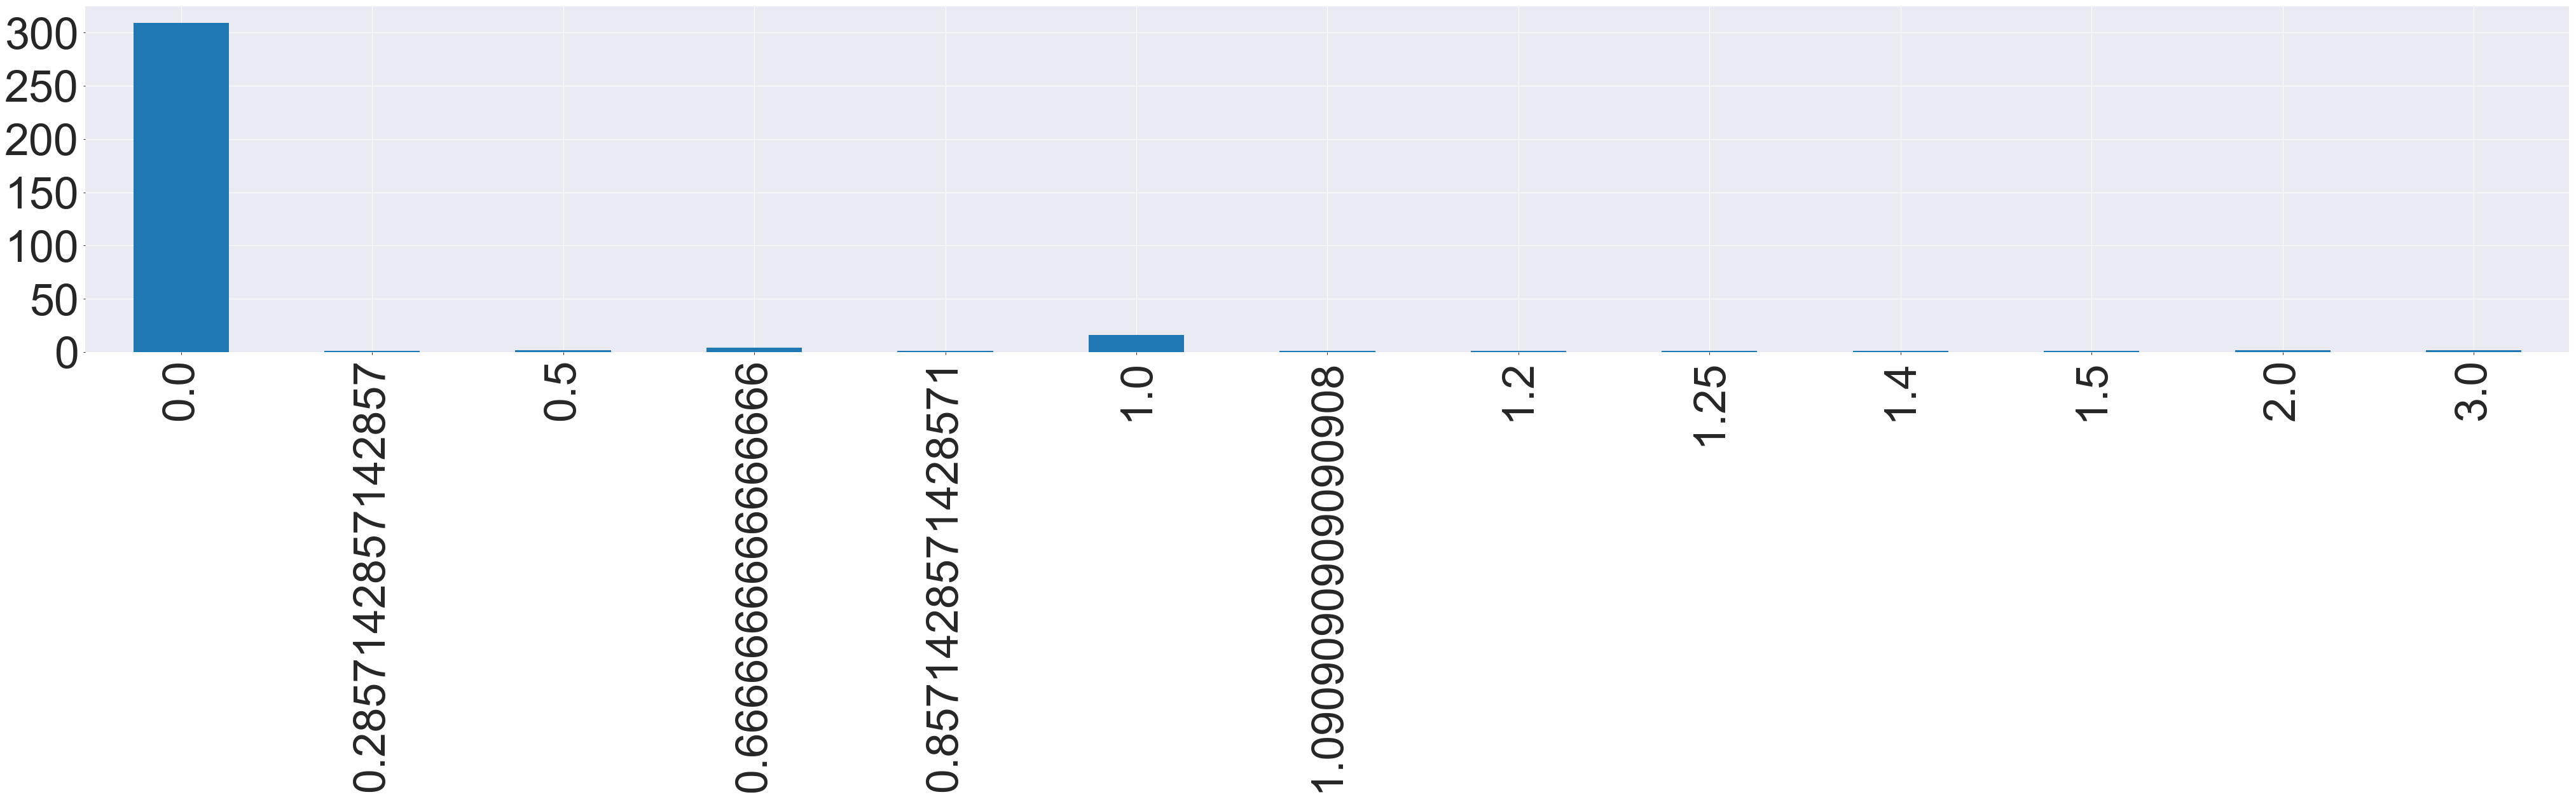

---- ni_count ---


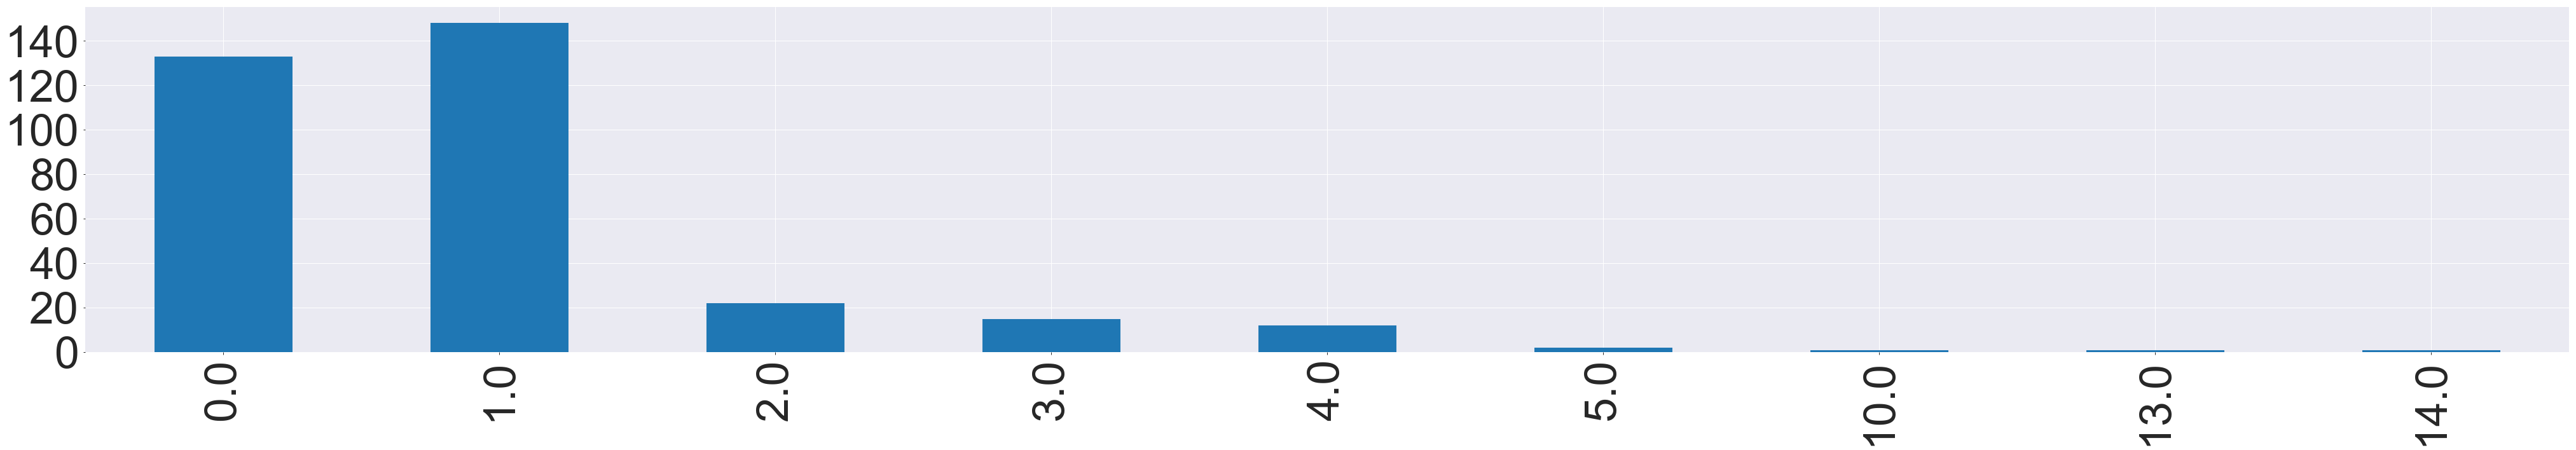

---- nif_count ---


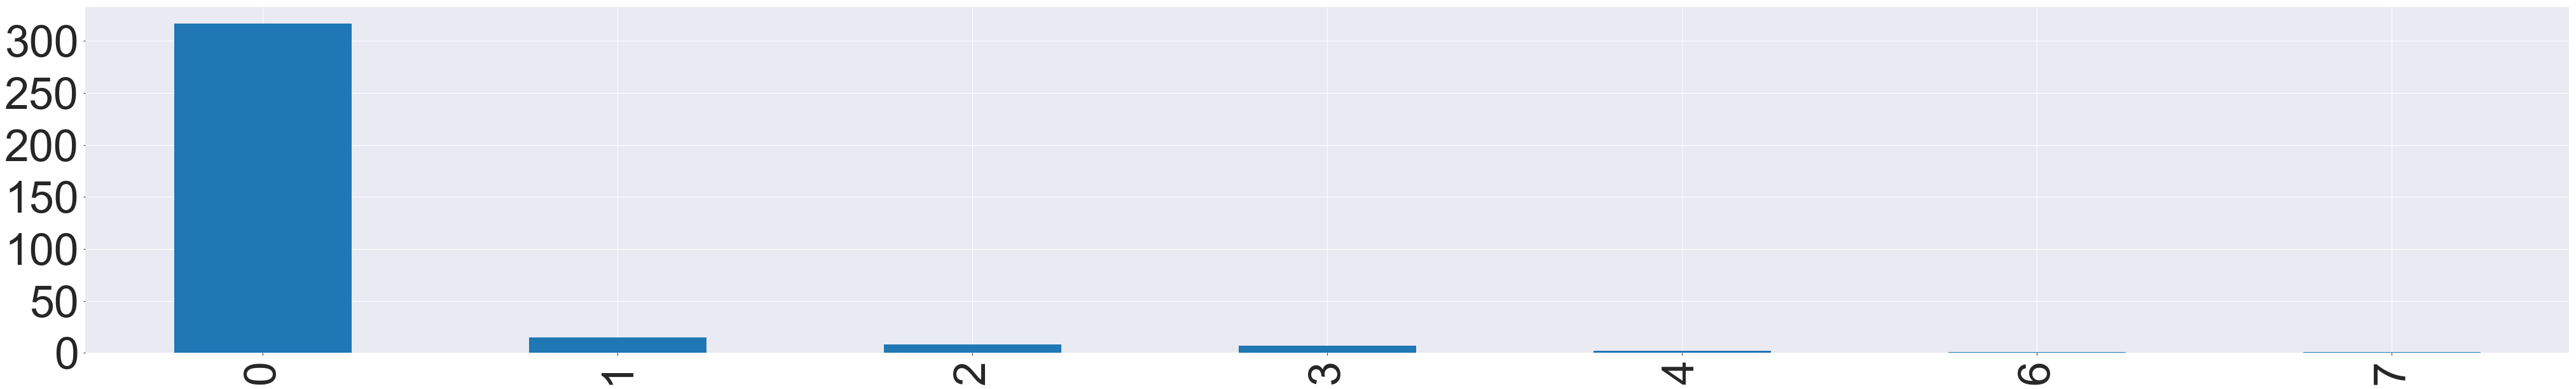

---- ninp_count ---


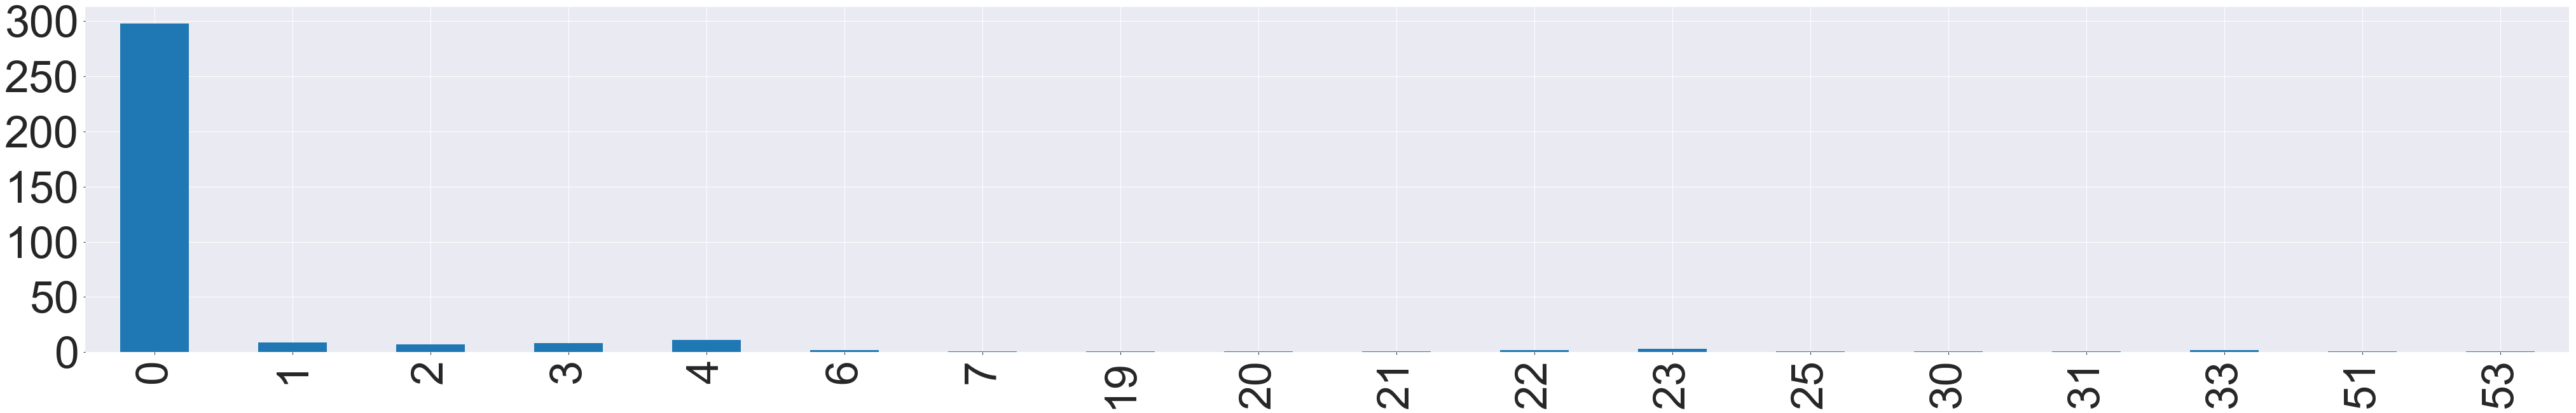

---- ninpc_count ---


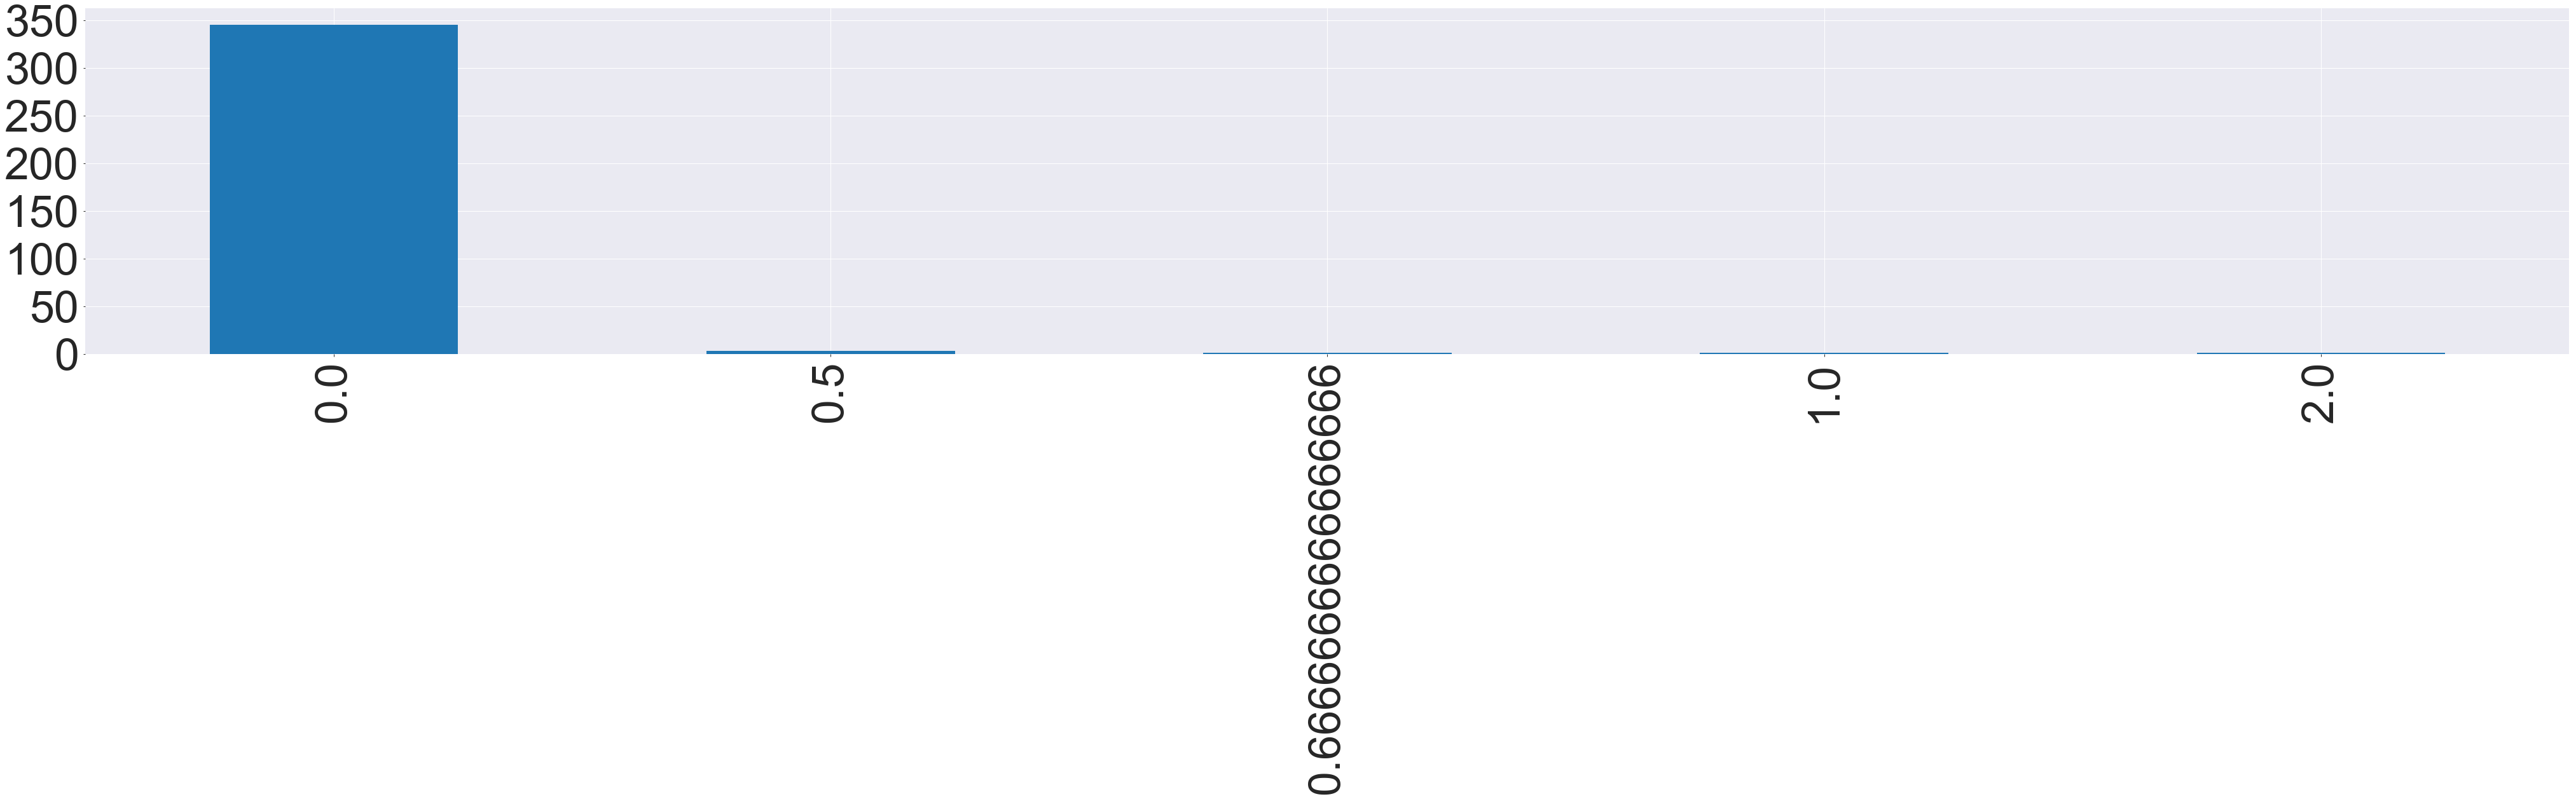

---- nn_count ---


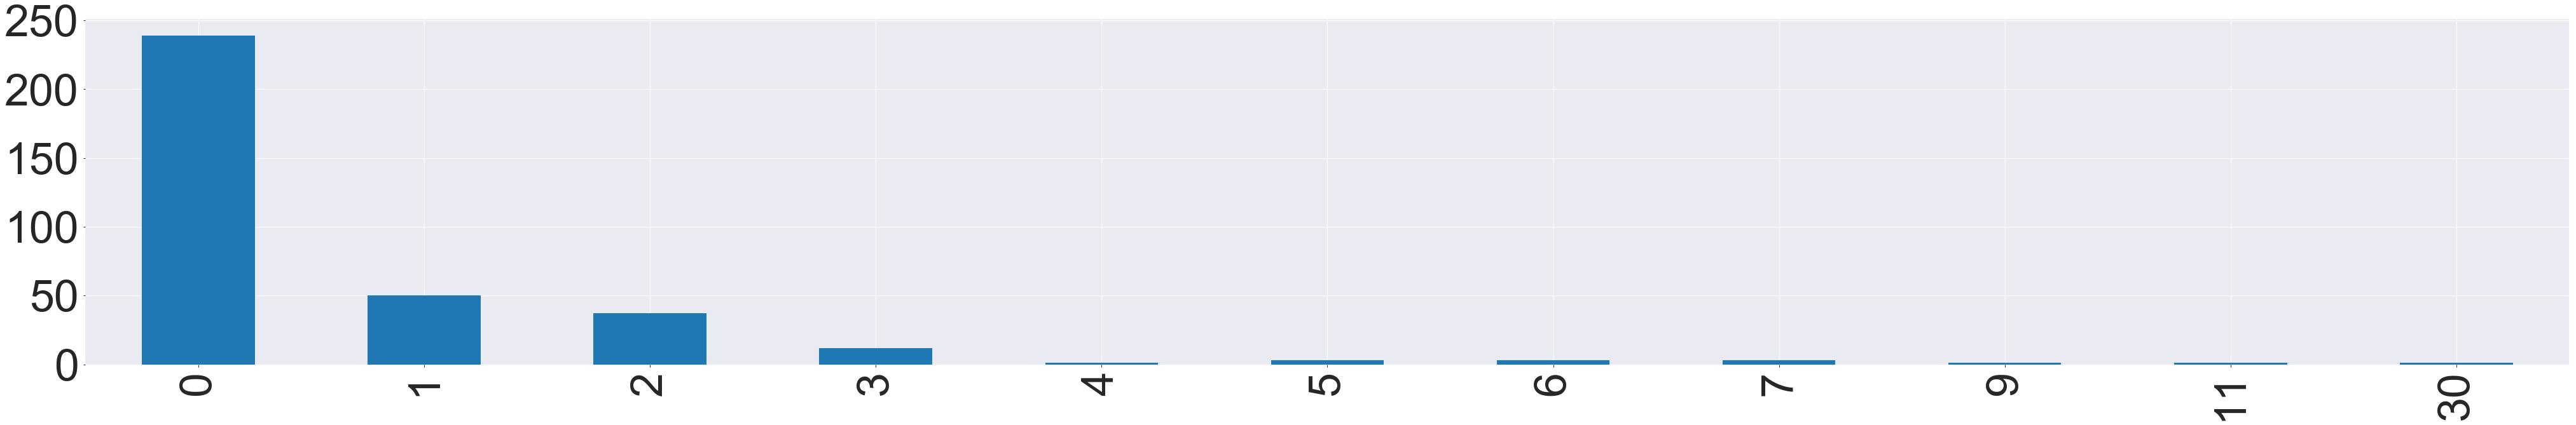

---- nnt_count ---


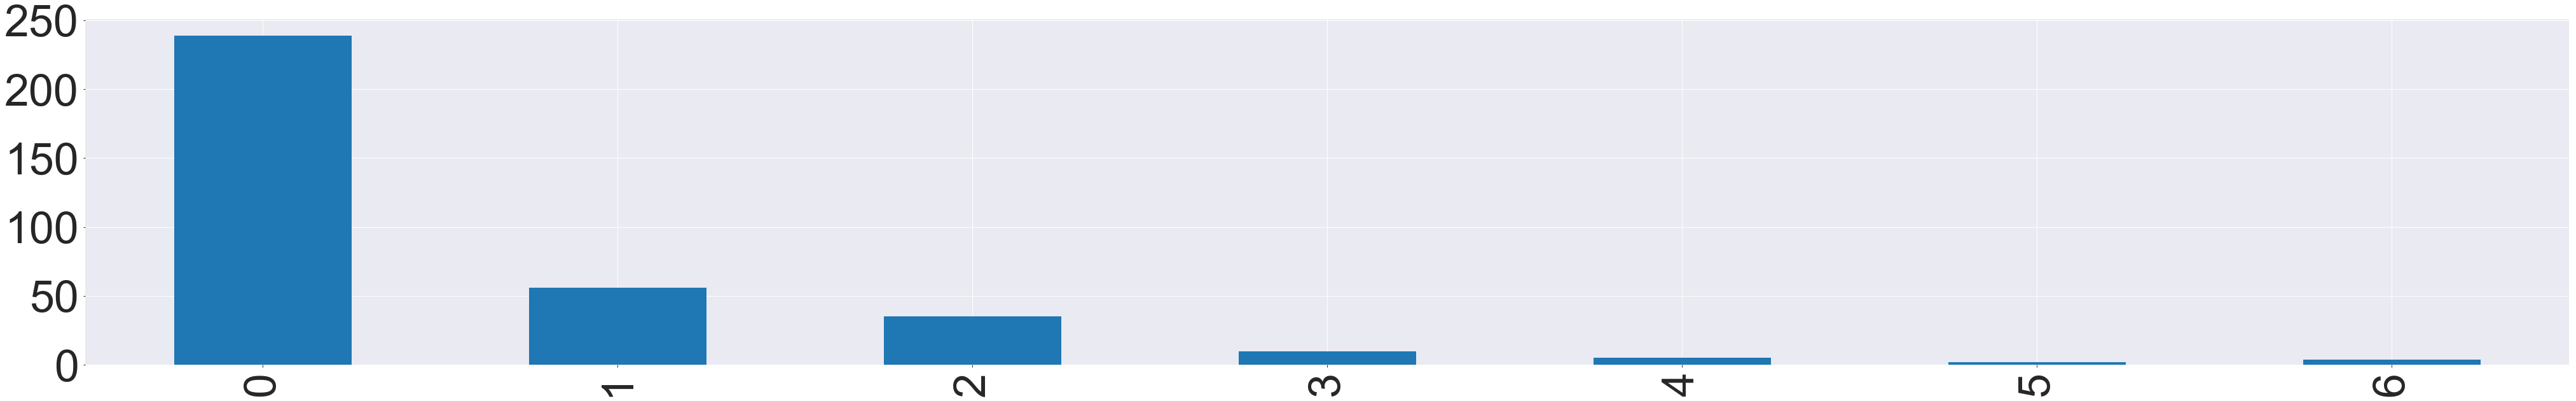

---- nout_count ---


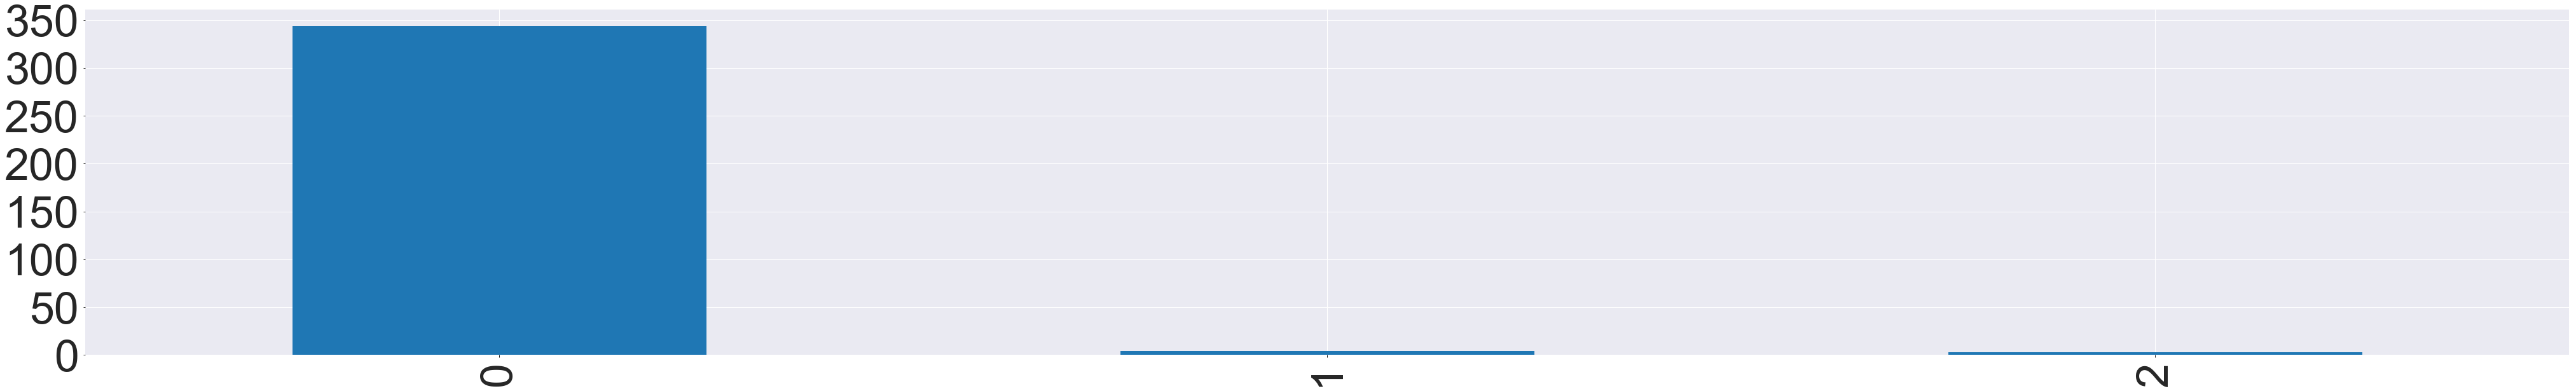

---- np_count ---


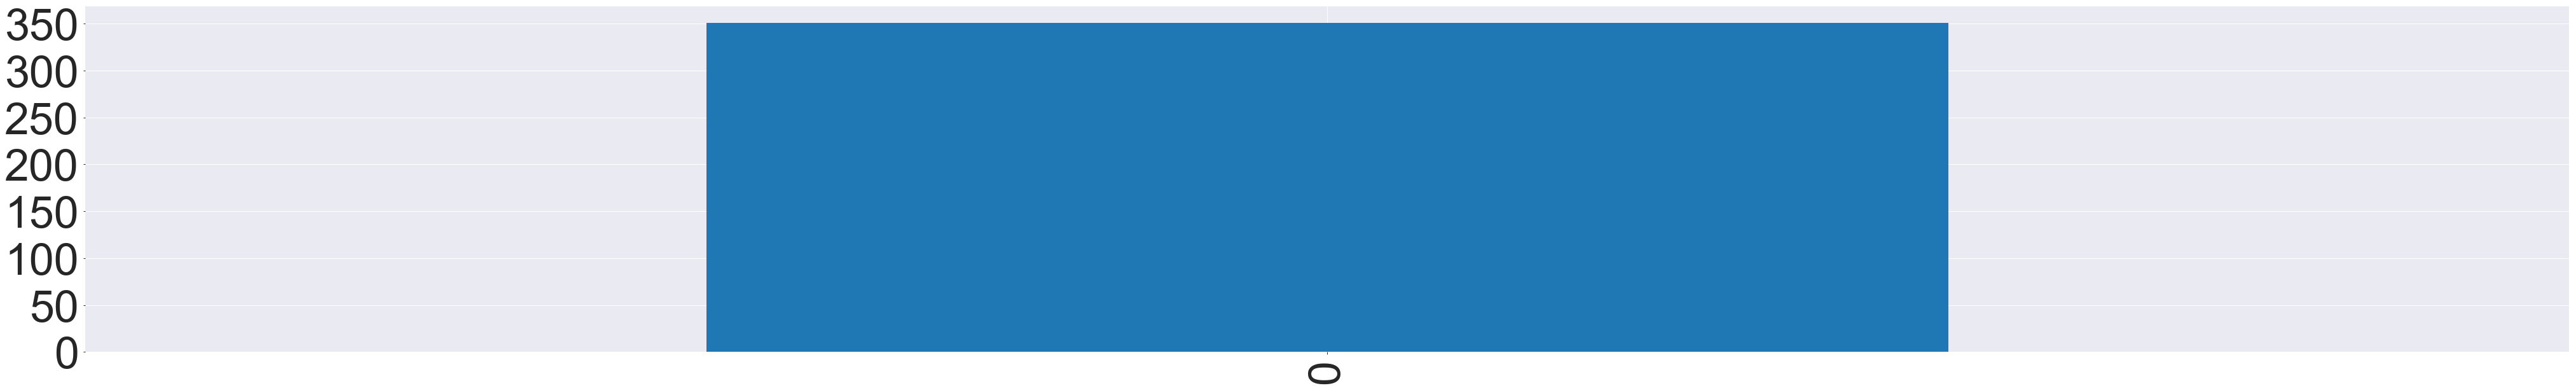

---- np_min ---


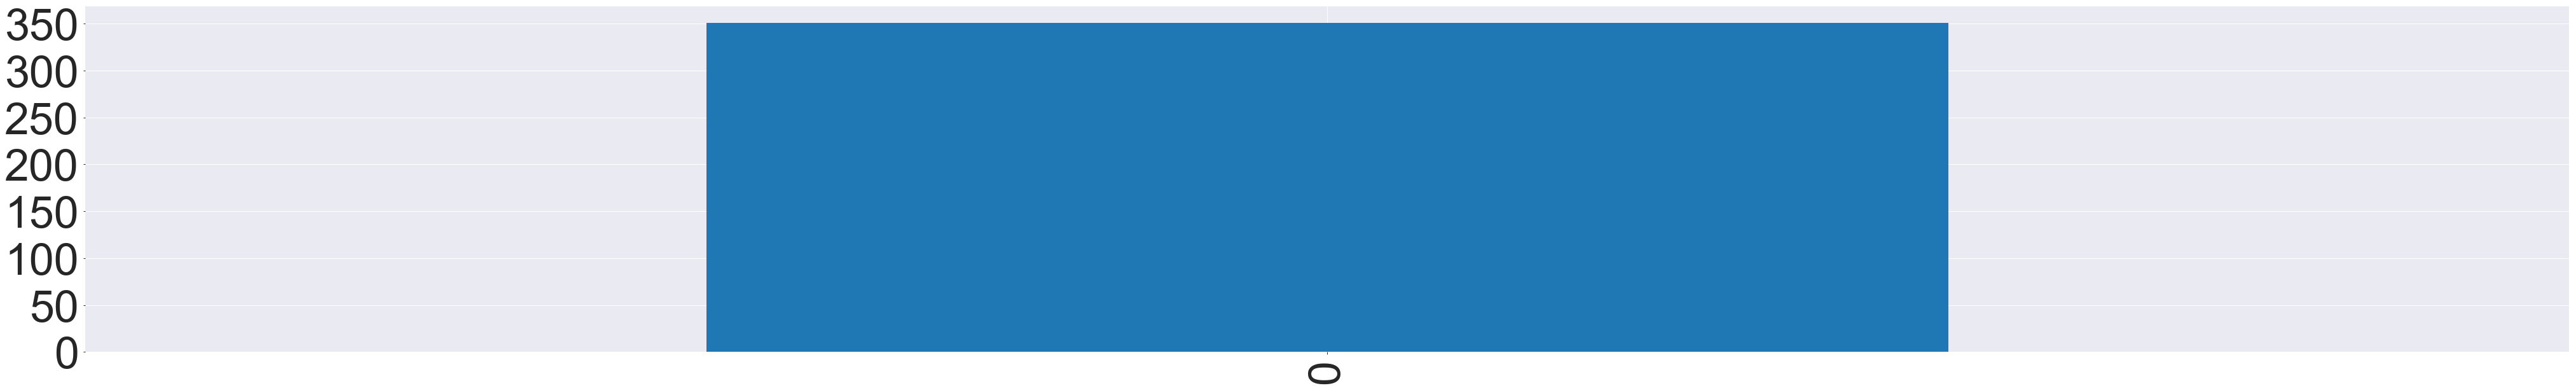

---- np_max ---


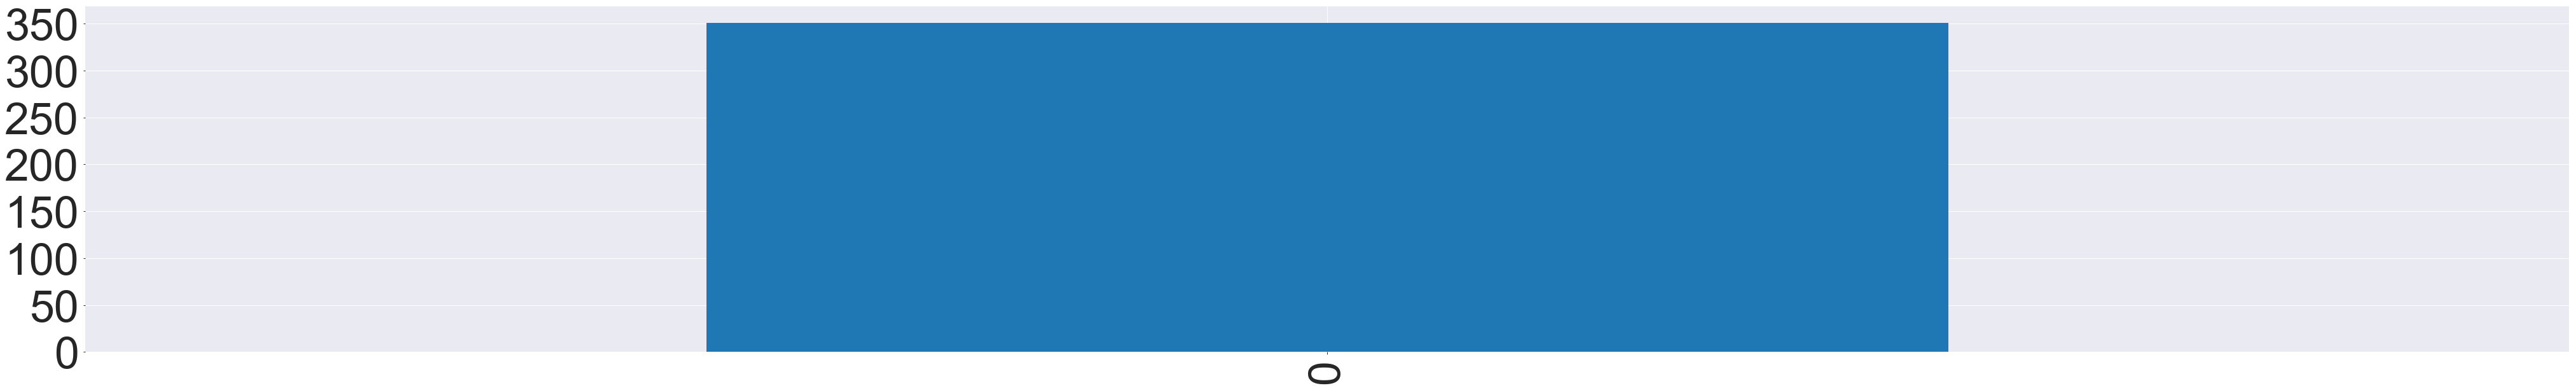

---- np_median ---


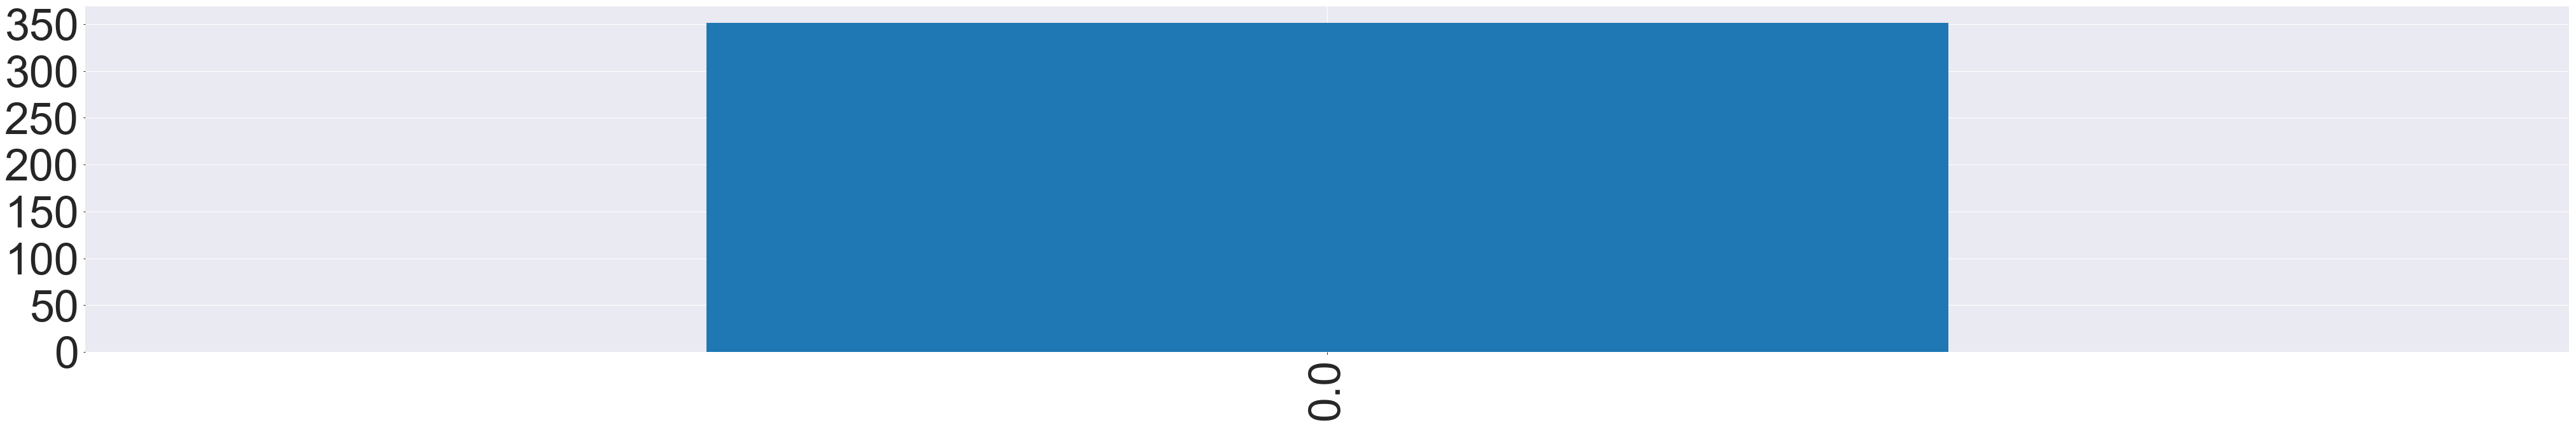

---- np_mean ---


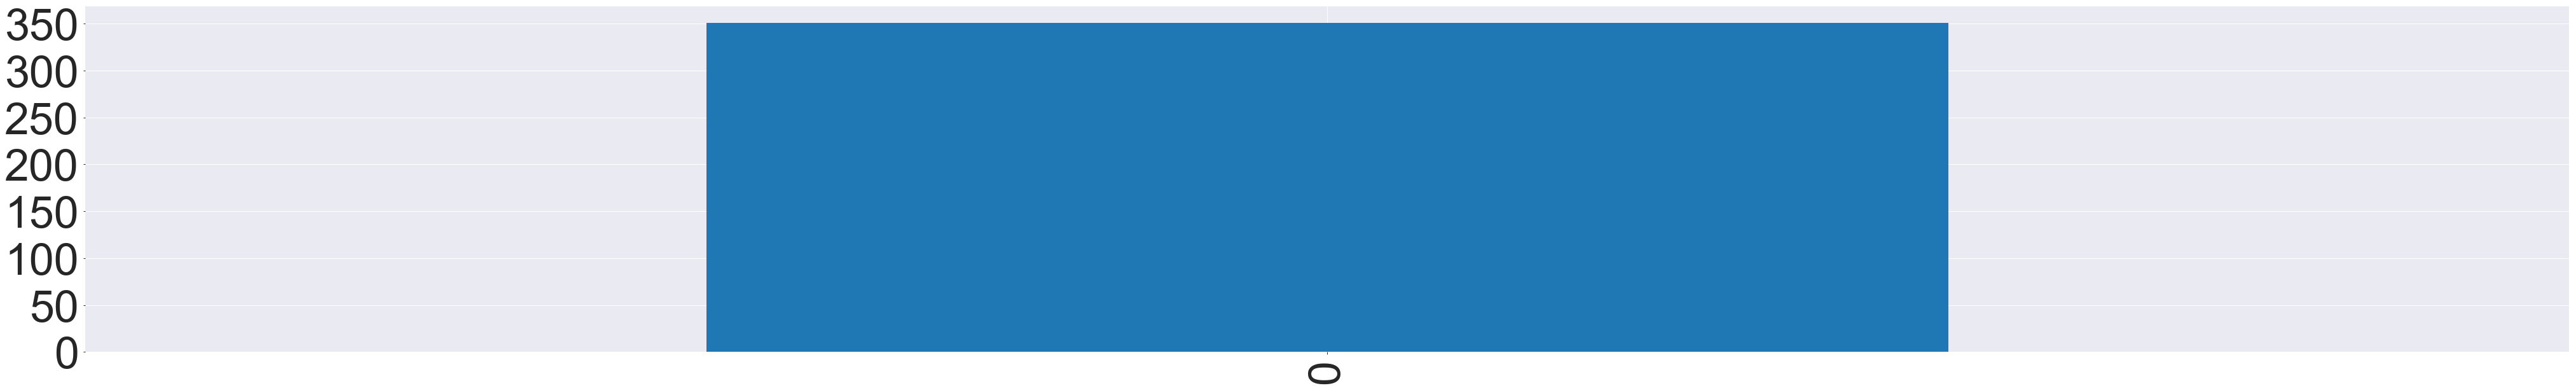

---- nr_count ---


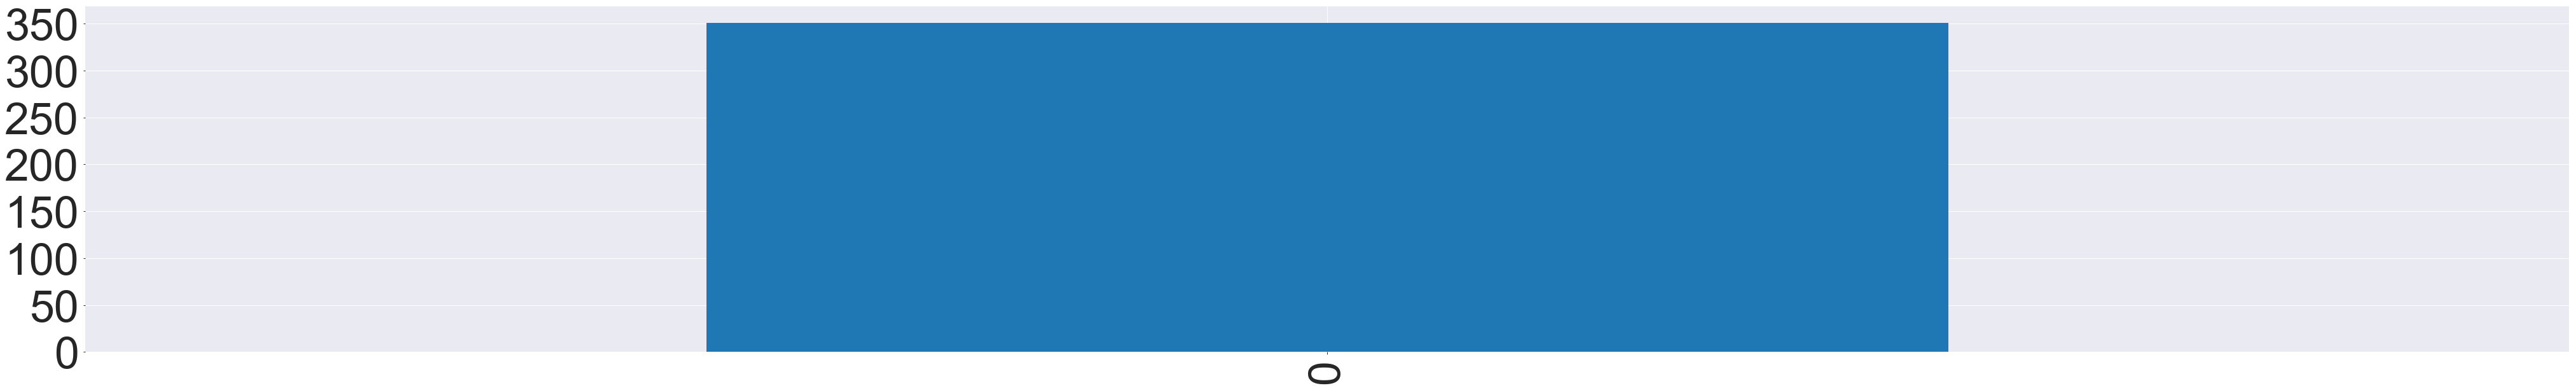

---- nrt_count ---


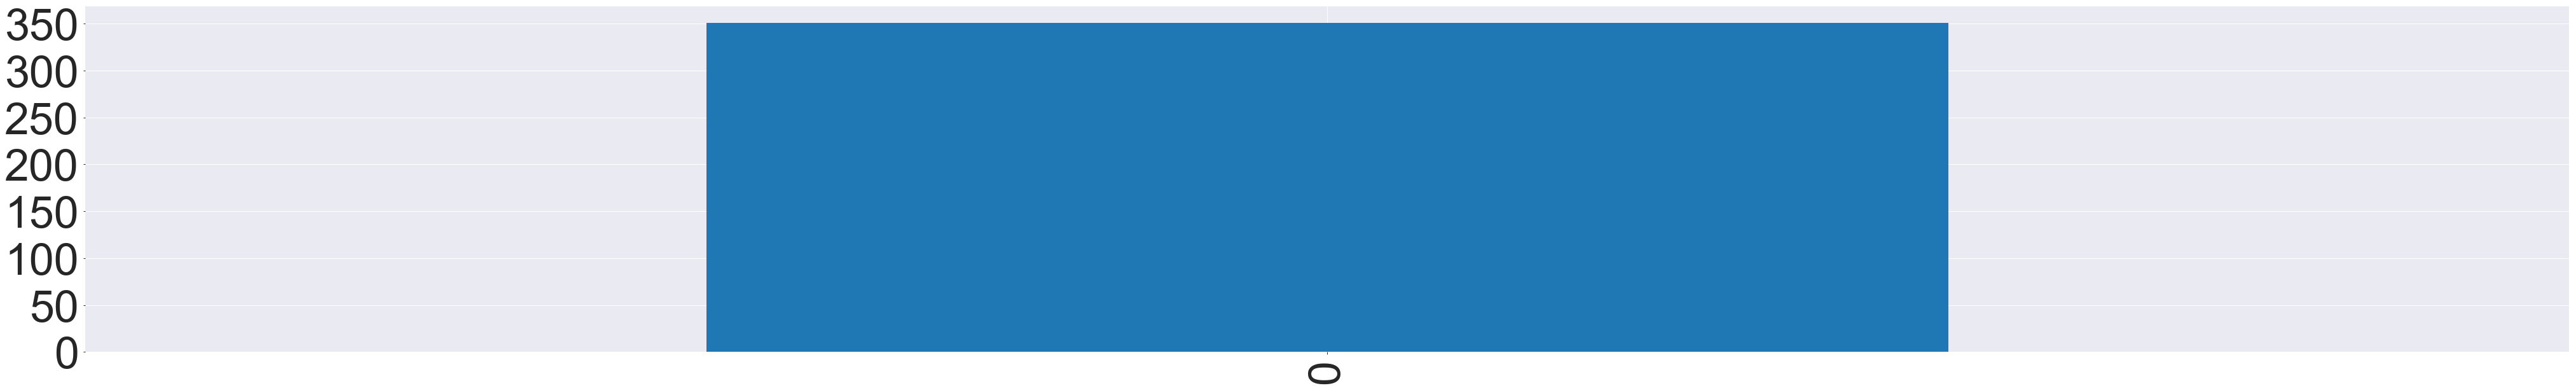

---- ttb_check ---


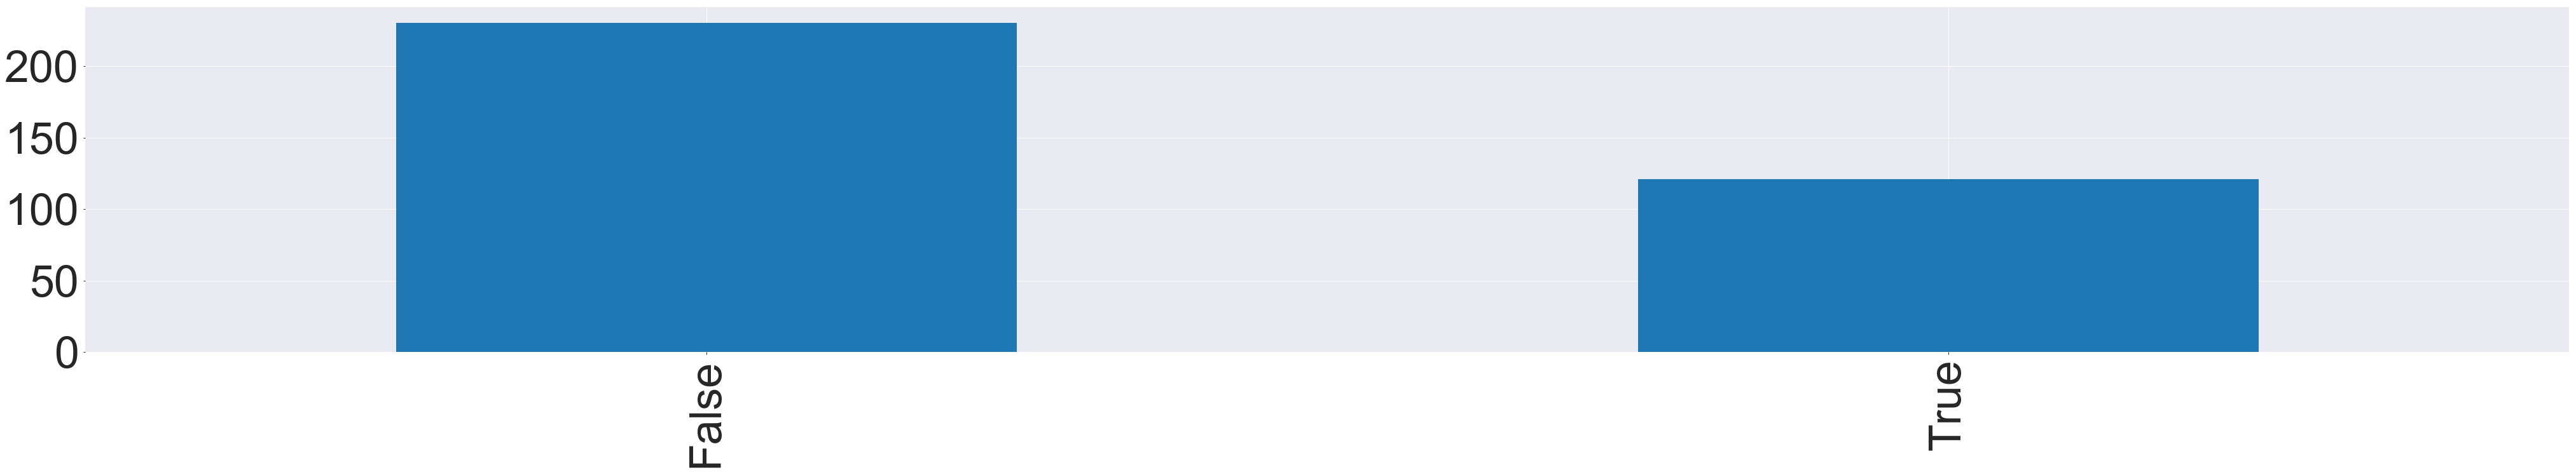

---- cdnt_count ---


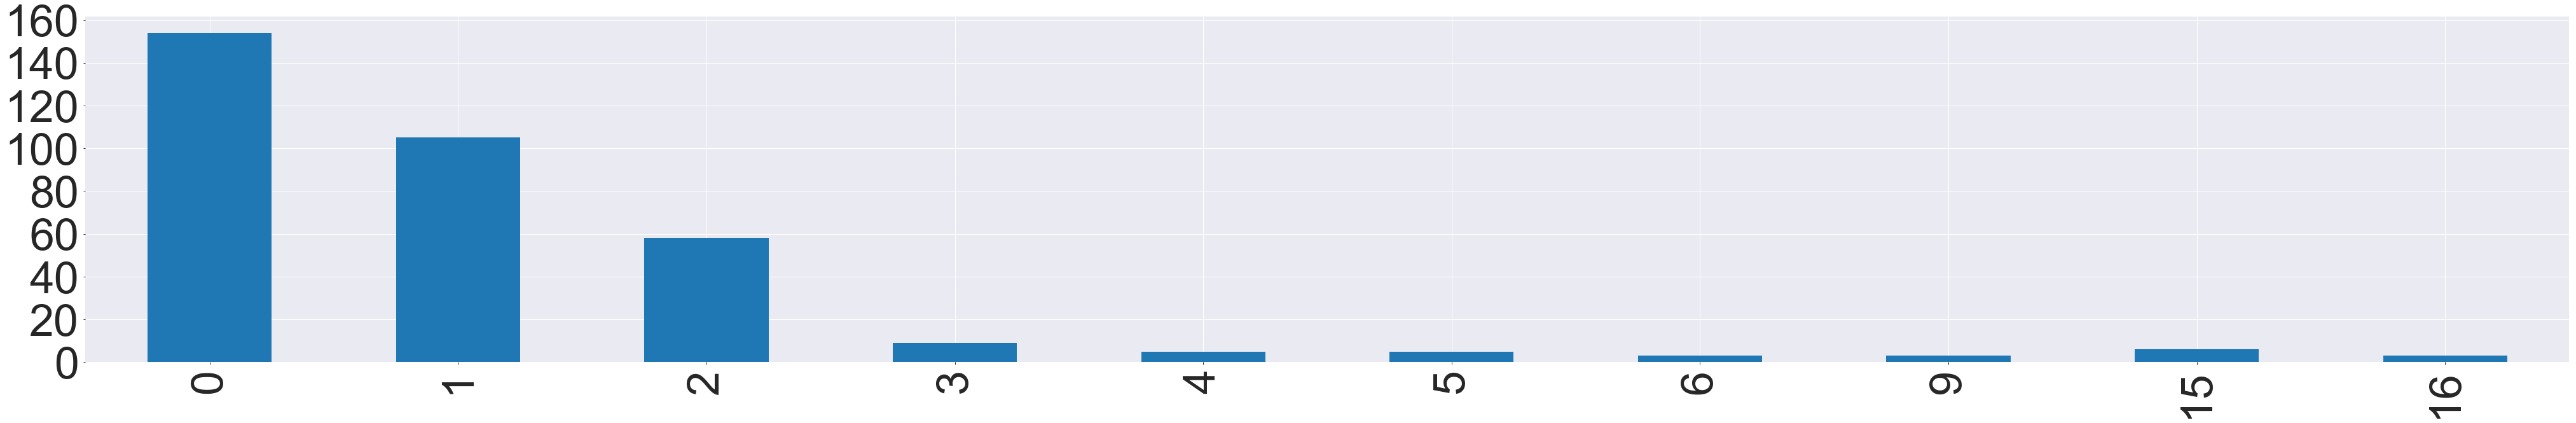

---- cdrt_count ---


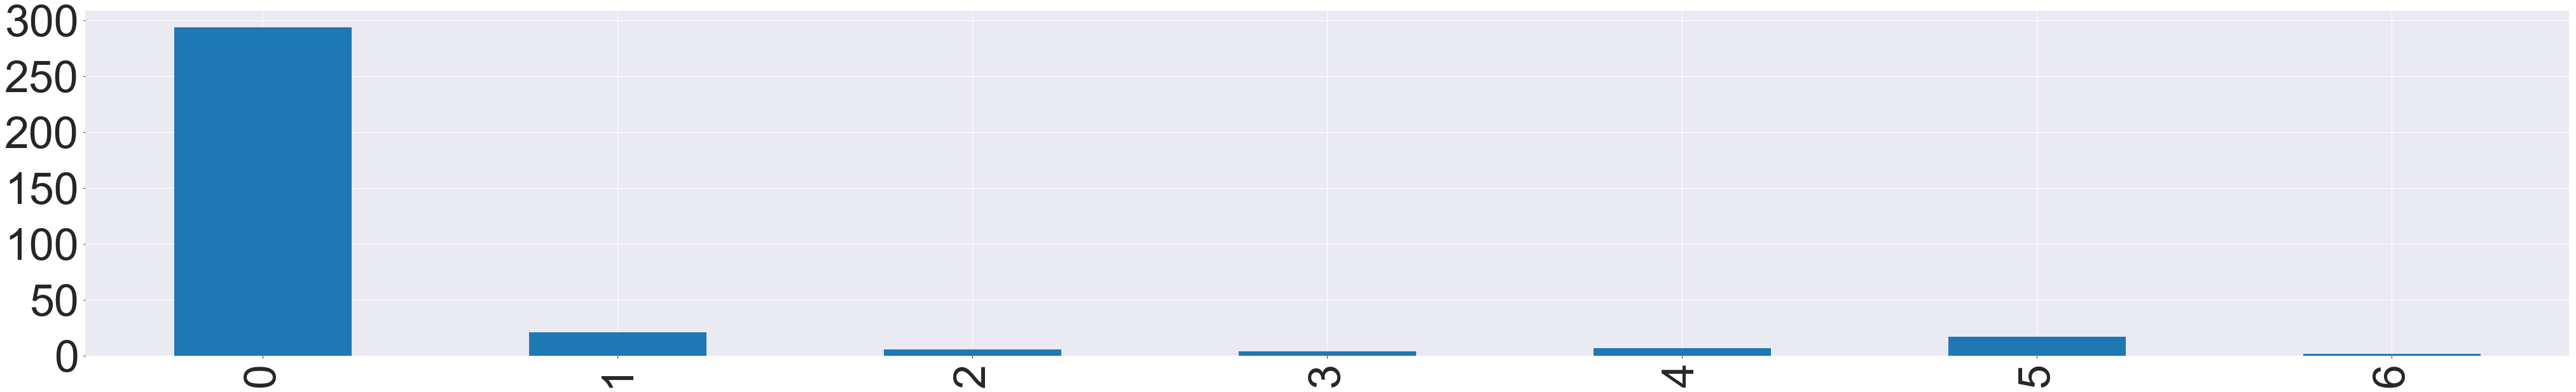

---- cdat_count ---


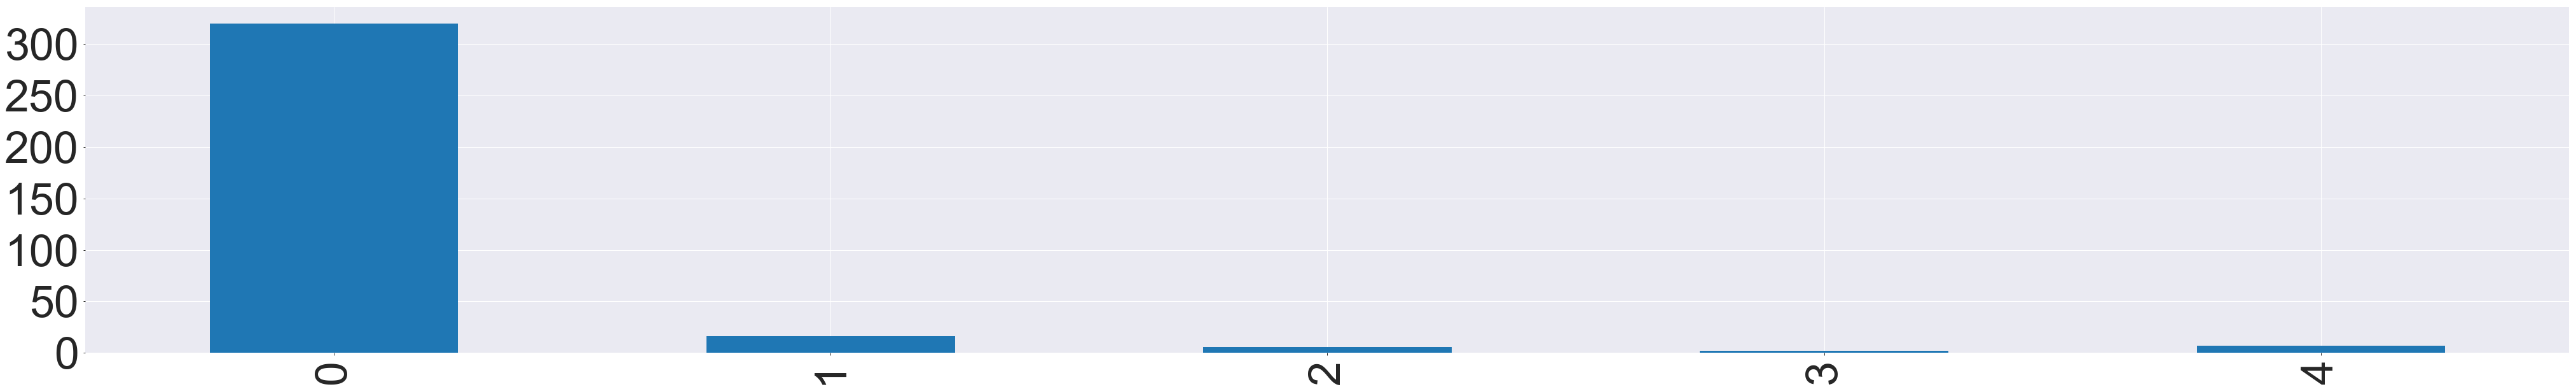

---- cdct_count ---


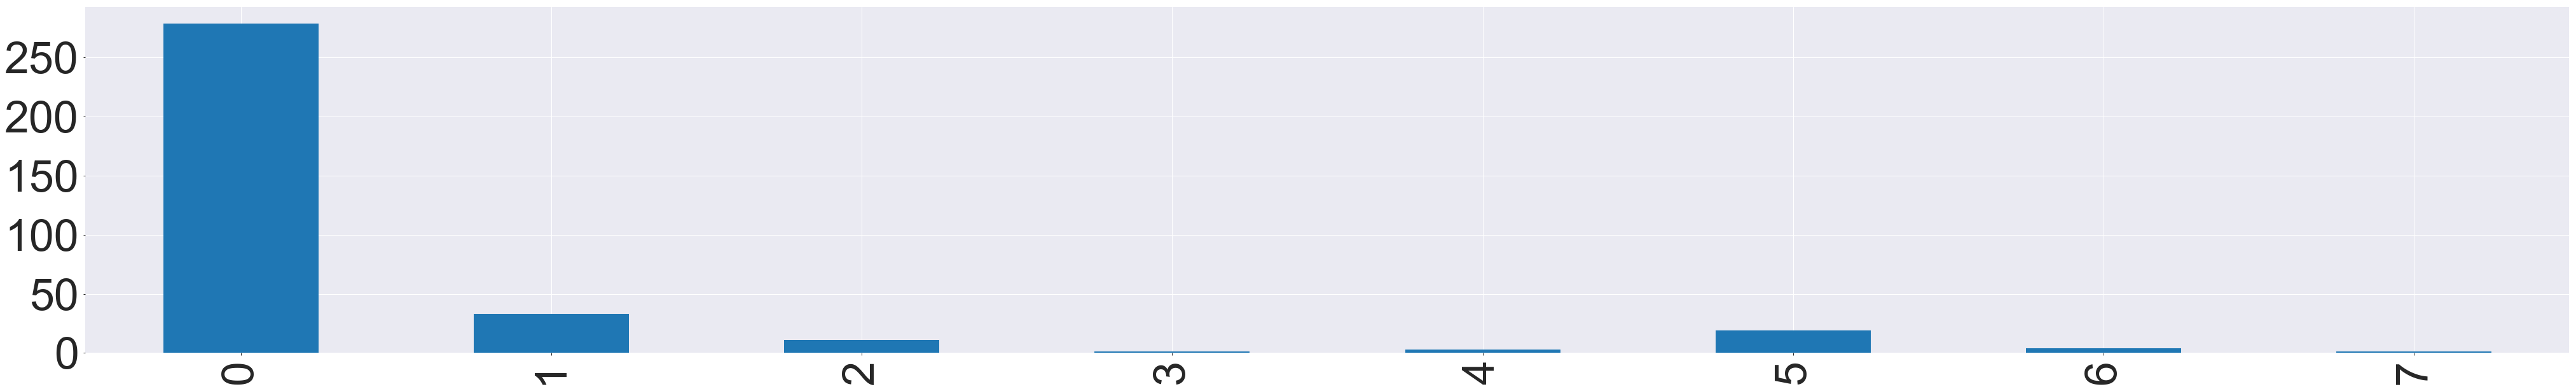

---- cddt_count ---


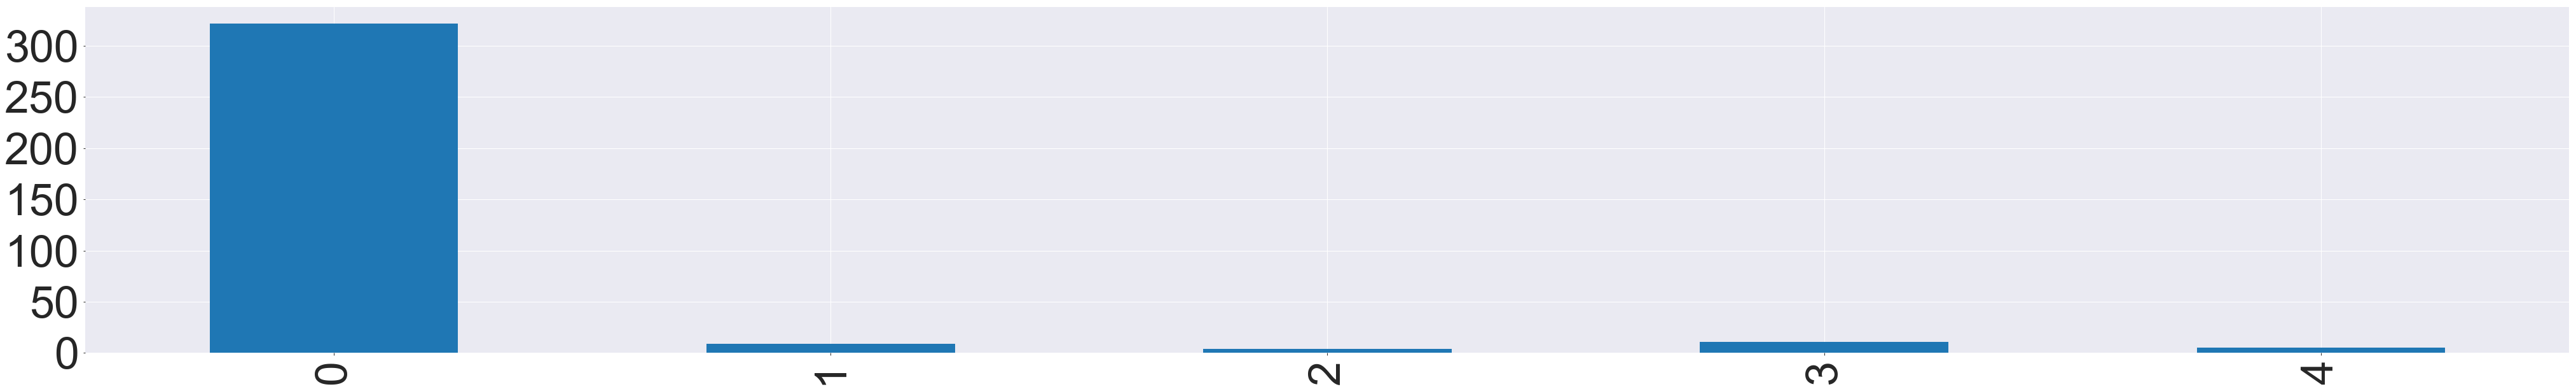

---- cdgt_count ---


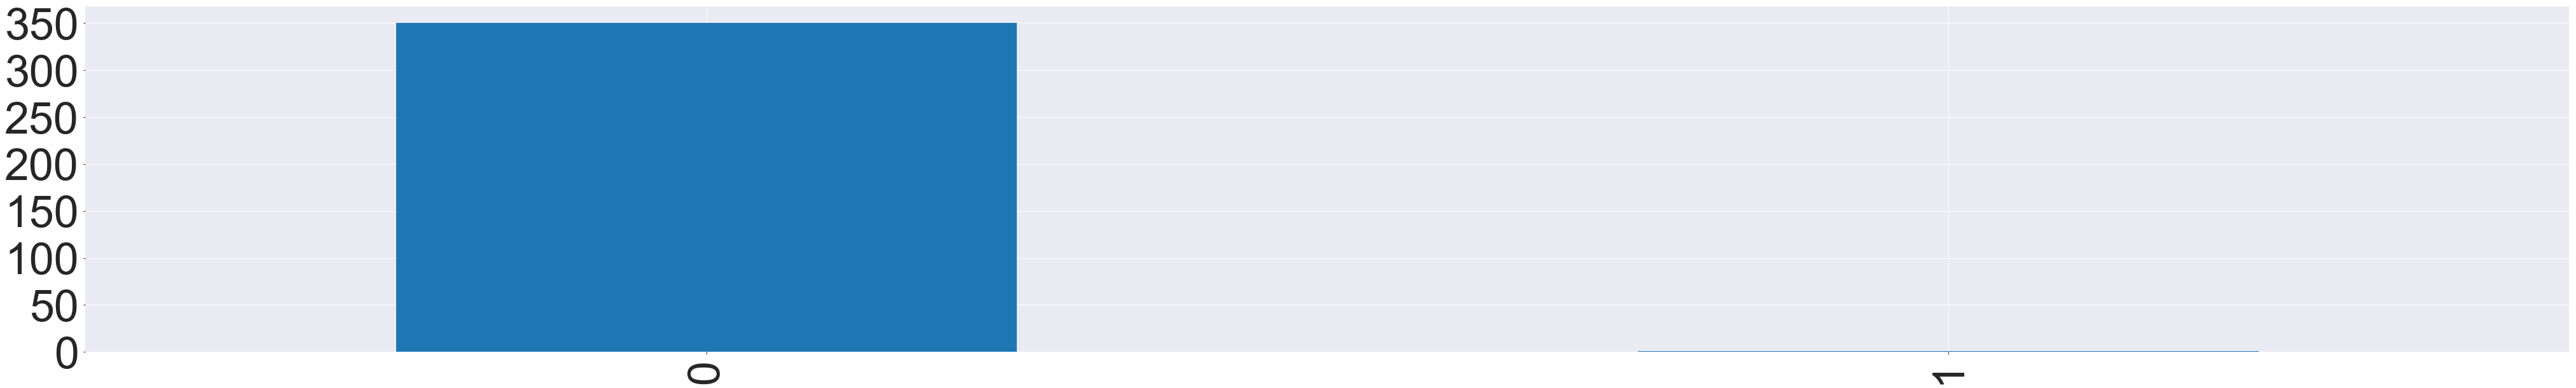

---- cdit_count ---


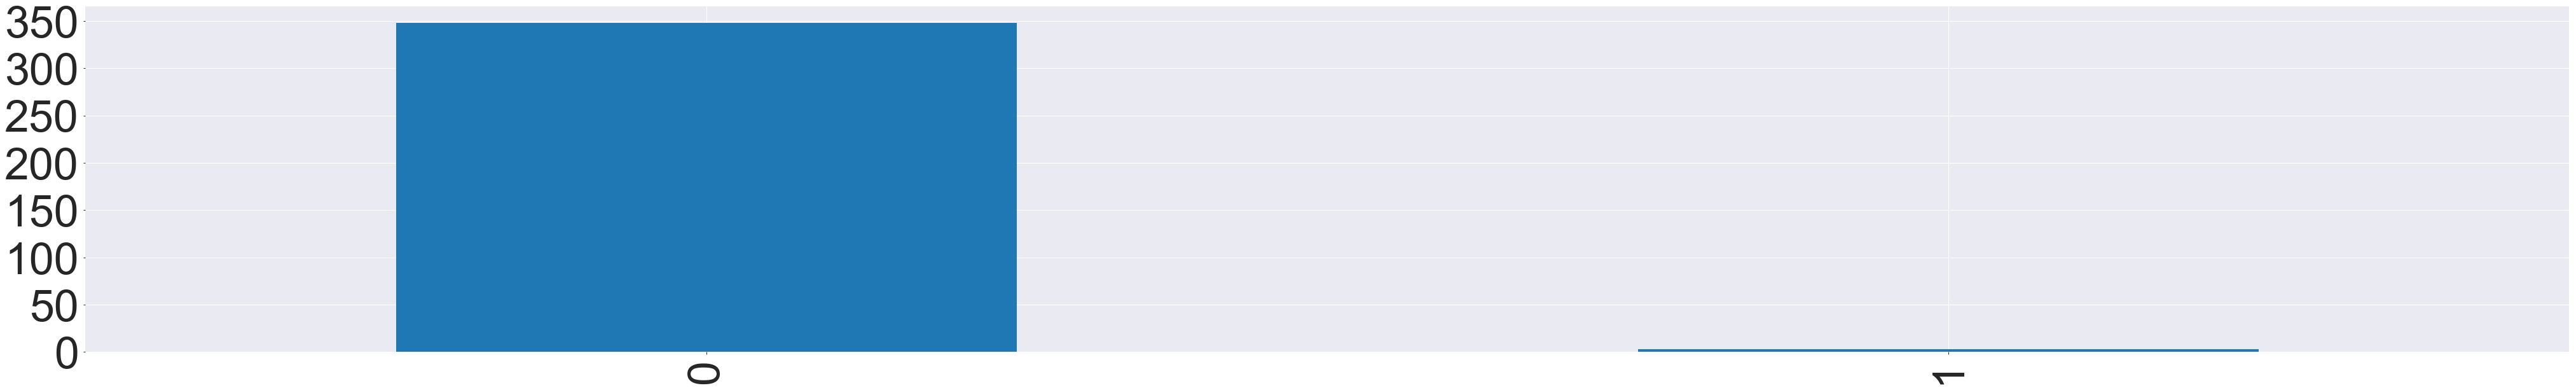

---- cdpt_count ---


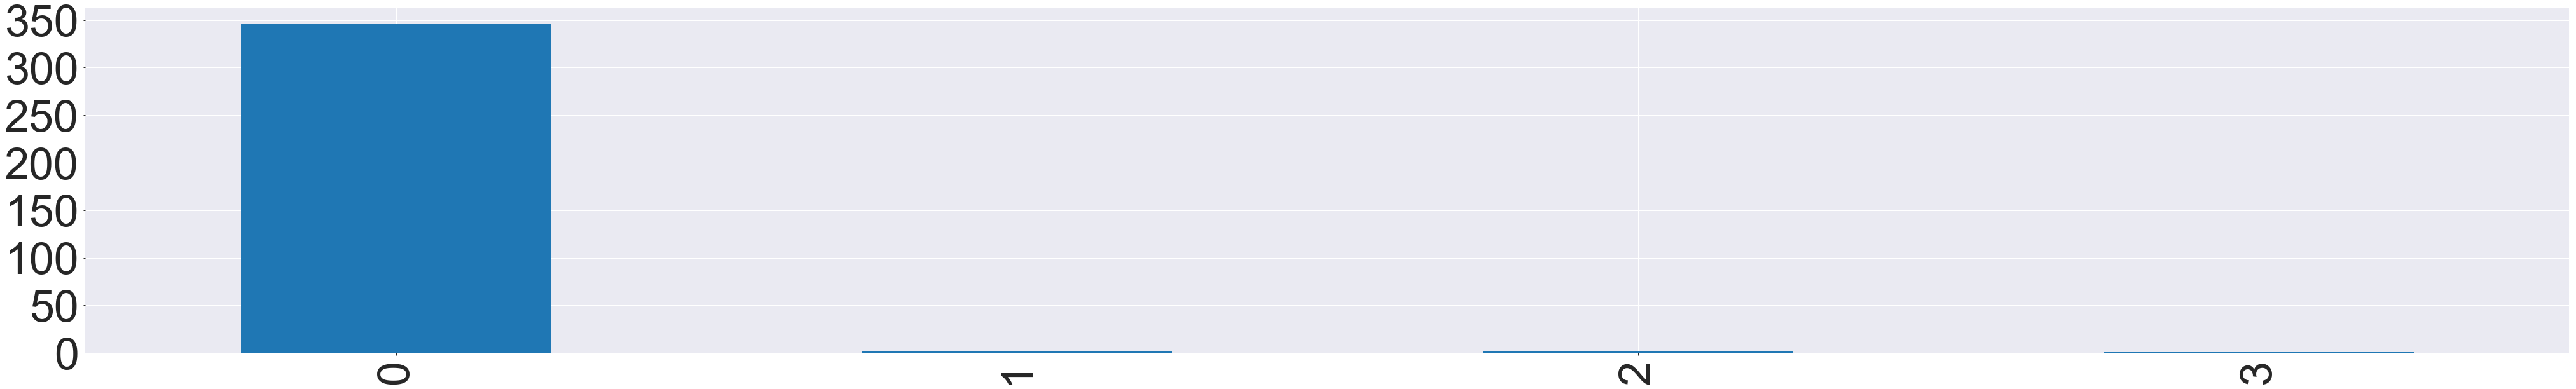

---- nw_count ---


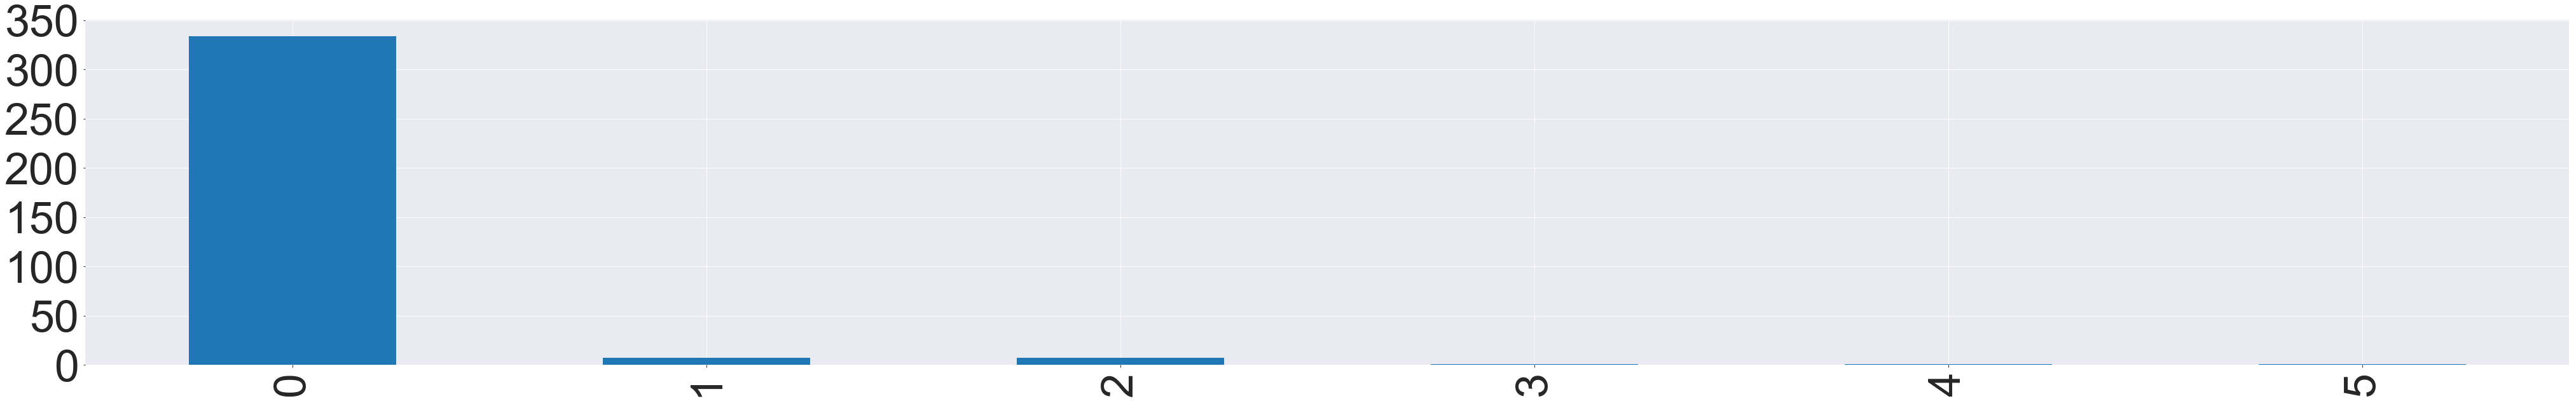

---- tdb_check ---


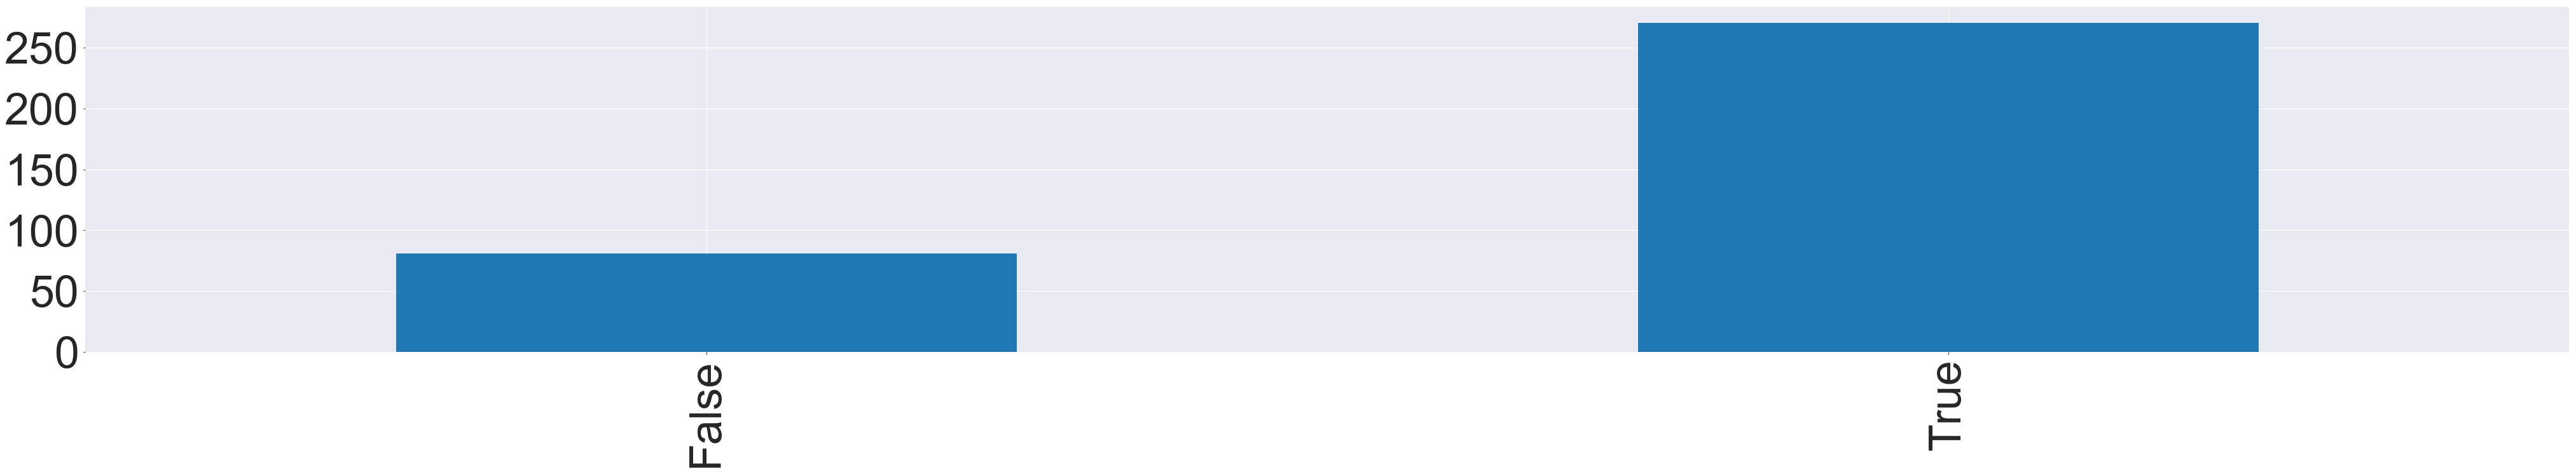

---- nrq_count ---


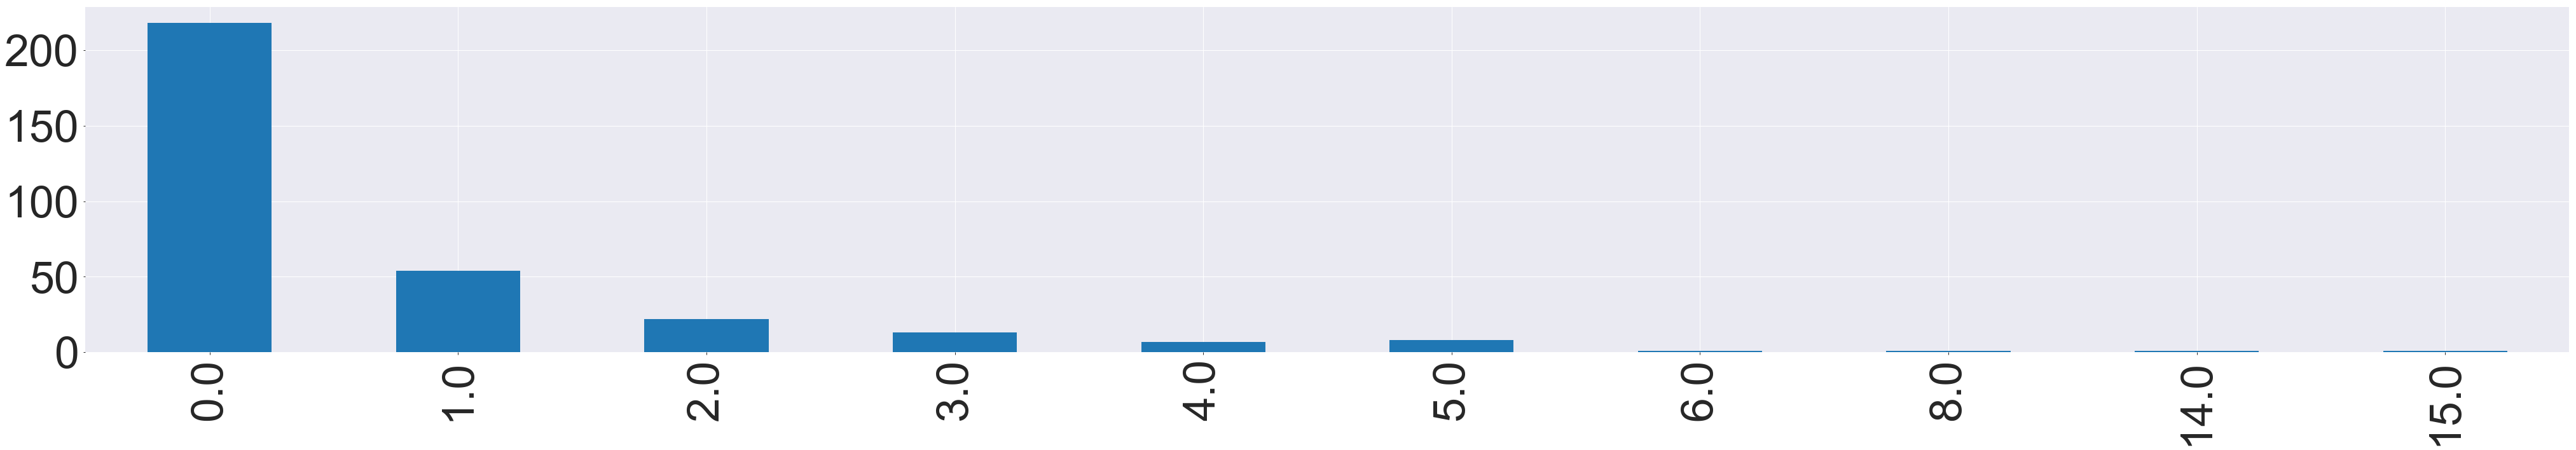

---- nsh_count ---


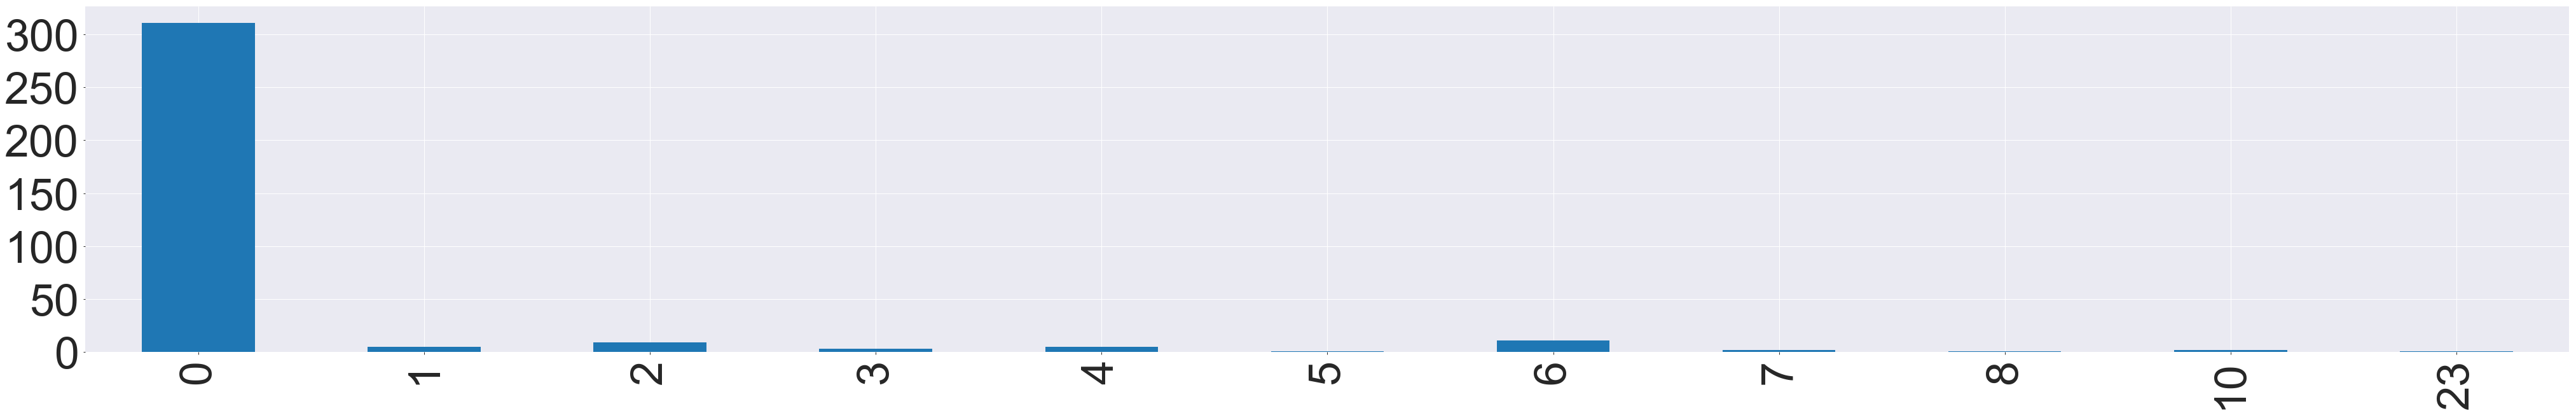

---- ncys_count ---


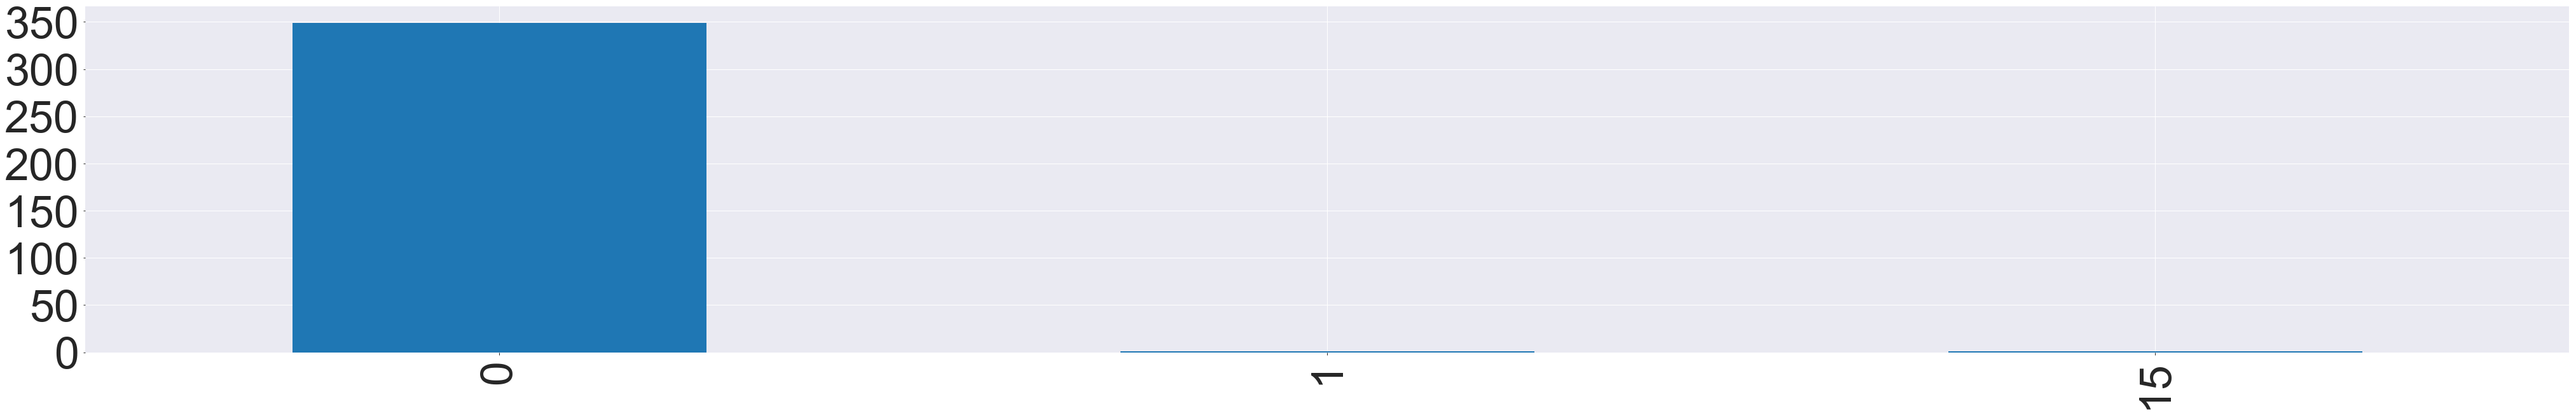

---- tob_check ---


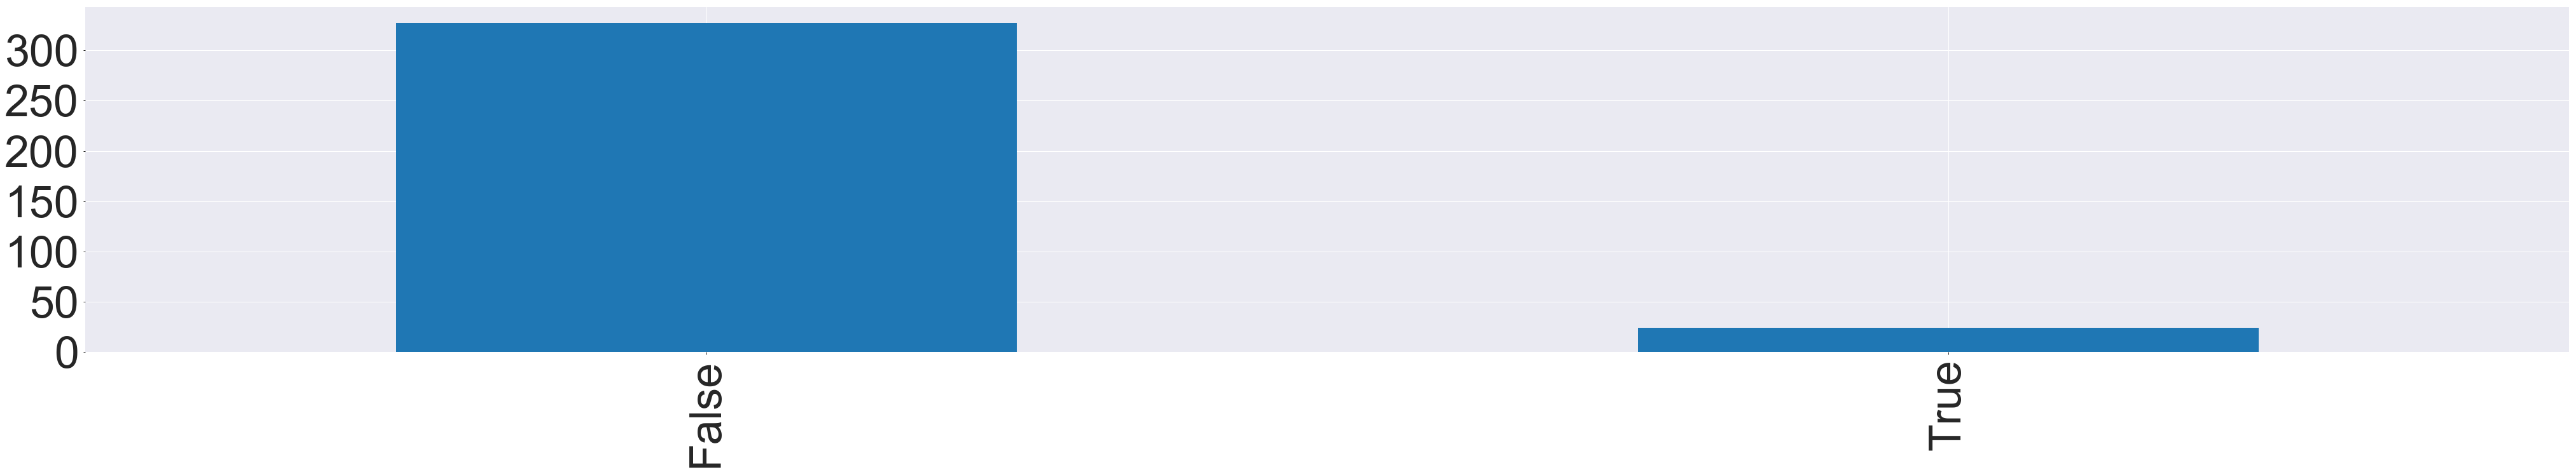

---- ngc_count ---


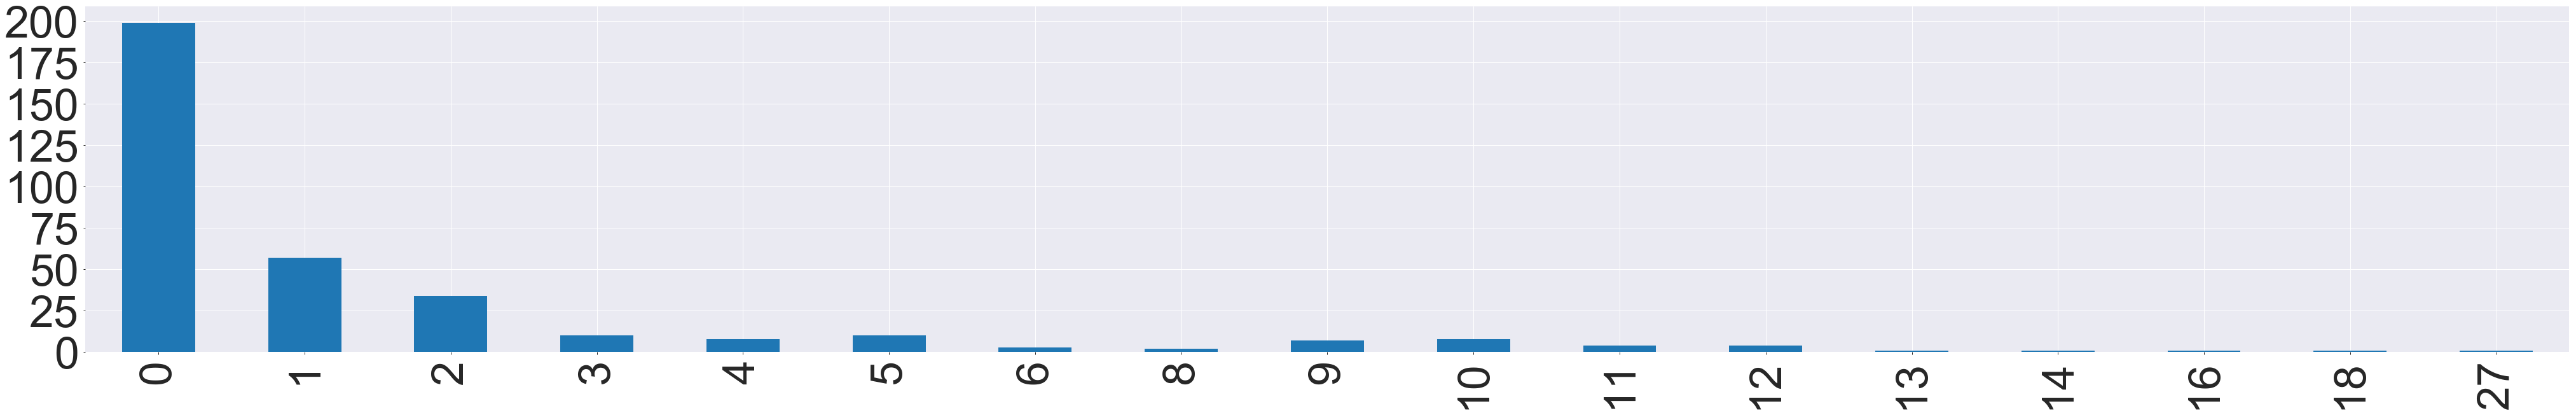

---- ngp_count ---


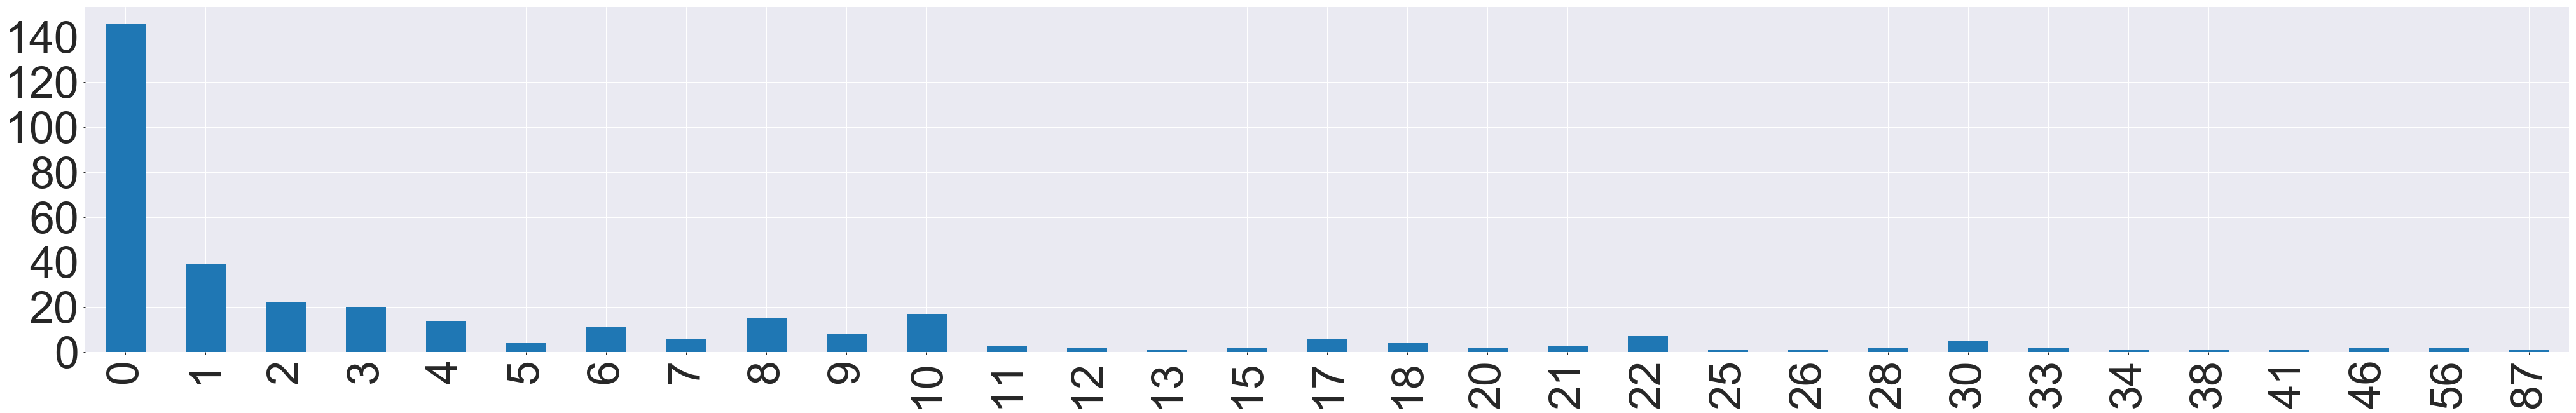

---- ngro_count ---


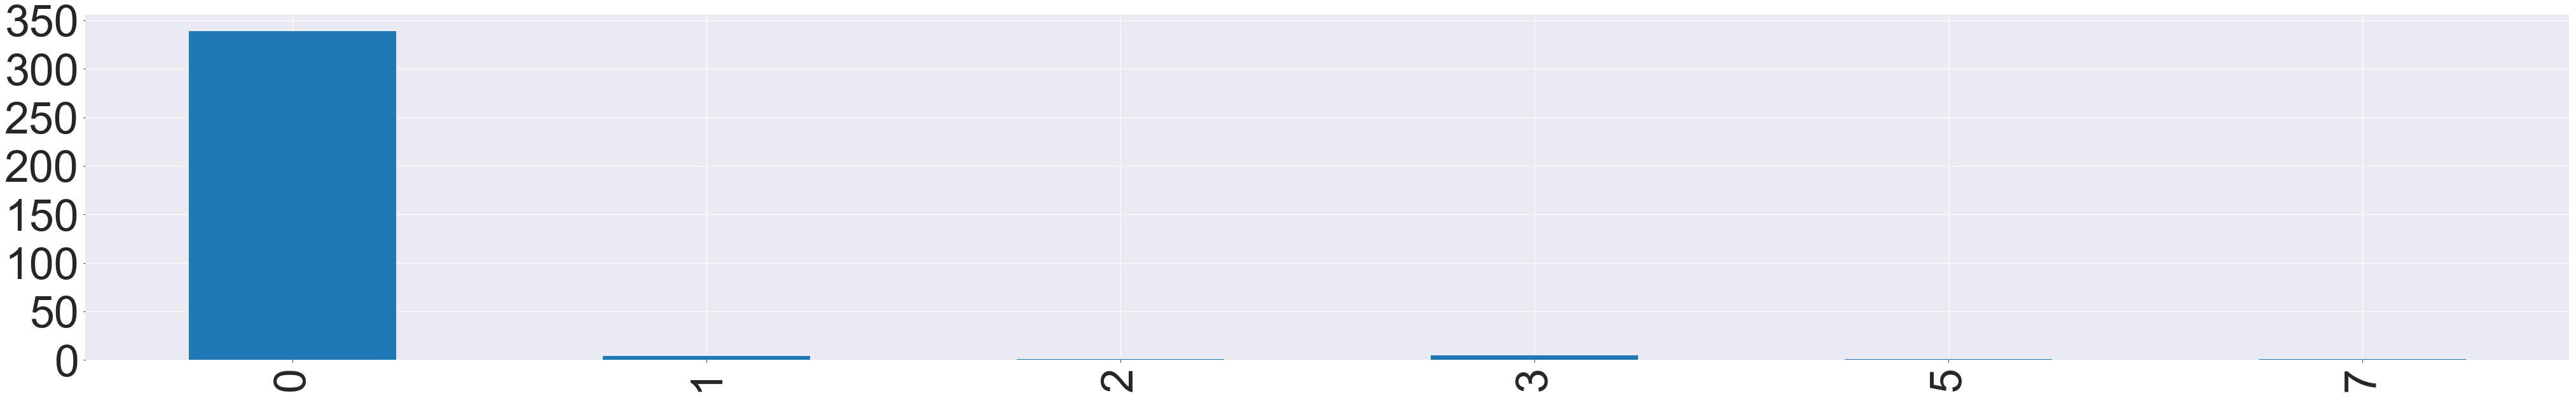

---- npol_count ---


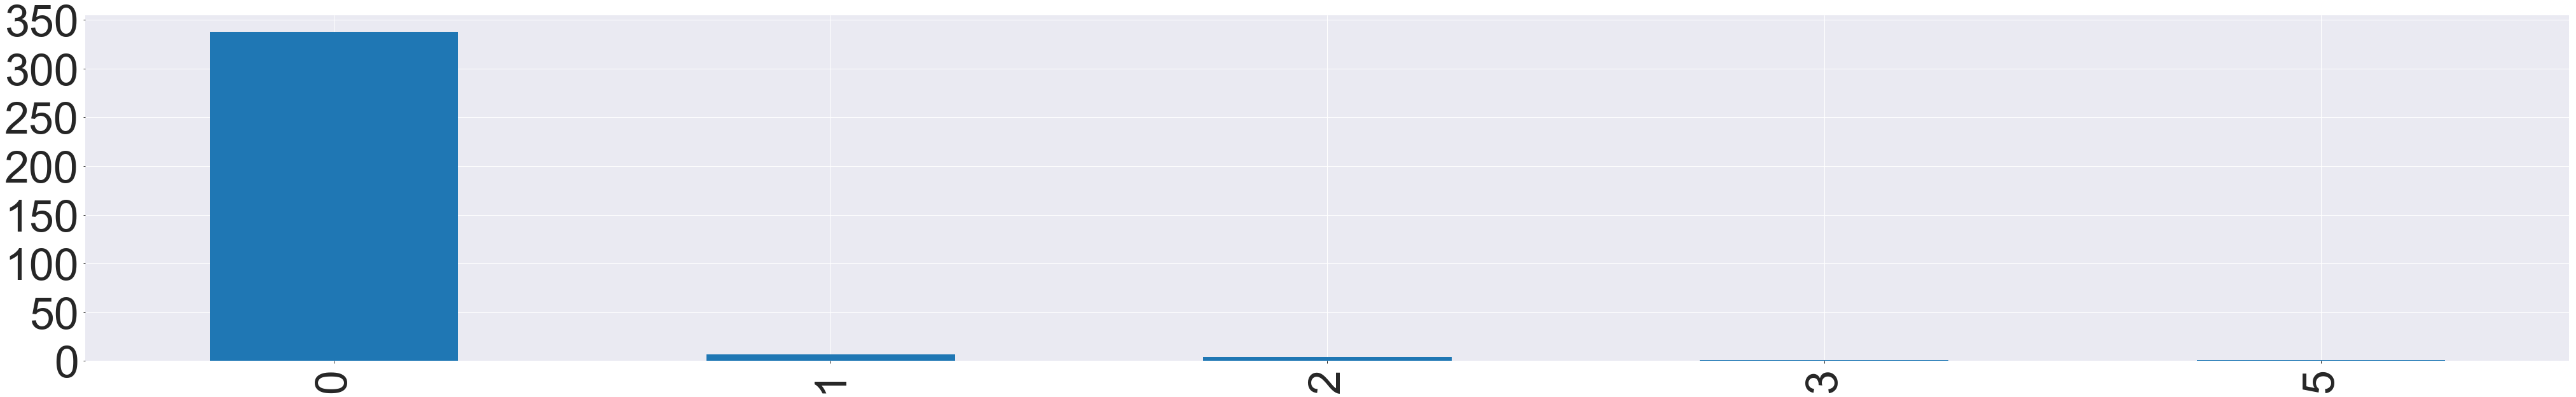

---- nf_count ---


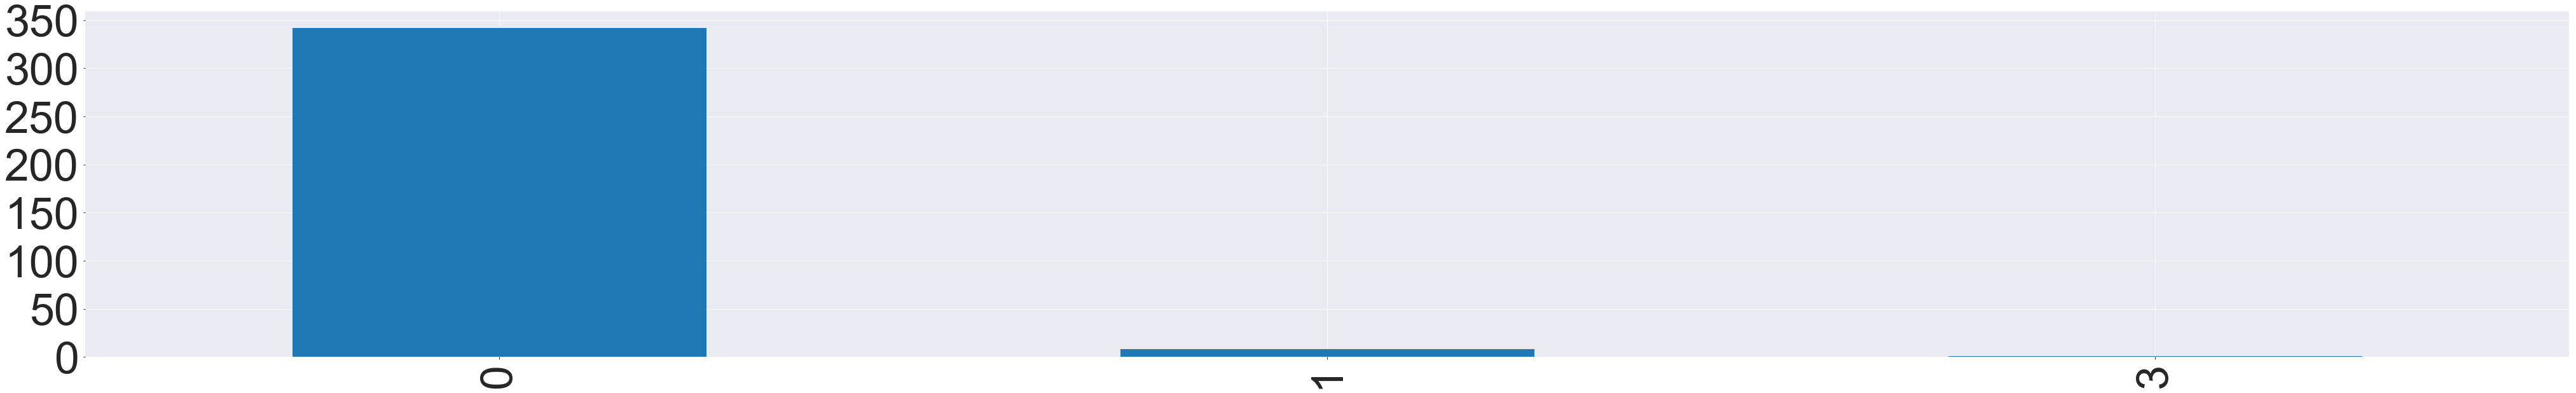

In [7]:
for c in df.columns:
    print("---- {} ---".format(c))
    df_count = df[c].value_counts().sort_index()
    df_count.plot(kind='bar', subplots=False, figsize=(70,10), fontsize=70)
    plt.show()



In [ ]:
#df.loc[df['nf_count'] > 0]

### General statistics

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
description = df.describe()
print(description)


       loc_count  bloc_count  cloc_count  dpt_count  etp_count  nco_count  nkeys_count  \
count     351.00      351.00      351.00     351.00     351.00     351.00       351.00   
mean       66.81        8.02        3.34       5.59       5.22       1.00        64.56   
std        84.62       11.89        8.30       2.05       1.16       2.72        84.78   
min         1.00        0.00        0.00       1.00       1.00       0.00         1.00   
25%        18.00        3.00        0.00       5.00       4.74       0.00        16.00   
50%        38.00        5.00        0.00       6.00       5.25       0.00        36.00   
75%        73.00        8.00        3.00       7.00       5.96       0.00        71.00   
max       443.00       95.00       64.00      11.00       7.63      16.00       582.00   

       ntkn_count  nscm_count  na_count  nc_count  nc_min  nc_max  nc_median  nc_mean  ni_count  \
count      351.00    3.51e+02    351.00    342.00  342.00  342.00     342.00   342.00    3

### Correlation matrix

In [9]:
corr = df.corr(method='pearson')
sns.set(font_scale=2)
plt.figure(figsize = (13,13))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

<Figure size 936x936 with 0 Axes>

### Boxplots

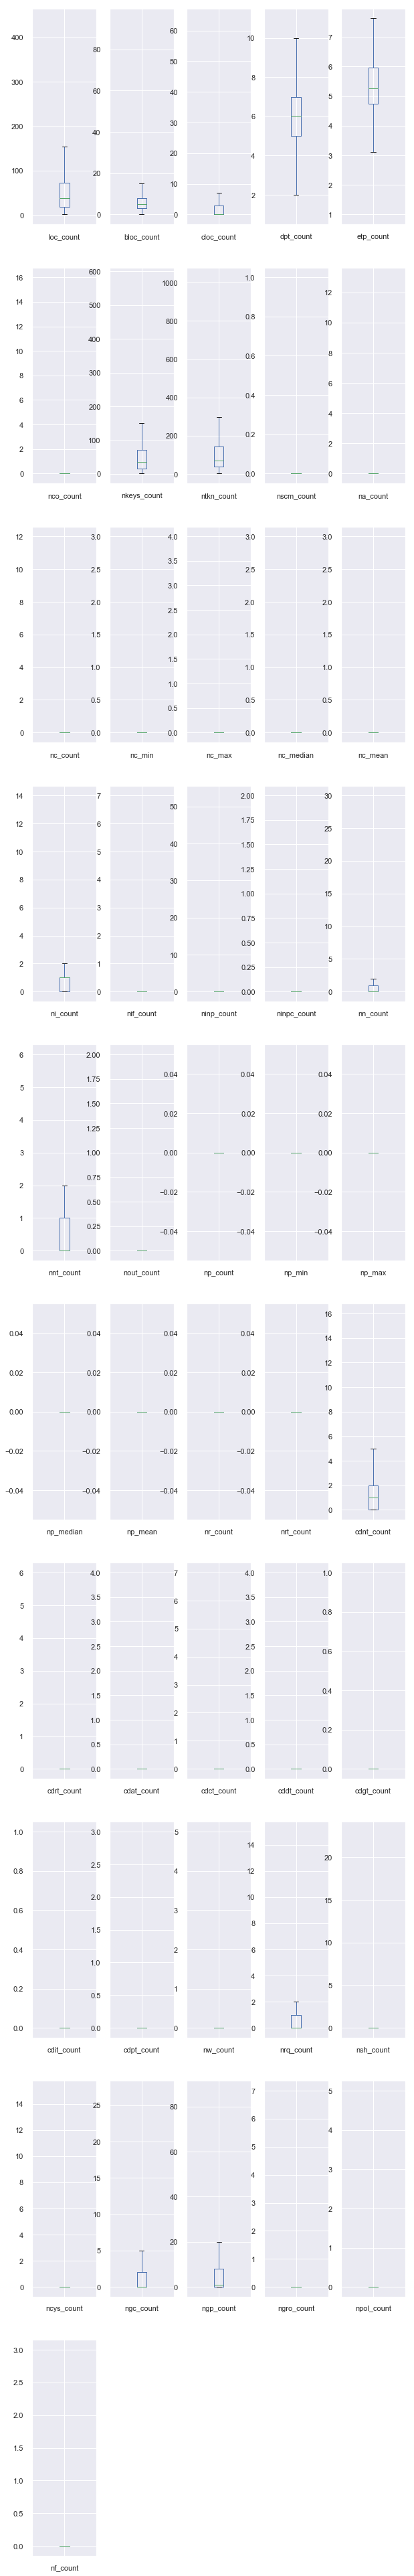

In [11]:
sns.set(font_scale=1)
df.plot(kind='box', subplots=True, layout=(10,5), figsize=(10,70), sharex=False, sharey=False)
plt.show()

### Check nan rows

In [12]:
df1 = df[df['ttb_check'].isna()]
pd.set_option('display.max_rows', 1000)
df[df.isna().any(axis=1)]

#Deze nu ff droppen, dit later fixen!
df = df.dropna()
df[df.isna().any(axis=1)]



Empty DataFrame
Columns: [loc_count, bloc_count, cloc_count, dpt_count, etp_count, nco_count, nkeys_count, ntkn_count, nscm_count, na_count, nc_count, nc_min, nc_max, nc_median, nc_mean, ni_count, nif_count, ninp_count, ninpc_count, nn_count, nnt_count, nout_count, np_count, np_min, np_max, np_median, np_mean, nr_count, nrt_count, ttb_check, cdnt_count, cdrt_count, cdat_count, cdct_count, cddt_count, cdgt_count, cdit_count, cdpt_count, nw_count, tdb_check, nrq_count, nsh_count, ncys_count, tob_check, ngc_count, ngp_count, ngro_count, npol_count, nf_count]
Index: []

## First clustering

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize

clu_df = df.values
clu_df = normalize(clu_df)

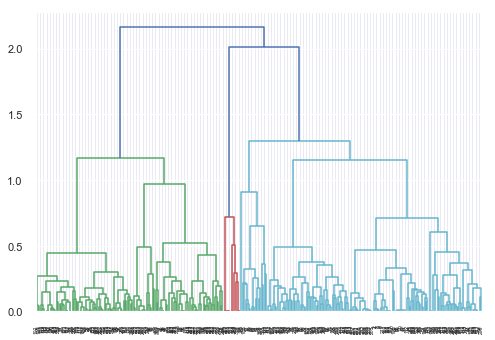

In [14]:
dendrogram = sch.dendrogram(sch.linkage(clu_df, method='ward'))

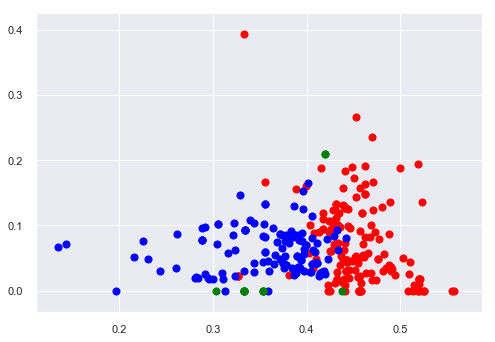

In [15]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(clu_df)
labels = model.labels_
cluster_prediction = model.fit_predict(clu_df)
labels
plt.scatter(clu_df[labels==0, 0], clu_df[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(clu_df[labels==1, 0], clu_df[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(clu_df[labels==2, 0], clu_df[labels==2, 1], s=50, marker='o', color='green')
plt.show()


In [16]:
#https://stackoverflow.com/questions/38372188/how-to-add-k-means-predicted-clusters-in-a-column-to-a-dataframe-in-python

df['cluster_prediction'] = pd.Series(cluster_prediction, index=df.index)

df.groupby(df['cluster_prediction']).describe()

c:\users\s145559\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


loc_count                                               bloc_count         \
                       count   mean     std  min   25%   50%    75%    max      count   mean   
cluster_prediction                                                                             
0                      166.0  55.80   52.35  5.0  19.0  38.0  66.75  266.0      166.0   5.57   
1                      129.0  78.58  103.84  2.0  18.0  35.0  79.00  443.0      129.0  10.68   
2                       12.0   1.75    1.22  1.0   1.0   1.0   2.25    4.0       12.0   0.33   

                                                     cloc_count                                   \
                      std  min  25%  50%   75%   max      count  mean    std  min  25%  50%  75%   
cluster_prediction                                                                                 
0                    4.94  0.0  3.0  5.0   7.0  38.0      166.0  4.01  10.38  0.0  0.0  0.0  2.0   
1                   16.78  0.0  4.0  5.0  10.0  95.0      129.0  1.68   3.43  0.0  0.0  0.0  1.0   
2                    0.78  0.0  0.0  0.0   0.0   2.0       12.0  0.00   0.00  0.0  0.0  0.0  0.0   

                         dpt_count                                        etp_count              \
                     max     count  mean   std  min  25%  50%   75%   max     count  mean   std   
cluster_prediction                                                                                
0                   64.0     166.0  5.75  1.84  1.0  5.0  5.0  7.00  11.0     166.0  4.98  0.83   
1                   24.0     129.0  5.74  1.94  1.0  5.0  6.0  7.00   9.0     129.0  5.76  0.92   
2                    0.0      12.0  1.58  0.90  1.0  1.0  1.0  2.25   3.0      12.0  1.46  0.69   

                                                 nco_count                                        \
                     min   25%   50%   75%   max     count  mean   std  min  25%  50%  75%   max   
cluster_prediction                                                                                 
0                   1.84  4.50  5.05  5.41  6.80     166.0  0.83  2.63  0.0  0.0  0.0  0.0  16.0   
1                   3.32  5.23  5.62  6.16  7.63     129.0  0.88  1.85  0.0  0.0  0.0  1.0   8.0   
2                   1.00  1.00  1.00  2.08  2.58      12.0  0.00  0.00  0.0  0.0  0.0  0.0   0.0   

                   nkeys_count                                              ntkn_count          \
                         count   mean    std  min   25%   50%    75%    max      count    mean   
cluster_prediction                                                                               
0                        166.0  53.97  51.03  5.0  19.0  35.0  65.50  263.0      166.0   91.76   
1                        129.0  74.87  99.99  2.0  16.0  33.0  76.00  412.0      129.0  191.10   
2                         12.0   1.75   1.22  1.0   1.0   1.0   2.25    4.0       12.0    3.08   

                                                            nscm_count                            \
                       std   min   25%   50%     75%    max      count      mean   std  min  25%   
cluster_prediction                                                                                 
0                    85.79   9.0  34.0  58.0  111.75  464.0      166.0  6.02e-03  0.08  0.0  0.0   
1                   261.97  10.0  45.0  79.0  169.00  973.0      129.0  0.00e+00  0.00  0.0  0.0   
2                     1.68   2.0   2.0   2.0    4.25    6.0       12.0  0.00e+00  0.00  0.0  0.0   

                                  na_count                                      nc_count        \
                    50%  75%  max    count  mean   std  min  25%  50%  75%  max    count  mean   
cluster_prediction                                                                               
0                   0.0  0.0  1.0    166.0  0.10  0.55  0.0  0.0  0.0  0.0  6.0    166.0  0.60   
1                   0.0  0.0  0.0    129.0  0.16  0.63  0.0  0.

## Pandas profiling

In [17]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="example_pandas profiling.html")

In [ ]:
(df[df['cluster_prediction'] == 0])

In [ ]:
(df[df['cluster_prediction'] == 1])

In [ ]:
(df[df['cluster_prediction'] == 2])